#  **Exploratory Data Analysis (EDA) & ETL**

The first thing we need to check is the Exploratory Data Analysis. 

### 1. Data Load:

In [111]:
import pandas as pd
import numpy as np

# Import the Original Dataset
df_AA = pd.read_csv('Dataset/AccidentesAviones.csv')
df_AA

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


We can see that there are 18 columns and 5008 records. Additionally, at first glance, we notice a high volume of NaN values. However, we can observe that there is always a summary for each accident. Therefore, it is not a good option to start eliminating rows and potentially lose valuable information in the `summary` column. So let's start analyzing every column in order to find valuable information.

### 2. Variables Exploration:

#### 2.1. Column `summary`:

Let's see if there is any incident without summary:

In [112]:
mask = df_AA['summary'].isna()
df_AA[mask]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary


In [113]:
mask = df_AA['summary'] == '?'
df_AA[mask]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
28,28,"October 02, 1919",?,"Newcastle, England",Aircraft Transport and Travel,?,?,De Havilland DH-4,?,?,1,0,1,1,0,1,0,?
59,59,"August 14, 1921",?,"Toulouse, France",Aeropostale,?,?,Breguet 14,F-ALBI,?,2,?,?,2,?,?,0,?
103,103,"September 07, 1925",?,"Toul, France",CIDNA,?,?,Spad 33,?,?,?,?,?,?,?,?,?,?
106,106,"November 14, 1925",?,"Off Boulogne-sur-Mer, France",Air Union,?,?,Farman F-60 Goliath,F-FHMY,?,2,?,?,2,?,?,0,?
256,256,"July 14, 1931",?,"Temora, Australia",Australian Aerial Services,?,?,Lasco Lascowl,VH-UGF,3,2,0,2,2,0,2,0,?
257,257,"July 21, 1931",?,"Centralia, Illinois",American Airways,?,?,Pitcairn PA-6 Mailwing,?,?,1,0,1,1,0,1,0,?
264,264,"October 14, 1931",?,Brazil,Syndicato Condor,?,?,Dornier Wal,P-BALSA,107,3,0,3,3,0,3,0,?
321,321,"October 31, 1933",1120,"Etobon, France",Air France,?,Zurich - Basel - Paris,Farman F-301,F-AJMI,04,5,2,3,2,1,1,0,?
331,331,"January 20, 1934",?,"Carombe, France",Air France,?,?,Breguet 280T,F-AJKX,?,2,?,?,2,?,?,0,?
333,333,"February 26, 1934",?,"Rio de Oro, Morocco",Air France,?,?,Latécoère 28,F-AJPA,925,6,?,?,1,?,?,0,?


In [114]:
# Check the number of records that don't have a summary.
len(df_AA[mask]['Unnamed: 0'].tolist())

59

We can see that all the registers for the column `summary` has a description of the incident that could tell us more about each one. However, this is a No-Structured data (text) that need to be treated using Natural Language Processing (NLP). We can see 59 records that don't have any data in the collumn 'summary', that need to be treated later.

##### 2.1.1. Spacy library:

The first thing we need to do is preprocess our data. To do this, we are going to use the spacy library. spaCy is an open-source natural language processing (NLP) library and framework used for various NLP tasks. It is designed to perform tasks related to text processing, linguistic analysis, and information extraction. 

One useful tool of this library is its capcity to tokenize the text removing stop words and othe typical words that are repetitive but don't give us valuable insights about our data.

In [115]:
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Define a function to preprocess and tokenize the text
def preprocess(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Apply the preprocessing function to your data
df_AA['preprocessed_summary'] = df_AA['summary'].apply(preprocess)
df_AA

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f..."
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ...",attempting land jolo airport military transpor...


Let's check the first text in order to review the tokenization.

In [116]:
# Original Text
df_AA[['summary','preprocessed_summary']].iloc[0,0]

'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.'

In [117]:
# Tokenized text
df_AA[['summary','preprocessed_summary']].iloc[0,1]

'demonstration flight u.s. army flyer flown orville wright nose dived ground height approximately 75 feet killing lt thomas e. selfridge 26 passenger recorded airplane fatality history   propellers separated flight tearing loose wires bracing rudder causing loss control aircraft   orville wright suffered broken ribs pelvis leg   selfridge suffered crushed skull died short time later'

We can see that stop words were eliminated and the text has some key words such as:

- propellers.
- separated.
- tearing.
- loose.
- wires.
- bracing. 
- rudder. 
- loss.
- control.

Now we need to extract the keywords with TF-IDF. TF-IDF stands for "Term Frequency-Inverse Document Frequency," and it's a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a word or term within a document relative to a collection of documents, typically a corpus.

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=150)  # Change the number of features as needed

# Fit the vectorizer to our preprocessed data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_AA['preprocessed_summary'])

# Get the most relevant keywords
feature_names = tfidf_vectorizer.get_feature_names_out()
keywords = [feature_names[i] for i in tfidf_matrix.sum(axis=0).argsort()[0, ::-1]]

# Print the most relevant keywords
print("Most relevant keywords:", keywords)

Most relevant keywords: [array([['crashed', 'aircraft', 'plane', 'flight', 'engine', 'pilot',
        'runway', 'approach', 'crew', 'failure', 'taking', 'landing',
        'mountain', 'airport', 'cargo', 'weather', 'land', 'takeoff',
        'route', 'struck', 'attempting', 'en', 'altitude', 'fire',
        'miles', 'ground', 'control', 'conditions', 'shortly', 'poor',
        'lost', 'sea', 'fog', 'ft', 'air', 'killed', 'shot', 'hit',
        'error', 'flying', 'short', 'fuel', 'failed', 'left', 'low',
        'right', 'unknown', 'stalled', 'minutes', 'emergency', 'feet',
        'accident', 'helicopter', 'wing', 'area', 'terrain', 'loss',
        'heavy', 'km', 'trees', '000', 'caused', 'field', 'cause',
        'visibility', 'power', 'burned', 'flew', 'high', 'broke',
        'captain', 'found', 'mt', 'rain', 'near', 'descent', 'crash',
        'flames', 'hill', 'went', 'mountains', 'engines', 'caught',
        'ocean', 'turn', 'icing', 'aboard', 'passenger', 'vfr',
        'collisi

Here we can see the 150 keywords that are more frequent along the summary records. There are words that can tell us something about he cause of the accident:

'engine',
'runway','failure',
'mountain','weather','fire',
'control', 'conditions','poor',
'lost', 'fog'
'error','fuel',
'heavy', 'trees',
'visibility', 'power', 'burned','broke',
'rain','crash',
'flames', 'hill','icing',
'collision', 'night', 'water', 'speed', 'time',
'collided', 'turbulence',
'exploded', 'slope', 'wreckage', 'improper', 'procedures', 'visual', 'fatigue',
'instrument', 'lack',
'snow', 'gear',
'burst',
'propeller', 'stall',
'inadequate'

However if we separate the texts into individual words, we loose the context and it is difficult to catch the idea or why that word is used for. It's practically imposible to find relationships or a way to catgeorize the texts.

##### 2.1.2. Word Cloud:

Another way to obtain the more frequent words or pair of words are through a **Word Cloud**:

In [119]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [120]:
summaries = df_AA['preprocessed_summary']

In [121]:
# Combine all the text in the 'summary' column into a single string
text = ' '.join(summaries)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

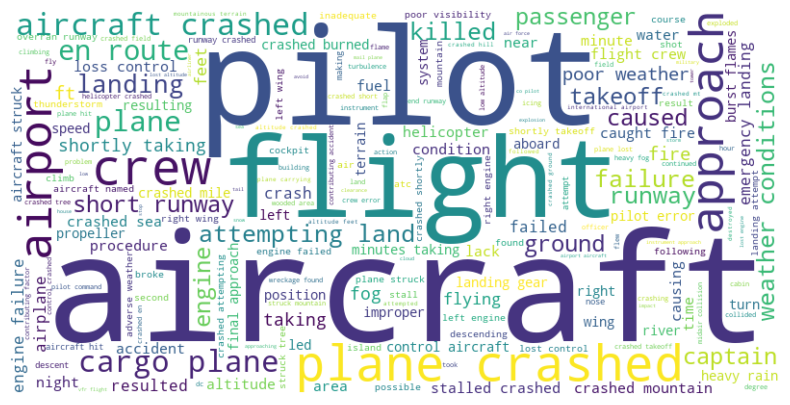

In [122]:
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

Looking at this word cloud, we can observe some words or pair of words that can help us to better understand some categories of causes of the accidents:

- engine failure.
- weather conditions.
- turbulence.
- loss control.
- lost control.
- crashed attempting.
- adverse weather.
- icing.
- poor visibility.
- control crashed.
- landing gear.
- montainous terrain.
- engine failed.
- crew error.
- heavy rain.
- pilot error.
- short runway.
- overran runway.
- plane lost.
- instrument.
- poor weather.
- thunderstorm.
- heavy fog.
- propeller.
- terrain.
- wooded area.
- lost altitude.
- low altitude.
- landing attempt.
- lost engine.
- runway crashed.
- crashed tree.
- fuel.
- end runway.
- tail.
- stalled crashed.
- stall.
- pilot command.
- fog.

With these keywords or key pair of words, we can have these first cateegories of accidents:

1. Weather Conditions.
2. Mechanical, Instrumentation or Electrical Failure.
3. Human Error.

With this first data exploration, we found  out 4 main categories of accidents in the data set. Let's use another technique to identify categories.

##### 2.1.3. Topics Modeling:

To find main topics in our text, we can use tools such as **Latent Dirichlet Allocation (LDA)** or **Non-Negative Matrix Factorization (NMF)**.

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [124]:
# We vectorize the text
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_AA['summary'])

In [125]:
# LDA Model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

In [126]:
# NMF Model
nmf_model = NMF(n_components=5, random_state=42)  # Ajusta el número de temas según sea necesario
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

In [127]:
# Print the topics identified

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

print("Top words in LDA topics:")
print_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

print("Top words in NMF topics:")
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

Top words in LDA topics:
Topic #1: route en mountain crashed unknown terrain flight weather flew approach
Topic #2: shot sea disappeared crashed helicopter ocean wreckage aircraft island rebels
Topic #3: engine aircraft failure plane crashed killed air flight aboard taking
Topic #4: runway aircraft plane crashed takeoff landing engine approach pilot crew
Topic #5: crashed land weather poor fog plane attempting airport taking mountain
Top words in NMF topics:
Topic #1: aircraft approach runway crew pilot flight landing altitude ground control
Topic #2: route en crashed disappeared mountain mountains sea plane unknown cargo
Topic #3: engine crashed taking takeoff shortly failure stalled plane lost failed
Topic #4: plane cargo attempting land crashed runway fog mail airport short
Topic #5: weather mountain poor conditions struck crashed vfr visibility adverse flew


As we check the words en the topics obtained by these mehods we can find a new category:

4. Combat Losses. (LDA Topic # 2)

The other topics mention categories that we have already identified.

However, we  need to classify all the accidents into different causes. We can use the key-words to do a fast categorization.

##### 2.1.4. Categorization using key-words:

So the final categories are the following:

1. Weather Conditions.
2. Mechanical, Instrumentation or Electrical Failure.
3. Human Error.
4. Combat Losses.
5. Not defined.

First, let's organize the name of the ID Column:

In [128]:
# Rename the 'Unnamed: 0' column to 'acc_id'
df_AA = df_AA.rename(columns={'Unnamed: 0': 'acc_id'})
df_AA

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f..."
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ...",attempting land jolo airport military transpor...


##### 2.1.4.1 Category 1:

Looking at the Word Cloud we can filter the data set by the following words:

- weather.
- turbulence.
- climate. 
- atmospheric conditions. 
- meteorology.
- icing.
- ice buildup. 
- frozen precipitation.
- freezing
- visibility.
- sight.
- visual.
- rain.
- rainfall. 
- precipitation. 
- downpour.
- storm.
- tempest. 
- squall.
- cyclone.
- snow.
- snowfall.
- snowflakes. 
- powder.
- rainstorm.
- rainy.
- deluge.
- cloudburst.
- thunderstorm.
- electrical storm.
- lightning storm. 
- thunder.
- lightning.
- snowstorm.
- blizzard. 
- snowfall. 
- whiteout.
- heavy fog.
- dense fog. 
- mist.
- fog.
- haze. 
- smog.
- wind.
- gust. 
- breeze.
- air movement.
- crosswinds.
- sidewinds. 
- crosscurrents. 
- lateral winds.
- overcast.
- cloudy.
- cloud cover.
- cloud-obscured. 
- obscured sky.
- sandstorm.
- sand storm.
- dust storm.
- haboob.
- sirocco.
- sand.
- -cover.
- drowndraft.
- visibilility.
- obscure.
- cloud.
- blown off.

In [129]:
import re

# Create a regular expression pattern by joining specific words with '|'
specific_words = [
    "weather",
    "climate",
    "atmospheric conditions",
    "meteorology",
    "icing",
    "ice buildup",
    "frozen precipitation",
    "freezing",
    "visibility",
    "sight",
    "visual",
    "rain",
    "rainfall",
    "precipitation",
    "downpour",
    "storm",
    "tempest",
    "squall",
    "cyclone",
    "snow",
    "snowfall",
    "snowflakes",
    "powder",
    "rainstorm",
    "rainy",
    "deluge",
    "cloudburst",
    "thunderstorm",
    "electrical storm",
    "lightning storm",
    "thunder",
    "lightning",
    "snowstorm",
    "blizzard",
    "snowfall",
    "whiteout",
    "heavy fog",
    "dense fog",
    "mist",
    "fog",
    "haze",
    "smog",
    "wind",
    "gust",
    "breeze",
    "air movement",
    "crosswinds",
    "sidewinds",
    "crosscurrents",
    "lateral winds",
    "overcast",
    "cloudy",
    "cloud cover",
    "cloud-obscured",
    "obscured sky",
    "sandstorm",
    "sand storm",
    "dust storm",
    "haboob",
    "sirocco",
    "sand",
    "-cover",
    "drowndraft",
    "visibilility",
    "obscure",
    "cloud",
    "blown off"
]
pattern = '|'.join(map(re.escape, specific_words))

# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
mask = df_AA['summary'].str.contains(pattern, case=False, regex=True)

# Apply the mask to filter rows where any of the words is present
df_Cat = df_AA[mask]
df_Cat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,?,Zeppelin L-10 (airship),?,?,19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when...",exploded burned near neuwerk island hydrogen...
11,11,"November 21, 1916",?,"Mainz, Germany",Military - German Army,?,?,Super Zeppelin (airship),?,?,28,?,?,27,?,?,0,Crashed in a storm.,crashed storm
14,14,"March 30, 1917",?,Off Northern Germany,Military - German Navy,?,?,Schutte-Lanz S-L-9 (airship),?,?,23,?,?,23,?,?,0,Struck by lightning and crashed into the Balti...,struck lightning crashed baltic sea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,5000,"September 25, 2020",2050,"Near Chuguev, Ukraine",Military - Ukraine Air Force,?,Training,Antonov An26SH,76 yellow,5608,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from...",military transport crashed 1.2 miles chuguev a...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f..."
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...


We can see 1968 records with the key-words for the **Category 1**. Let's update them:

In [130]:
# Let's capture the acc_id column in order to update the main dataframe.
list_id_Cat = df_Cat['acc_id']
mask_Cat = df_AA['acc_id'].isin(list_id_Cat)
df_AA.loc[mask_Cat, 'cause_category1'] = True
df_AA[mask_Cat]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...,True
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...,True
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,?,Zeppelin L-10 (airship),?,?,19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when...",exploded burned near neuwerk island hydrogen...,True
11,11,"November 21, 1916",?,"Mainz, Germany",Military - German Army,?,?,Super Zeppelin (airship),?,?,28,?,?,27,?,?,0,Crashed in a storm.,crashed storm,True
14,14,"March 30, 1917",?,Off Northern Germany,Military - German Navy,?,?,Schutte-Lanz S-L-9 (airship),?,?,23,?,?,23,?,?,0,Struck by lightning and crashed into the Balti...,struck lightning crashed baltic sea,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,5000,"September 25, 2020",2050,"Near Chuguev, Ukraine",Military - Ukraine Air Force,?,Training,Antonov An26SH,76 yellow,5608,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from...",military transport crashed 1.2 miles chuguev a...,True
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f...",True
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...,True
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...,True


##### 2.1.4.2 Category 2:

Looking at the Word Cloud we can filter the data set by the following words:

- engine
- motor
- powerplant
- motorized unit
- malfunction
- breakdown
- collapse
- landing gear
- undercarriage
- landing wheels
- shattered
- fractured
- cracked
- broken
- damaged
- wrecked
- busted
- stalled
- fire erupted
- ignition occurred
- flames burst out
- blaze ignited
- elevator
- lift control
- ascending device
- halted
- trouble
- ceased motion
- stall
- starter
- halt
- energy
- wire
- cable
- conductor
- structural
- framework
- constructive
- fuselage
- hull
- casing
- oil pressure
- lubricant
- fluid pressure
- oil system tension
- in-flight fire
- aboard blaze
- mid-air fire
- airborne inferno
- propeller
- blade
- rotor
- spinner
- instrument
- device
- apparatus
- tool
- electrical
- electronic
- generator
- altimeter
- wired
- mechanical
- machine-driven
- engine-driven
- gear-operated
- engines
- motors
- powerplants
- motorized units
- blown tire
- vibration
- wheel
- rubber
- compass
- software
- jammed
- jambed
- detached
- wing separated
- stabilizer
- sensor
- malfunction
- rudder
- combustor
- combustion

In [131]:
import re

# Create a regular expression pattern by joining specific words with '|'
specific_words = [
    "engine",
    "motor",
    "powerplant",
    "motorized unit",
    "malfunction",
    "breakdown",
    "collapse",
    "landing gear",
    "undercarriage",
    "landing wheels",
    "shattered",
    "fractured",
    "cracked",
    "broken",
    "damaged",
    "wrecked",
    "busted",
    "stalled",
    "fire erupted",
    "ignition occurred",
    "flames burst out",
    "blaze ignited",
    "elevator",
    "lift control",
    "ascending device",
    "halted",
    "trouble",
    "ceased motion",
    "stall",
    "starter",
    "halt",
    "energy",
    "wire",
    "cable",
    "conductor",
    "structural",
    "framework",
    "constructive",
    "fuselage",
    "hull",
    "casing",
    "oil pressure",
    "lubricant",
    "fluid pressure",
    "oil system tension",
    "in-flight fire",
    "aboard blaze",
    "mid-air fire",
    "airborne inferno",
    "propeller",
    "blade",
    "rotor",
    "spinner",
    "instrument",
    "device",
    "apparatus",
    "tool",
    "electrical",
    "electronic",
    "generator",
    "altimeter",
    "wired",
    "mechanical",
    "machine-driven",
    "engine-driven",
    "gear-operated",
    "engines",
    "motors",
    "powerplants",
    "motorized units",
    "blown tire",
    "vibration",
    "wheel",
    "rubber",
    "tyre",
    "compass",
    "software",
    "jammed",
    "jambed",
    "detached",
    "wing separated",
    "stabilizer",
    "sensor",
    "malfunction",
    "rudder",
    "combustor",
    "combustion"
]
pattern = '|'.join(map(re.escape, specific_words))

# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
mask = (df_AA['summary'].str.contains(pattern, case=False, regex=True))

# Apply the mask to filter rows where any of the words is present
df_Cat = (df_AA[mask]) 
df_Cat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...,NaN
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...,NaN
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,?,Zeppelin L-2 (airship),?,?,28,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...,hydrogen gas vented sucked forward engine igni...,NaN
27,27,"August 02, 1919",?,"Verona, Italy",Caproni Company,?,Venice Taliedo,Caproni Ca.48,?,?,14,12,2,14,12,2,0,As the plane was passing over Verona the wings...,plane passing verona wings began flutter colla...,NaN
35,35,"April 10, 1920",?,"Newark, New Jersey",US Aerial Mail Service,?,?,Curtiss R-4LM,49,?,2,1,1,1,0,1,0,After a fire erupted in flight the pilot decid...,fire erupted flight pilot decided emergency la...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4986,"May 05, 2019",1830,"Moscow, Russia",Aeroflot Russian International Airlines,?,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78,73,5,41,40,1,0,Forty-five minutes after taking off from Mosco...,minutes taking moscow sheremetyevo airport pla...,True
4997,4997,"May 22, 2020",1440,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,AP-BLD,2274,99,91,8,97,89,8,1,"While landing, the aircraft scraped the runway...",landing aircraft scraped runway times impact p...,NaN
4998,4998,"August 07, 2020",1914,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,VT-AXH,36323/2108,190,184,6,20,18,2,0,The flight IX344 suffered a runway excursion w...,flight ix344 suffered runway excursion landing...,True
5000,5000,"September 25, 2020",2050,"Near Chuguev, Ukraine",Military - Ukraine Air Force,?,Training,Antonov An26SH,76 yellow,5608,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from...",military transport crashed 1.2 miles chuguev a...,True


We can see 1729 records with the key-words for the **Category 2**. Let's update them:

In [132]:
# Let's capture the acc_id column in order to update the main dataframe.
list_id_Cat = df_Cat['acc_id']
mask_Cat = df_AA['acc_id'].isin(list_id_Cat)
df_AA.loc[mask_Cat, 'cause_category2'] = True
df_AA[mask_Cat]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...,NaN,True
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...,NaN,True
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,?,Zeppelin L-2 (airship),?,?,...,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...,hydrogen gas vented sucked forward engine igni...,NaN,True
27,27,"August 02, 1919",?,"Verona, Italy",Caproni Company,?,Venice Taliedo,Caproni Ca.48,?,?,...,12,2,14,12,2,0,As the plane was passing over Verona the wings...,plane passing verona wings began flutter colla...,NaN,True
35,35,"April 10, 1920",?,"Newark, New Jersey",US Aerial Mail Service,?,?,Curtiss R-4LM,49,?,...,1,1,1,0,1,0,After a fire erupted in flight the pilot decid...,fire erupted flight pilot decided emergency la...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4986,"May 05, 2019",1830,"Moscow, Russia",Aeroflot Russian International Airlines,?,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,...,73,5,41,40,1,0,Forty-five minutes after taking off from Mosco...,minutes taking moscow sheremetyevo airport pla...,True,True
4997,4997,"May 22, 2020",1440,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,AP-BLD,2274,...,91,8,97,89,8,1,"While landing, the aircraft scraped the runway...",landing aircraft scraped runway times impact p...,NaN,True
4998,4998,"August 07, 2020",1914,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,VT-AXH,36323/2108,...,184,6,20,18,2,0,The flight IX344 suffered a runway excursion w...,flight ix344 suffered runway excursion landing...,True,True
5000,5000,"September 25, 2020",2050,"Near Chuguev, Ukraine",Military - Ukraine Air Force,?,Training,Antonov An26SH,76 yellow,5608,...,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from...",military transport crashed 1.2 miles chuguev a...,True,True


##### 2.1.4.3 Category 3:

Looking at the Word Cloud we can filter the data set by the following words:

- crew error.
- aircrew error.
- captain error.
- pilot error.
- pilot's error.
- pilots error.
- ATC error.
- failure of the crew.
- failure of the aircrew.
- failure of the captain.
- failure of the pilot.
- crew failure.
- aircrew failure.
- captain failure.
- pilot failure.
- pilot's failure.
- pilots failure.
- ATC failure.
- crew failed.
- aircrew failed.
- captain failed.
- pilot failed.
- pilot's failed.
- pilots failed.
- ATC failed.
- navigation error.
- navigational error.
- mistake.
- improper.
- calculation error.
- human error.
- wrong decision.
- judgement.
- inexperience.
- incorrect.
- ignored.
- flight discipline.
- adequate traning.
- lack of training.
- limited knowledge.
- unsatisfactory.
- inadequate.
- flight planning.
- miscommunication.
- confusion.
- knowledge.
- lost altitude.
- low altitude.
- pilot command.
- overstressed.
- overstress.
- overstressing.
- fatigue.
- sufficient speed.
- procedure.
- procedural.
- procedures.
- premature.
- another aircraft on the runway.
- erroneous.
- reduced altitude.
- out of fuel.
- lack of fuel.
- too low.
- inability.
- dump fuel.
- plane diverted.
- not suitable.
- unauthorized.
- deviation.
- insufficient.
- unwise.
- drinking.
- drunk.
- absence of adequate.
- less than adequate.
- accidental.
- descended below.
- descending below.
- descending under.
- minimum altitude.
- reckless conduct.
- off the runway.
- out of runway.
- out of the runway.
- permissible.
- prohibited.
- minimum safe altitude.
- lost altitude.
- loss altitude.
- losing altitude.
- overload.
- abnormal.
- maneuver.
- inadvertent.
- lack of pilot.
- dangerously.
- careless.
- negligence.
- wrong.
- overconfidence.
- pilot suffer.
- forbidden.

In [133]:
import re

# Create a regular expression pattern by joining specific words with '|'
specific_words = [
    "crew error",
    "aircrew error",
    "captain error",
    "pilot error",
    "pilot's error",
    "pilots error",
    "ATC error",
    "failure of the crew",
    "failure of the aircrew",
    "failure of the captain",
    "failure of the pilot",
    "crew failure",
    "aircrew failure",
    "captain failure",
    "pilot failure",
    "pilot's failure",
    "pilots failure",
    "ATC failure",
    "crew failed",
    "aircrew failed",
    "captain failed",
    "pilot failed",
    "pilot's failed",
    "pilots failed",
    "ATC failed",
    "navigation error",
    "navigational error",
    "mistake",
    "improper",
    "calculation error",
    "human error",
    "wrong decision",
    "judgment",
    "inexperience",
    "incorrect",
    "ignored",
    "flight discipline",
    "adequate training",
    "lack of training",
    "limited knowledge",
    "unsatisfactory",
    "inadequate",
    "flight planning",
    "miscommunication",
    "confusion",
    "knowledge",
    "lost altitude",
    "low altitude",
    "pilot command",
    "overstressed",
    "overstress",
    "overstressing",
    "fatigue",
    "sufficient speed",
    "procedure",
    "procedural",
    "procedures",
    "premature",
    "another aircraft on the runway",
    "erroneous",
    "reduced altitude",
    "out of fuel",
    "lack of fuel",
    "too low",
    "inability",
    "dump fuel",
    "plane diverted",
    "not suitable",
    "unauthorized",
    "deviation",
    "insufficient",
    "unwise",
    "drinking",
    "drunk",
    "absence of adequate",
    "less than adequate",
    "accidental",
    "descended below",
    "descending below",
    "descending under",
    "minimum altitude",
    "reckless conduct",
    "off the runway",
    "out of runway",
    "out of the runway",
    "permissible",
    "prohibited",
    "minimum safe altitude",
    "lost altitude",
    "loss altitude",
    "losing altitude",
    "overload",
    "abnormal",
    "maneuver",
    "inadvertent",
    "lack of pilot",
    "dangerously",
    "careless",
    "negligence",
    "wrong",
    "overconfidence",
    "pilot suffer",
    "forbidden"
]
pattern = '|'.join(map(re.escape, specific_words))

# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
mask = (df_AA['summary'].str.contains(pattern, case=False, regex=True))

# Apply the mask to filter rows where any of the words is present
df_Cat = df_AA[mask]
df_Cat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2
44,44,"September 27, 1920",?,"Hillersburg, Pennsylvania",US Aerial Mail Service,?,?,De Havilland DH-4,316,?,...,0,1,1,0,1,0,The plane struck power lines and crashed in fl...,plane struck power lines crashed flames flying...,True,NaN
49,49,"December 14, 1920",1215,"London, England",Handley Page Transport,?,London - Paris,Handley Page HP-16,G-EAMA,HP-25,...,6,2,4,2,2,0,The plane failed to gain altitude after taking...,plane failed gain altitude taking criclklewood...,True,NaN
51,51,"February 03, 1921",?,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,130,?,...,0,1,1,0,1,0,Shortly after takeoff from Minneapolis-World C...,shortly takeoff minneapolis world chamberlain ...,NaN,True
60,60,"August 24, 1921",1740,"River Humber, England",Military - Royal Airship Works,?,?,Royal Airship Works ZR-2 (airship),R-38,R-38,...,0,49,43,0,43,1,Crashed due to structural failure followed by ...,crashed structural failure followed explosions...,NaN,True
61,61,"September 06, 1921",?,"Paris, France",Franco-Roumaine,?,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,...,4,1,5,4,1,0,Crashed while making an approach to Le Bourget...,crashed making approach le bourget airport par...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4981,"February 23, 2019",1245,"Houston, Texas",Atlas Air serving Amazon,3591,Miami - Houston,Boeing 767-375ER,N1217A,25865,...,0,3,3,0,3,0,ATC lost radar contact with the cargo jet when...,atc lost radar contact cargo jet 30 miles sout...,NaN,NaN
4986,4986,"May 05, 2019",1830,"Moscow, Russia",Aeroflot Russian International Airlines,?,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,...,73,5,41,40,1,0,Forty-five minutes after taking off from Mosco...,minutes taking moscow sheremetyevo airport pla...,True,True
4990,4990,"October 04, 2019",0729,"Lviv, Ukraine",Ukraine Air Alliance,4050,Vigo - Lviv - Istanbul,Antonov An-12BK,UR-CAH,8345604,...,1,7,5,1,4,0,"The chartered cargo plane, planning to stop fo...",chartered cargo plane planning stop refueling ...,NaN,NaN
4992,4992,"December 27, 2019",0722,"Almaty, Kazakhstan",Bek Air,Z92100,Almaty - Nursultan Nazabavev,Fokker 100,UP-F100,11496,...,95,3,12,11,1,0,"While taking off, the tail of the plane struck...",taking tail plane struck runway twice aircraft...,NaN,NaN


We can see 1508 records with the key-words for the **Category 3**. Let's update them.

In [134]:
# Let's capture the acc_id column in order to update the main dataframe.
list_id_Cat = df_Cat['acc_id']
mask_Cat = df_AA['acc_id'].isin(list_id_Cat)
df_AA.loc[mask_Cat, 'cause_category3'] = True
df_AA[mask_Cat]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3
44,44,"September 27, 1920",?,"Hillersburg, Pennsylvania",US Aerial Mail Service,?,?,De Havilland DH-4,316,?,...,1,1,0,1,0,The plane struck power lines and crashed in fl...,plane struck power lines crashed flames flying...,True,NaN,True
49,49,"December 14, 1920",1215,"London, England",Handley Page Transport,?,London - Paris,Handley Page HP-16,G-EAMA,HP-25,...,2,4,2,2,0,The plane failed to gain altitude after taking...,plane failed gain altitude taking criclklewood...,True,NaN,True
51,51,"February 03, 1921",?,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,130,?,...,1,1,0,1,0,Shortly after takeoff from Minneapolis-World C...,shortly takeoff minneapolis world chamberlain ...,NaN,True,True
60,60,"August 24, 1921",1740,"River Humber, England",Military - Royal Airship Works,?,?,Royal Airship Works ZR-2 (airship),R-38,R-38,...,49,43,0,43,1,Crashed due to structural failure followed by ...,crashed structural failure followed explosions...,NaN,True,True
61,61,"September 06, 1921",?,"Paris, France",Franco-Roumaine,?,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,...,1,5,4,1,0,Crashed while making an approach to Le Bourget...,crashed making approach le bourget airport par...,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4981,"February 23, 2019",1245,"Houston, Texas",Atlas Air serving Amazon,3591,Miami - Houston,Boeing 767-375ER,N1217A,25865,...,3,3,0,3,0,ATC lost radar contact with the cargo jet when...,atc lost radar contact cargo jet 30 miles sout...,NaN,NaN,True
4986,4986,"May 05, 2019",1830,"Moscow, Russia",Aeroflot Russian International Airlines,?,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,...,5,41,40,1,0,Forty-five minutes after taking off from Mosco...,minutes taking moscow sheremetyevo airport pla...,True,True,True
4990,4990,"October 04, 2019",0729,"Lviv, Ukraine",Ukraine Air Alliance,4050,Vigo - Lviv - Istanbul,Antonov An-12BK,UR-CAH,8345604,...,7,5,1,4,0,"The chartered cargo plane, planning to stop fo...",chartered cargo plane planning stop refueling ...,NaN,NaN,True
4992,4992,"December 27, 2019",0722,"Almaty, Kazakhstan",Bek Air,Z92100,Almaty - Nursultan Nazabavev,Fokker 100,UP-F100,11496,...,3,12,11,1,0,"While taking off, the tail of the plane struck...",taking tail plane struck runway twice aircraft...,NaN,NaN,True


##### 2.1.4.4 Category 4:

Looking at the Word Cloud we can filter the data set by the following words:

- shot
- projectile
- bullet
- pellet
- shot down
- destroyed
- eliminated
- hit by
- attack
- assault
- attacked by
- enemy
- assaulted by
- ambushed by
- set upon by
- engaged by
- rebel
- insurgent
- revolutionary
- dissident
- agitator
- fighter
- warrior
- combatant
- soldier
- battle
- conflict
- warfare
- hostilities
- combat
- fight
- bomb
- explosive
- munition
- missile
- army supplies.
- troop.
- hijack.
- terrorist.
- stole.
- robbed.

In [135]:
import re

# Create a regular expression pattern by joining specific words with '|'
specific_words = [
    "shot",
    "projectile",
    "bullet",
    "pellet",
    "shot down",
    "destroyed",
    "eliminated",
    "hit by",
    "attack",
    "assault",
    "attacked by",
    "enemy",
    "assaulted by",
    "ambushed by",
    "set upon by",
    "engaged by",
    "rebel",
    "insurgent",
    "revolutionary",
    "dissident",
    "agitator",
    "fighter",
    "warrior",
    "combatant",
    "soldier",
    "battle",
    "conflict",
    "warfare",
    "hostilities",
    "combat",
    "fight",
    "bomb",
    "explosive",
    "munition",
    "missile",
    "army supplies",
    "troop",
    "hijack",
    "terrorist",
    "stole",
    "robbed"
]
pattern = '|'.join(map(re.escape, specific_words))

# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
mask = (df_AA['summary'].str.contains(pattern, case=False, regex=True))

# Apply the mask to filter rows where any of the words is present
df_Cat = df_AA[mask]
df_Cat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,?,Zeppelin L-8 (airship),?,?,...,41,17,0,17,0,Crashed into trees while attempting to land af...,crashed trees attempting land shot british fre...,NaN,NaN,NaN
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,?,Zeppelin L-32 (airship),?,?,...,?,22,?,?,0,Shot down by British aircraft crashing in flames.,shot british aircraft crashing flames,NaN,NaN,NaN
10,10,"October 01, 1916",2345,"Potters Bar, England",Military - German Navy,?,?,Zeppelin L-31 (airship),?,?,...,19,19,0,19,0,Shot down in flames by the British 39th Home D...,shot flames british 39th home defence squadron,NaN,NaN,NaN
12,12,"November 28, 1916",2345,"Off West Hartlepool, England",Military - German Navy,?,?,Zeppelin L-34 (airship),?,?,...,?,20,?,?,0,Shot down by British anti-aircraft fire and ai...,shot british anti aircraft fire aircraft crash...,NaN,NaN,NaN
15,15,"May 14, 1917",0515,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),?,?,...,?,21,?,?,0,"Crashed into the sea from an altitude of 3,000...","crashed sea altitude 3,000 ft hit british airc...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,4970,"April 17, 2018",1004,"NW of Philadelphia, Pennsylvania",Southwest Airlines,1380,New York - Dallas,Boeing 737-7H4,N722SW,27880/601,...,5,1,1,0,0,"While climbing to FL320, the No. 1 engine suff...",climbing fl320 1 engine suffered uncontained c...,True,True,True
4976,4976,"September 17, 2018",2207,"Near Latakia-Khmeimim Air Base, Iran",Military - Russian Air Force,?,Training,Ilyushin Il-20M,RF-93610,173011504,...,15,15,0,15,0,Crashed into the sea. Hit by a surface-to-air ...,crashed sea hit surface air missile syrian gro...,NaN,NaN,NaN
4980,4980,"January 14, 2019",0830,"Karaj, Iran",Saha Air,?,Bishkek - Payam,Boeing 707-3J9C,EP-CPP,21128/917,...,3,15,13,2,0,The cargo plane was operated by the Iranian Ai...,cargo plane operated iranian air force plane l...,NaN,True,True
4988,4988,"July 30, 2019",0200,"Rawalpindi, India",Military - Pakistan Army,?,Training,Beechcraft B300 King Air,766,B766,...,5,5,0,5,14,"The Pakistani military plane, on a training fl...",pakistani military plane training flight crash...,True,NaN,NaN


We can see 506 records with the key-words for the **Category 4**. Let's update them:

In [136]:
# Let's capture the acc_id column in order to update the main dataframe.
list_id_Cat = df_Cat['acc_id']
mask_Cat = df_AA['acc_id'].isin(list_id_Cat)
df_AA.loc[mask_Cat, 'cause_category4'] = True
df_AA[mask_Cat]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,?,Zeppelin L-8 (airship),?,?,...,17,0,17,0,Crashed into trees while attempting to land af...,crashed trees attempting land shot british fre...,NaN,NaN,NaN,True
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,?,Zeppelin L-32 (airship),?,?,...,22,?,?,0,Shot down by British aircraft crashing in flames.,shot british aircraft crashing flames,NaN,NaN,NaN,True
10,10,"October 01, 1916",2345,"Potters Bar, England",Military - German Navy,?,?,Zeppelin L-31 (airship),?,?,...,19,0,19,0,Shot down in flames by the British 39th Home D...,shot flames british 39th home defence squadron,NaN,NaN,NaN,True
12,12,"November 28, 1916",2345,"Off West Hartlepool, England",Military - German Navy,?,?,Zeppelin L-34 (airship),?,?,...,20,?,?,0,Shot down by British anti-aircraft fire and ai...,shot british anti aircraft fire aircraft crash...,NaN,NaN,NaN,True
15,15,"May 14, 1917",0515,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),?,?,...,21,?,?,0,"Crashed into the sea from an altitude of 3,000...","crashed sea altitude 3,000 ft hit british airc...",NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,4970,"April 17, 2018",1004,"NW of Philadelphia, Pennsylvania",Southwest Airlines,1380,New York - Dallas,Boeing 737-7H4,N722SW,27880/601,...,1,1,0,0,"While climbing to FL320, the No. 1 engine suff...",climbing fl320 1 engine suffered uncontained c...,True,True,True,True
4976,4976,"September 17, 2018",2207,"Near Latakia-Khmeimim Air Base, Iran",Military - Russian Air Force,?,Training,Ilyushin Il-20M,RF-93610,173011504,...,15,0,15,0,Crashed into the sea. Hit by a surface-to-air ...,crashed sea hit surface air missile syrian gro...,NaN,NaN,NaN,True
4980,4980,"January 14, 2019",0830,"Karaj, Iran",Saha Air,?,Bishkek - Payam,Boeing 707-3J9C,EP-CPP,21128/917,...,15,13,2,0,The cargo plane was operated by the Iranian Ai...,cargo plane operated iranian air force plane l...,NaN,True,True,True
4988,4988,"July 30, 2019",0200,"Rawalpindi, India",Military - Pakistan Army,?,Training,Beechcraft B300 King Air,766,B766,...,5,0,5,14,"The Pakistani military plane, on a training fl...",pakistani military plane training flight crash...,True,NaN,NaN,True


##### 2.1.4.5 Category 5:

Looking at the Word Cloud we can filter the data set by the following words:

- unknown
- ?
- unknown
- mysterious
- unidentified
- undetermined
- unsettled
- indeterminate
- unresolved
- unexplained
- inexplicable
- mystifying
- puzzling
- baffling
- not clear
- unclear
- ambiguous
- vague
- murky
- not be determined.
- not been determined.
- not determined.
- determine the cause.
- determine the reason.

In [137]:
import re

# Create a regular expression pattern by joining specific words with '|'
specific_words = [
    "unknown",
    "?",
    "unknown",
    "mysterious",
    "unidentified",
    "undetermined",
    "unsettled",
    "indeterminate",
    "unresolved",
    "unexplained",
    "inexplicable",
    "mystifying",
    "puzzling",
    "baffling",
    "not clear",
    "unclear",
    "ambiguous",
    "vague",
    "murky",
    "not be determined",
    "not been determined",
    "not determined",
    "determine the cause",
    "determine the reason"
]

pattern = '|'.join(map(re.escape, specific_words))

# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
mask = (df_AA['summary'].str.contains(pattern, case=False, regex=True))

# Apply the mask to filter rows where any of the words is present
df_Cat = df_AA[mask]
df_Cat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),?,?,...,20,?,?,0,"Crashed near the Black Sea, cause unknown.",crashed near black sea cause unknown,NaN,NaN,NaN,NaN
25,25,"July 19, 1919",?,"Dix Run, Pennsylvania",US Aerial Mail Service,?,?,De Havilland DH-4,82,?,...,1,0,1,0,The mail plane crashed under unknown circumsta...,mail plane crashed unknown circumstances,NaN,NaN,NaN,NaN
28,28,"October 02, 1919",?,"Newcastle, England",Aircraft Transport and Travel,?,?,De Havilland DH-4,?,?,...,1,0,1,0,?,,NaN,NaN,NaN,NaN
36,36,"April 11, 1920",?,"Heller Field, New Jersey",US Aerial Mail Service,?,?,Curtiss JN-4H,44,?,...,1,0,1,0,The aircraft crashed while on approach for unk...,aircraft crashed approach unknown reasons,NaN,NaN,NaN,NaN
40,40,"August 16, 1920",?,"Bedford, England",By Air,?,?,Armstrong-Whitworth F-K-8,G-EALW,?,...,1,0,1,0,The plane crashed during a cargo flight under ...,plane crashed cargo flight unknown circumstances,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,4880,"December 05, 2013",?,"Near Cachimbo, Brazil",Heringer Taxi Aero,?,Pukanu - Novo Progresso,Britten Norman BN-2A-3 Islander,PT-WMY,314,...,5,3,2,0,"While performing an ambulance flight, the airc...",performing ambulance flight aircraft crashed u...,NaN,NaN,NaN,NaN
4886,4886,"March 08, 2014",0241,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,9M-MRO,28420/404,...,239,227,12,0,Radar contact was lost with the aircraft 2 hou...,radar contact lost aircraft 2 hours flight 024...,NaN,NaN,NaN,NaN
4891,4891,"May 17, 2014",0800,"Xiang Khouang province, Laos",Laos Air Force,?,Vientiane - Xiangkhoung,Antonov 74TK-300,RDPL-34020,36547098982,...,16,10,6,0,The military aircraft crashed in a wooded area...,military aircraft crashed wooded area approach...,NaN,NaN,True,NaN
4935,4935,"July 22, 2016",?,"Bay of Bengal, Indian Ocean",Indian Air Force,?,Chennai (Tambram AFB) - Port Blair,Antonov 32,K2743,0809,...,29,23,6,0,The aircraft was taking part in fire fighting ...,aircraft taking fire fighting region bayanday ...,NaN,NaN,NaN,True


We can see 356 records with the key-words for the **Category 5**. Let's update them.

In [138]:
# Let's capture the acc_id column in order to update the main dataframe.
list_id_Cat = df_Cat['acc_id']
mask_Cat = df_AA['acc_id'].isin(list_id_Cat)
df_AA.loc[mask_Cat, 'cause_category5'] = True
df_AA[mask_Cat]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),?,?,...,?,?,0,"Crashed near the Black Sea, cause unknown.",crashed near black sea cause unknown,NaN,NaN,NaN,NaN,True
25,25,"July 19, 1919",?,"Dix Run, Pennsylvania",US Aerial Mail Service,?,?,De Havilland DH-4,82,?,...,0,1,0,The mail plane crashed under unknown circumsta...,mail plane crashed unknown circumstances,NaN,NaN,NaN,NaN,True
28,28,"October 02, 1919",?,"Newcastle, England",Aircraft Transport and Travel,?,?,De Havilland DH-4,?,?,...,0,1,0,?,,NaN,NaN,NaN,NaN,True
36,36,"April 11, 1920",?,"Heller Field, New Jersey",US Aerial Mail Service,?,?,Curtiss JN-4H,44,?,...,0,1,0,The aircraft crashed while on approach for unk...,aircraft crashed approach unknown reasons,NaN,NaN,NaN,NaN,True
40,40,"August 16, 1920",?,"Bedford, England",By Air,?,?,Armstrong-Whitworth F-K-8,G-EALW,?,...,0,1,0,The plane crashed during a cargo flight under ...,plane crashed cargo flight unknown circumstances,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,4880,"December 05, 2013",?,"Near Cachimbo, Brazil",Heringer Taxi Aero,?,Pukanu - Novo Progresso,Britten Norman BN-2A-3 Islander,PT-WMY,314,...,3,2,0,"While performing an ambulance flight, the airc...",performing ambulance flight aircraft crashed u...,NaN,NaN,NaN,NaN,True
4886,4886,"March 08, 2014",0241,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,9M-MRO,28420/404,...,227,12,0,Radar contact was lost with the aircraft 2 hou...,radar contact lost aircraft 2 hours flight 024...,NaN,NaN,NaN,NaN,True
4891,4891,"May 17, 2014",0800,"Xiang Khouang province, Laos",Laos Air Force,?,Vientiane - Xiangkhoung,Antonov 74TK-300,RDPL-34020,36547098982,...,10,6,0,The military aircraft crashed in a wooded area...,military aircraft crashed wooded area approach...,NaN,NaN,True,NaN,True
4935,4935,"July 22, 2016",?,"Bay of Bengal, Indian Ocean",Indian Air Force,?,Chennai (Tambram AFB) - Port Blair,Antonov 32,K2743,0809,...,23,6,0,The aircraft was taking part in fire fighting ...,aircraft taking fire fighting region bayanday ...,NaN,NaN,NaN,True,True


Now, let's check what are the records that have not been categorized already:

In [139]:
# Create a boolean mask that checks if any of the specific words is present in each row of the 'summary' column
maskNo = (df_AA['cause_category1'].isna()) & (df_AA['cause_category2'].isna()) & (df_AA['cause_category3'].isna()) & (df_AA['cause_category4'].isna()) & (df_AA['cause_category5'].isna())

# Apply the mask to filter rows where any of the words is present
df_NoCat = df_AA[maskNo]
df_NoCat

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...,NaN,NaN,NaN,NaN,NaN
13,13,"March 04, 1917",?,"Near Gent, Belgium",Military - German Army,?,?,Airship,?,?,...,?,?,0,Caught fire and crashed.,caught fire crashed,NaN,NaN,NaN,NaN,NaN
20,20,"April 07, 1918",2130,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),?,?,...,?,?,0,Exploded and crashed into the sea off the sout...,exploded crashed sea southern coast italy,NaN,NaN,NaN,NaN,NaN
24,24,"May 25, 1919",?,"Cleveland, Ohio",US Aerial Mail Service,?,?,De Havilland DH-4,61,?,...,0,1,0,Caught fire in midair. The pilot leaped from t...,caught fire midair pilot leaped plane death pl...,NaN,NaN,NaN,NaN,NaN
26,26,"July 21, 1919",1655,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,?,Shuttle,FD Type Dirigible,?,?,...,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...","dirigible cruising 1,200 ft caught fire crashe...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4993,"January 02, 2020",?,"Geneina, Sudan",Sudanese Air Force,?,Geneina - Khartoum,Antonov An12-A,?,2340606,...,9,9,?,The aircraft crashed shortly after taking off ...,aircraft crashed shortly taking airport killin...,NaN,NaN,NaN,NaN,NaN
4996,4996,"March 29, 2020",2000,"Manila, Philippines",Lion Air Inc.,?,Manila - Tokyo,IAI 1124A Westwind II,RP-C5880,353,...,5,3,0,The air ambulance crashed on takeoff from runw...,air ambulance crashed takeoff runway 24 ninoy ...,NaN,NaN,NaN,NaN,NaN
4999,4999,"August 22, 2020",0840,"Juba, South Sudan",South West Aviaiton,?,Juba - Wau,Antonov 26B,EX-126,11508,...,4,3,0,The cargo plane lost height shortly after depa...,cargo plane lost height shortly departure juba...,NaN,NaN,NaN,NaN,NaN
5001,5001,"January 09, 2021",1440,"Near Jakarta, Indonesia",Sriwijaya Air,SJ182,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,...,56,6,0,Sriwijaya Air flight 182 was climbing through ...,"sriwijaya air flight 182 climbing 10,900 ft 11...",NaN,NaN,NaN,NaN,NaN


We can see that there are still 1021 records that need to be classified. Let's check a sample to find patterns that can help us to find a category. 

In [140]:
# Print the content in the column 'summary' to evaluate is the belong to the category 5.
for i in range(275,300):
    identification = df_NoCat.iloc[i,0]
    print(f'{identification} : {df_NoCat.iloc[i,17]}')

1197 : The plane crashed in the steep forested foothills in the Gua Musang district.
1202 : Crashed into a hill after going out of control during landing.
1204 : Crashed in the Korea strait 1mile from the end of the runway after taking off from Ashiya Air Base.
1221 : Crashed into a house while attempting to take off.
1225 : Crashed 60 miles north of the airport after taking off from Mar del Plata while in a climb at night.
1226 : Broke up in turbulence.
1227 : Crashed into Bukit Besar Mountain while en route.
1234 : Ditched in the ocean while on approach.
1236 : En route, the cargo plane hit the slope of a mountain located 12 km from Yalí.
1245 : On final approach to Techo Airport, the aircraft went out of control and crashed in an explosion short of runway.
1247 : The aircraft crashed into a wooded area, 8 miles NE of Charlston, after making a final turn to land at Kanawha County Airport. Both wings were sheared off and the aircraft burst into flames.
1249 : The plane, on a flight fr

After examining a sample of 300 records, the majority of these records fall under the category of "Not defined" (Category 5). Nevertheless, we have identified 30 records (10%) that require categorization. In the process, we have also identified additional keywords that need to be included in the list for each category. Some of the records were left uncategorized due to inaccurately spelled keywords. We will make the necessary adjustments mentioned above and proceed with our analysis, keeping in mind that there is always a margin of error in the classification process. Based on our examination of the 300 records, we can estimate that the **categorization error rate is approximately 10%**.

We can consider that all of those 1021 records can be labeled in the **Category 5: "No Defined"**. Considering a categorization error rate of 10%.

In [141]:
# Let's capture the acc_id column in order to update the main dataframe.
df_AA.loc[maskNo, 'cause_category5'] = True
df_AA[maskNo]

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...,NaN,NaN,NaN,NaN,True
13,13,"March 04, 1917",?,"Near Gent, Belgium",Military - German Army,?,?,Airship,?,?,...,?,?,0,Caught fire and crashed.,caught fire crashed,NaN,NaN,NaN,NaN,True
20,20,"April 07, 1918",2130,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),?,?,...,?,?,0,Exploded and crashed into the sea off the sout...,exploded crashed sea southern coast italy,NaN,NaN,NaN,NaN,True
24,24,"May 25, 1919",?,"Cleveland, Ohio",US Aerial Mail Service,?,?,De Havilland DH-4,61,?,...,0,1,0,Caught fire in midair. The pilot leaped from t...,caught fire midair pilot leaped plane death pl...,NaN,NaN,NaN,NaN,True
26,26,"July 21, 1919",1655,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,?,Shuttle,FD Type Dirigible,?,?,...,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...","dirigible cruising 1,200 ft caught fire crashe...",NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4993,"January 02, 2020",?,"Geneina, Sudan",Sudanese Air Force,?,Geneina - Khartoum,Antonov An12-A,?,2340606,...,9,9,?,The aircraft crashed shortly after taking off ...,aircraft crashed shortly taking airport killin...,NaN,NaN,NaN,NaN,True
4996,4996,"March 29, 2020",2000,"Manila, Philippines",Lion Air Inc.,?,Manila - Tokyo,IAI 1124A Westwind II,RP-C5880,353,...,5,3,0,The air ambulance crashed on takeoff from runw...,air ambulance crashed takeoff runway 24 ninoy ...,NaN,NaN,NaN,NaN,True
4999,4999,"August 22, 2020",0840,"Juba, South Sudan",South West Aviaiton,?,Juba - Wau,Antonov 26B,EX-126,11508,...,4,3,0,The cargo plane lost height shortly after depa...,cargo plane lost height shortly departure juba...,NaN,NaN,NaN,NaN,True
5001,5001,"January 09, 2021",1440,"Near Jakarta, Indonesia",Sriwijaya Air,SJ182,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,...,56,6,0,Sriwijaya Air flight 182 was climbing through ...,"sriwijaya air flight 182 climbing 10,900 ft 11...",NaN,NaN,NaN,NaN,True


Now, we can classify the causes of all the accidents into five main categories. It's important to note that an accident may have multiple contributing causes, which is why it may receive a score of True in one or more category columns.

Let's change the NaN in each column by False.

In [142]:
df_AA[['cause_category1', 'cause_category2', 'cause_category3', 'cause_category4', 'cause_category5']] = df_AA[['cause_category1', 'cause_category2', 'cause_category3', 'cause_category4', 'cause_category5']].fillna(False)
df_AA

,acc_id,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,passenger_fatalities,crew_fatalities,ground,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...,False,True,False,False,False
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...,False,True,False,False,False
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...,False,False,False,False,True
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,...,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...,True,False,False,False,False
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,...,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,...,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f...",True,False,False,False,False
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,...,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...,True,False,False,False,False
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,...,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,...,?,?,3,"While attempting to land at Jolo Airport, the ...",attempting land jolo airport military transpor...,False,False,False,False,True


#### 2.2. Organization of the dataframe:

Before going with the rest of he columns. Let's organize its name and save a copy in a csv file of the work we have done so far. 

In [143]:
# Rename columns
df_AA = df_AA.rename(columns={'fecha': 'date', 'HORA declarada': 'hour_declared', 'Ruta': 'dep_arr_city', 'OperadOR': 'operator', 'PASAJEROS A BORDO':'passengers_aboard', 'cantidad de fallecidos':'total_fatalities', 'ground':'ground_fatalities'})
df_AA

,acc_id,date,hour_declared,dep_arr_city,operator,flight_no,route,ac_type,registration,cn_ln,...,passenger_fatalities,crew_fatalities,ground_fatalities,summary,preprocessed_summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,0,0,"During a demonstration flight, a U.S. Army fly...",demonstration flight u.s. army flyer flown orv...,False,True,False,False,False
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,0,0,0,Eugene Lefebvre was the first pilot to ever be...,eugene lefebvre pilot killed air accident cont...,False,True,False,False,False
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,0,5,0,First U.S. dirigible Akron exploded just offsh...,u.s. dirigible akron exploded offshore altitud...,False,False,False,False,True
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,...,0,1,0,The first fatal airplane accident in Canada oc...,fatal airplane accident canada occurred americ...,True,False,False,False,False
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,...,?,?,0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encountered severe d...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,...,4,1,0,The sightseeing helicopter crashed after missi...,"sightseeing helicopter crashed missing 6,000 f...",True,False,False,False,False
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,...,7,4,0,"While on final approach, in poor weather condi...",final approach poor weather conditions aircraf...,True,False,False,False,False
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,...,11,1,0,The plane was carrying military personnel and ...,plane carrying military personnel monks crashe...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,...,?,?,3,"While attempting to land at Jolo Airport, the ...",attempting land jolo airport military transpor...,False,False,False,False,True


In [144]:
# Eliminate column called preprocessed summay
df_AA = df_AA.drop(columns=['preprocessed_summary'])
df_AA

,acc_id,date,hour_declared,dep_arr_city,operator,flight_no,route,ac_type,registration,cn_ln,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Now, Let's check through a bar chart, how all the categories were distributed.

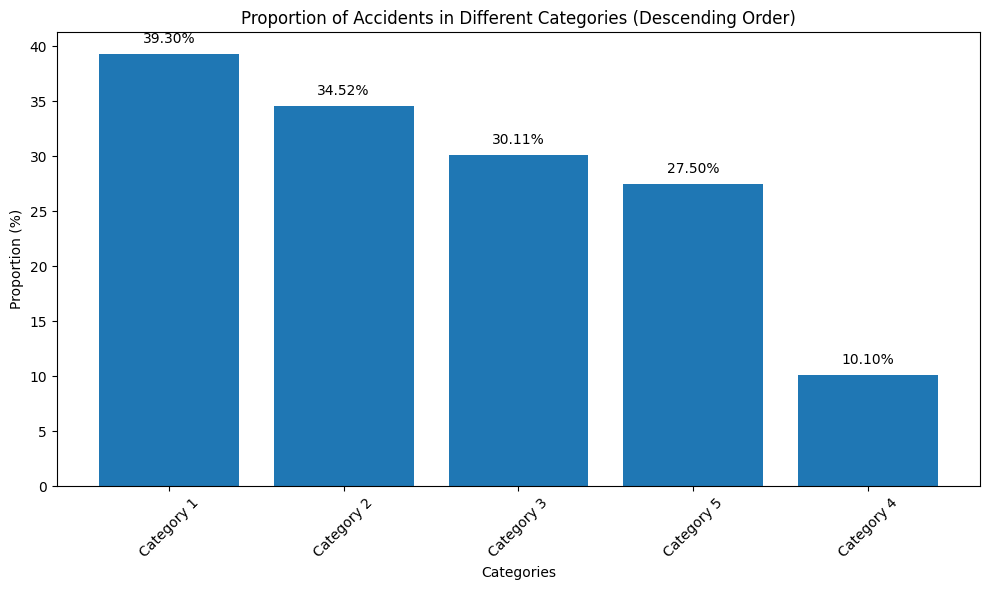

In [145]:
import matplotlib.pyplot as plt

# Calculate proportion of all categories in the total of accidents
prop_Cat1 = df_AA['cause_category1'].sum() / 5008 * 100
prop_Cat2 = df_AA['cause_category2'].sum() / 5008 * 100
prop_Cat3 = df_AA['cause_category3'].sum() / 5008 * 100
prop_Cat4 = df_AA['cause_category4'].sum() / 5008 * 100
prop_Cat5 = df_AA['cause_category5'].sum() / 5008 * 100

# Names of the categories
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# Proportions for each category
proportions = [prop_Cat1, prop_Cat2, prop_Cat3, prop_Cat4, prop_Cat5]

# Combine categories and proportions, and sort by proportions in descending order
sorted_data = sorted(zip(categories, proportions), key=lambda x: x[1], reverse=True)

# Unpack the sorted data
sorted_categories, sorted_proportions = zip(*sorted_data)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(sorted_categories, sorted_proportions)
plt.xlabel('Categories')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Accidents in Different Categories (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels above each bar
for bar, proportion in zip(bars, sorted_proportions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{proportion:.2f}%', ha='center')

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


We can see that **Category 1: Weather Conditions** is present in 39.30% of the accidents. The following is **Category 2: Mechanical, Electrical and Instrumentation Failure** with 34.52%. The next one is **Category 3: Human Error** present in 30.11%  of the accidents and **Category 4: Cambat Losses** with 10.10%. **Category 5: Not Defined** is present in 27.50% of the data. We need to keep in mind that one accident could have more than one category.

Let's check how many categories have each accident:

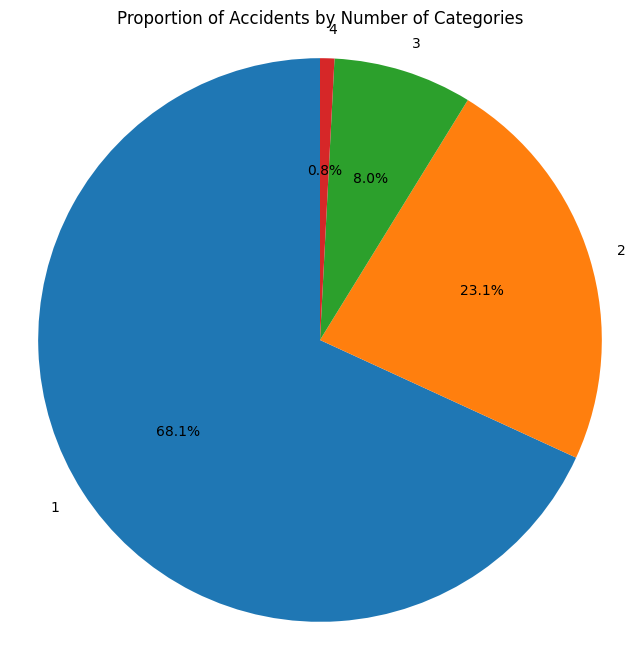

In [146]:
import matplotlib.pyplot as plt
from collections import Counter

sum_cat_per_acc = []
for i in range(0,5008):
    sum_cat_per_acc_j = 0
    for j in range(18,23):
        sum_cat_per_acc_j += df_AA.iloc[i,j]
    sum_cat_per_acc.append(sum_cat_per_acc_j)

# Filter out occurrences of the number 5
filtered_list = [x for x in sum_cat_per_acc if x != 5]

# Count the occurrences of each number
counted = Counter(filtered_list)

# Extract the categories and their counts
categories = list(counted.keys())
counts = list(counted.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Accidents by Number of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.show()

It's evident that the majority of accidents, accounting for 68.1%, fall into a single category, aligning with the anticipated and typical pattern. About 23.1% of accidents involve two categories, while 8% involve three categories, and a mere 0.8% encompass four categories. This distribution reflects the inherent complexity of accidents, often influenced by multiple contributing factors. Such a varied categorization aligns with our expectations and is considered the norm in accident analysis.

#### 2.3. Column `hour_declared`:

This column represents the departure hour. This can be found looking at the summary column. For example, the acc_id 806 is an example. hour_dclared is 10:15 and the column summary says the following: "Left Milne Bay on routine flight  to Dobodura at 10:15. Crashed into sea near Milne Bay."

Let's check the formats we have in this column:

In [147]:
import pandas as pd
import re

# Create a dataframe with only the unique values of the column 'hour_declared'
unique_formats = df_AA['hour_declared'].unique()

# Create a dictionary to store counts of different formats
format_counts = {}

# Define regular expressions for different formats
# For example, you can define a regex for HHMM and HH:MM formats
hhmm_pattern = r'^\d{4}$'
hh_mm_pattern = r'^\d{2}:\d{2}$'
c_hh_mm_pattern = r'^c \d{2}:\d{2}$'

# Iterate through unique values and count formats
for value in unique_formats:
    if re.match(hhmm_pattern, value):
        format_counts['HHMM'] = format_counts.get('HHMM', 0) + 1
    elif re.match(hh_mm_pattern, value):
        format_counts['HH:MM'] = format_counts.get('HH:MM', 0) + 1
    elif re.match(c_hh_mm_pattern, value):
        format_counts['c HH:MM'] = format_counts.get('c HH:MM', 0) + 1
    else:
        format_counts['Other'] = format_counts.get('Other', 0) + 1

# Print the detected formats and their counts
for format, count in format_counts.items():
    print(f"Format: {format}, Count: {count}")

Format: HHMM, Count: 1036
Format: Other, Count: 19
Format: c HH:MM, Count: 29
Format: HH:MM, Count: 133


We can see that the main formats are:
- HHMM.
- c HH:MM.
- HH:MM.

However, there are some other 19 formats and we need to check it in order to transform them into a unique format:

In [148]:
# Create a dataframe with only the unique values of the column 'hour_declared'
unique_formats = df_AA['hour_declared'].unique()

# Create a set to store unique 'Other' format values
other_formats_set = set()

# Define regular expressions for different formats
hhmm_pattern = r'^\d{4}$'
hh_mm_pattern = r'^\d{2}:\d{2}$'
c_hh_mm_pattern = r'^c \d{2}:\d{2}$'

# Iterate through unique values and identify 'Other' formats
for value in unique_formats:
    if not (re.match(hhmm_pattern, value) or re.match(hh_mm_pattern, value) or re.match(c_hh_mm_pattern, value)):
        other_formats_set.add(value)

# Print the unique 'Other' formats
for format_value in other_formats_set:
    print(format_value)

0500Z
c 9:15
900
06;15
1:02
00:7
1:35
11:3
c:17:00
03:50Z
c: 2:00
c:09:00
17:34Z
?
0:00
245
175
01:00Z
02:09Z


We can see that there are some other patterns and we are going to create new function to transform it:

In [149]:
def convert_to_hh_mm(value):
    # Define regular expressions for different formats
    hhmm_pattern = r'^\d{4}$'
    hh_mm_pattern = r'^\d{2}:\d{2}$'
    c_hh_mm_pattern = r'^c[:\s]\d{2}:\d{2}$'
    hhmmz_pattern = r'^\d{4}Z$'
    c_hhmm_pattern = r'^c:\d{2}:\d{2}$'
    single_digit_hhmm_pattern = r'^\d{1}:\d{2}$'
    c_single_digit_hhmm_pattern = r'^c[:\s]?\d{1}:\d{2}$'

    if re.match(hhmm_pattern, value):
        return f"{value[:2]}:{value[2:]}"
    elif re.match(hh_mm_pattern, value) or re.match(c_hh_mm_pattern, value):
        return value.lstrip("c ").lstrip(":")  # Remove "c " and ":" at the beginning
    elif re.match(hhmmz_pattern, value):
        return f"{value[:2]}:{value[2:4]}"
    elif re.match(r'^\d{2}:\d{2}Z$', value):
        return value[:-1]  # Remove the 'Z' to get "hh:mm"
    elif re.match(r'^\d{1,2};\d{2}$', value):
        parts = value.split(';')
        return f"{int(parts[0]):02d}:{parts[1]}"  # Convert parts[0] to an integer
    elif re.match(r'^\d{3}$', value):
        return f"0{value[:1]}:{value[1:]}"
    elif re.match(r'^\d{1}:\d{2}$', value):
        parts = value.split(':')
        return f"0{parts[0]}:{parts[1]}"
    elif re.match(c_hhmm_pattern, value):
        parts = value.split(':')
        return f"{parts[0][2:]}:{parts[1]}"
    # Handle "c: h:mm" and "c h:mm" formats
    elif re.match(c_single_digit_hhmm_pattern, value):
        parts = re.split(r'[:\s]', value)  # Split by ':' or whitespace
        if len(parts) == 3:
            if len(parts[1]) == 1:
                parts[1] = f"0{parts[1]}"  # Add leading zero to single-digit hour
            minutes = int(parts[2])
            if minutes > 59:
                return None  # Return None if minutes are more than 59
            parts[2] = str(minutes).zfill(2)
            return f"{parts[1]}:{parts[2]}"
        else:
            return None
    elif re.match(r'^c:\s?\d:\d{2}$', value):
        parts = re.split(r'[:\s]', value)  # Split by ':' or whitespace
        if len(parts) == 4:
            if len(parts[2]) == 1:
                parts[2] = f"0{parts[2]}"  # Add leading zero to single-digit hour
            minutes = int(parts[3])
            if minutes > 59:
                return None  # Return None if minutes are more than 59
            parts[3] = str(minutes).zfill(2)
            return f"{parts[2]}:{parts[3]}"
        else:
            return None
    else:
        return None  # Return None for values that can't be converted

Now, let's convert te column df_AA['hour_declared'] with the function above.

In [150]:
# Create a new column 'converted_hour' by applying the function to 'hour_declared'
df_AA['hour_declared_conv'] = df_AA['hour_declared'].apply(lambda x: convert_to_hh_mm(x))

# Get the index of the 'hour_declared' column
hour_declared_index = df_AA.columns.get_loc('hour_declared')

# Insert the 'converted_hour' column right next to 'hour_declared' column
df_AA.insert(hour_declared_index + 1, 'hour_declared_conv', df_AA.pop('hour_declared_conv'))

In [151]:
df_AA

,acc_id,date,hour_declared,hour_declared_conv,dep_arr_city,operator,flight_no,route,ac_type,registration,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",1718,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",?,None,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",0630,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",?,None,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",1830,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,18:35,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",1800,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",0800,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Let's check if the transformation was well done:

In [152]:
#Check if the hours are  not higher than 23:

# Filter out rows with None values
filtered_df = df_AA.dropna(subset=['hour_declared_conv'])

# Create a boolean mask for rows where hours > 12 and minutes > 59
mask = filtered_df['hour_declared_conv'].apply(lambda x: 
    (int(x.split(':')[0]) > 23)
)

# Count the number of rows that meet the condition
count = mask.sum()

# Print the count
print(f"Number of rows with hours > 23: {count}")

Number of rows with hours > 23: 0


In [153]:
#Check if the minutes are  not higher than 59:

# Filter out rows with None values
filtered_df = df_AA.dropna(subset=['hour_declared_conv'])

# Create a boolean mask for rows where hours > 12 and minutes > 59
mask = filtered_df['hour_declared_conv'].apply(lambda x: 
    (int(x.split(':')[1]) > 59)  # Check if minutes > 59
)

# Count the number of rows that meet the condition
count = mask.sum()

# Print the count
print(f"Number of rows with minutes > 59: {count}")

Number of rows with minutes > 59: 1


We can see that there is one record with minutes higher than 59. Let's check which is:

In [154]:
# Filter out rows with None values
filtered_df = df_AA.dropna(subset=['hour_declared_conv'])

# Create a boolean mask for rows where minutes > 59
mask = filtered_df['hour_declared_conv'].apply(lambda x: int(x.split(':')[1]) > 59)

# Get the rows where minutes > 59
rows_with_minutes_gt_59 = filtered_df[mask]

# Print the rows
print("Rows with minutes > 59:")
print(rows_with_minutes_gt_59)

Rows with minutes > 59:
      acc_id              date hour_declared hour_declared_conv  \
3794    3794  October 04, 1992           175              01:75   

                dep_arr_city operator flight_no                 route  \
3794  Amsterdam, Netherlands    El Al      1862  Amsterdam - Tel Aviv   

                ac_type registration  ... total_fatalities  \
3794  Boeing B-747-258F       4X-AXG  ...                4   

     passenger_fatalities crew_fatalities ground_fatalities  \
3794                    1               3                39   

                                                summary cause_category1  \
3794  Shortly after taking off from Schiphol Airport...           False   

     cause_category2 cause_category3 cause_category4  cause_category5  
3794            True            True           False            False  

[1 rows x 24 columns]


It's the acc_id 3794. It has a declared hour of 175 and the function converted to 01:75 and it must be 17:50. Let's change that value:

In [155]:
df_AA.iloc[3794,3] = "17:50"

Now we can eliminate the column 'hour_declared' from our dataframe:

In [156]:
df_AA.drop(columns='hour_declared',inplace=True)
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,operator,flight_no,route,ac_type,registration,cn_ln,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


With all the changes made until now, the dataset dictionary are as follows:

- **acc_id** = Is the unique identifier number of the accident.
- **date** = date of the accident.
- **hour_declared_conv** = flight departure hour.
- **dep_arr_city** = departure or arrival city of the flight.
- **flight_no** = flight number.
- **route** = cities of the flight route.
- **ac_type** = aircraft type.
- **all_aboard** = total people aboard the flight.
- **passangers_aboard** = total passengers aboard.
- **crew_aboard** = total crew members aboard.
- **total_fatalities** = sum of passenger_fatalities and crew_fatalitites.
- **passangers_fatalities** = total passengers fatalities.
- **crew_fatalities** = total crew fatalities.
- **ground_fatalities** = total fatalities on ground due to the accident. People not aboard but was affected on ground.
- **summary** = text summarizing the accident.
- **cause_category1** = 1: If accident was caused by weather conditions, 0: if not.
- **cause_category2** = 1: If accident was caused by technical problems, such as mechanical, electrical or instrumentation failure, 0: if not.
- **cause_category3** = 1: If accident was caused by human error 0: if not.
- **cause_category4** = 1: If accident was caused by a conflict, war, or terrorist attack 0: if not.
- **cause_category5** = 1: If accident has unknown or undetermined causes 0: if not.


#### 2.4. Column `date`:

At first sight we can see that this column is in a good format. But we are going to check that out:

In [157]:
import pandas as pd
from datetime import datetime

# Define the expected date format
expected_format = "%B %d, %Y"  # September 17, 1908

date_series = df_AA['date']

# Initialize an empty list to store dates with different formats
dates_with_different_format = []

# Iterate through the date_series and attempt to parse each date
for date_str in date_series:
    try:
        # Attempt to parse the date using the expected format
        datetime.strptime(date_str, expected_format)
    except ValueError:
        # If parsing fails, add the date to the list of dates with different formats
        dates_with_different_format.append(date_str)

# Print the dates with different formats
if dates_with_different_format:
    print("Dates with different formats:")
    for date_str in dates_with_different_format:
        print(date_str)
else:
    print("All dates have the expected format.")

All dates have the expected format.


We can see that all dates have the expected format.

#### 2.5. Column `dep_arr_city`:

This column contains the departure or arrival city of the flight. And sometimes, it shows an area where the aircraft flew. Let's check some of those values deeply.

In [158]:
for i in range(0,25):
    print(df_AA.iloc[i,3])

Fort Myer, Virginia
Juvisy-sur-Orge, France
Atlantic City, New Jersey
Victoria, British Columbia, Canada
Over the North Sea
Near Johannisthal, Germany
Tienen, Belgium
Off Cuxhaven, Germany
Near Jambol, Bulgeria
Billericay, England
Potters Bar, England
Mainz, Germany
Off West Hartlepool, England
Near Gent, Belgium
Off Northern Germany
Near Texel Island, North Sea
Off Vlieland Island, North Sea
Near Yarmouth, England
Off western Denmark
Near Luneville, France
Over the Mediterranean
Off Helgoland Island, Germany
Ameland Island, North Sea
Elizabeth, New Jersey
Cleveland, Ohio


Through a sample, we can see that this data has good quality and we can use it for further analysis. This column can help us to identify some places that we may need to focus more our resources. However, to have a wide analysis we are going to group the information by country or state. This will help the Business Intelligence Tool to recognize the place. In line with this thinking, let's capture the state or the country at the end of each text, just after the comma.

In [159]:
# List of place names
places = df_AA['dep_arr_city']
# Initialize a list to store the extracted countries or states
countries_states = []

# Iterate through each place name
for place in places:
    # Split the place name by the comma (",") and get the last part
    parts = place.split(", ")
    if len(parts) > 1:
        country_state = parts[-1]  # Get the last part
        countries_states.append(country_state)
    else:
        countries_states.append("Unknown")  # Handle cases with no comma

# Convert the list to a DataFrame
df_countries_states = pd.DataFrame({'country_state': countries_states})

# Concatenate df_AA and df_countries_states along the columns axis
result_df = pd.concat([df_AA, df_countries_states], axis=1)

# Get the index of the 'hour_declared' column
dep_arr_city_index = result_df.columns.get_loc('dep_arr_city')

# Insert the 'converted_hour' column right next to 'hour_declared' column
df_AA.insert(dep_arr_city_index + 1, 'country_state', result_df.pop('country_state'))
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country_state,operator,flight_no,route,ac_type,registration,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",Virginia,Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,SC1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",New Jersey,Military - U.S. Navy,?,Test flight,Dirigible,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,Unknown,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",Alaska,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Let's check how many "unkown" values are in the column country_state.

In [160]:
# Count the "Unknown" values in df_AA['country_state']
unknown_count = (df_AA['country_state'] == 'Unknown').sum()

# Print the count
print("Count of 'Unknown' values:", unknown_count)

Count of 'Unknown' values: 196


We can see 196 unkown places in the column 'country_state'. Let's check some of them:

In [161]:
mask = df_AA['country_state'] == 'Unknown'
unknown_places = df_AA[mask]
for i in range(100,125):
    print(unknown_places.iloc[i,3])

Vietnam
Off the Oregon coast
Korat ,Thailand
Over North Carolina
Over the Pacific Ocean
Over the Mediterranean Sea
Over the North Pacific Ocean
Off Guam
Over the Mediterranean Sea
North Atlantic Ocean
Nicaragua
Gulf of Mexico
Gulf of Sirte
Taipei,Taiwan
Persian Gulf
Midway Island Naval Air Station
Singapore
Off Puerto Rico
Sao Tomé
Caranavi ,Bolivia
Algeria
Near Hong Kong
North Atlantic Ocean
Sao Tomé & Principe
Syktyvkar ,Russia


We can see some patterns:

1. Some of the texts, have a comma and there is no space to continue with the country, like "Iloilo,Philippines". We can extract the countries of those values.
2. Also we can see there are records that have a "." and then the country, like "Iloilo. Philippines". We can extract the countries of those values.
3. Also we can see there are records that have a ":" and then the country, like "Iloilo: Philippines". We can extract the countries of those values.
4. We can eliminate these words in order to have only the country or the state:
- "Off ".
- "Off  ".
- "Off Northern ".
- "Off western ".
- "Near ".
- "Off the ".
- " coast".
- "Gulf of ".
- "Over the Gulf of ".
- "Off the coast of ".
- "Near Jacquinot Bay  ".
- "Off the ".
- " International Airport".
- "Territory of ".
- "Near Irkutsk ".
- "Northeast ".
- "Near Villia ".
- "Southeastern ".
- "Off Tabones Island  ".
- "Barquisimeto ".
- "Northern ".
- "Papua ".
- "Glasgow ".
- "Near Petreasa ".


In [162]:
import pandas as pd

# Define a function to extract countries from values with commas, periods, or colons
def extract_country(text):
    # Check for a period followed by a space and extract the last part after it
    if '. ' in text:
        parts = text.split('. ')
        return parts[-1].strip()
    
    # Check for a colon and extract the last part after it
    if ':' in text:
        parts = text.split(':')
        return parts[-1].strip()
    
    # If no period-space or colon pattern is found, split by commas and remove empty parts
    parts = [part.strip() for part in text.split(',') if part.strip()]
    
    # Find the last non-empty part as the country
    for part in reversed(parts):
        if part:
            return part
    
    return None

# Define a function to remove specified words and patterns
def remove_words_and_patterns(text):
    patterns_to_remove = [
        r'Off the |Off  |Over the |Over |Off Northern |Off western |Near |Off | coast|Gulf of |Over the Gulf of |Off the coast of |Near Jacquinot Bay | International Airport|Territory of |Near Irkutsk |Northeast |Near Villia |Southeastern |Off Tabones Island |Barquisimeto |Northern |Papua |Glasgow |Near Petreasa '
    ]
    
    # Apply each pattern and remove the matching text
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    
    return text.strip()

# Create a copy of the DataFrame
unknown_places_copy = unknown_places.copy()

# Apply the extraction function to the 'dep_arr_city' column
unknown_places_copy['country'] = unknown_places_copy['dep_arr_city'].apply(extract_country)

# Apply the word and pattern removal function to the 'country' column
unknown_places_copy['country'] = unknown_places_copy['country'].apply(remove_words_and_patterns)

# Display the DataFrame with extracted and cleaned countries
unknown_places_copy

,acc_id,date,hour_declared_conv,dep_arr_city,country_state,operator,flight_no,route,ac_type,registration,...,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5,country
4,4,"September 09, 1913",18:30,Over the North Sea,Unknown,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False,North Sea
14,14,"March 30, 1917",None,Off Northern Germany,Unknown,Military - German Navy,?,?,Schutte-Lanz S-L-9 (airship),?,...,?,?,0,Struck by lightning and crashed into the Balti...,True,False,False,False,False,Germany
18,18,"August 21, 1917",07:00,Off western Denmark,Unknown,Military - German Navy,?,?,Zeppelin L-23 (airship),?,...,?,?,0,Shot down by British aircraft.,False,False,False,True,False,Denmark
20,20,"April 07, 1918",21:30,Over the Mediterranean,Unknown,Military - German Navy,?,?,Zeppelin L-59 (airship),?,...,?,?,0,Exploded and crashed into the sea off the sout...,False,False,False,False,True,Mediterranean
53,53,"February 15, 1921",None,Off Gibraltar,Unknown,Aeropostale,?,?,Breguet 14,F-ALBA,...,0,2,0,The mail fligh encountered poor weather condit...,True,False,False,False,False,Gibraltar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,4882,"January 20, 2014",16:34,Near Petreasa Romania,Unknown,Scoala Superioara de Aviatie Civla,?,Bucharest - Oradea,Britten Norman BN-2A-27 Islander,YR-BNP,...,1,1,0,The air ambulance left Bucharest with a medica...,True,True,False,False,False,Petreasa Romania
4886,4886,"March 08, 2014",02:41,South Indian Ocean,Unknown,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,9M-MRO,...,227,12,0,Radar contact was lost with the aircraft 2 hou...,False,False,False,False,True,South Indian Ocean
4904,4904,"December 28, 2014",06:18,Java Sea,Unknown,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,PK-AXC,...,155,7,0,The aircraft went missing while en route from ...,True,True,False,False,False,Java Sea
4934,4934,"May 19, 2016",02:49,175 miles off the Egyptian coast,Unknown,EgyptAir,804,Paris - Cairo,Airbus A320-232,SU-GCC,...,56,10,0,"The plane was en route from Paris to Cairo, fl...",False,False,True,False,False,175 miles off the Egyptian


Now, that we have the data transformed, we need to copy all the values in the unknown_places_copy['country'] into df_AA['country_state'] using the column 'acc_id' was the common point.

In [163]:
# Create a dictionary mapping 'acc_id' to 'country' from unknown_places_copy
mapping_dict = unknown_places_copy.set_index('acc_id')['country'].to_dict()

# Use the map function to replace 'country_state' values in df_AA based on 'acc_id' if it exists in the mapping_dict
df_AA['country_state'] = df_AA['acc_id'].map(mapping_dict).fillna(df_AA['country_state'])
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country_state,operator,flight_no,route,ac_type,registration,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",Virginia,Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,SC1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",New Jersey,Military - U.S. Navy,?,Test flight,Dirigible,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",Alaska,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Now, let's check the unique values for the column country_state to catch some data that needs to be cleaned. 

In [164]:
print(df_AA['country_state'].unique())

['Virginia' 'France' 'New Jersey' 'Canada' 'North Sea' 'Germany' 'Belgium'
 'Bulgeria' 'England' 'Denmark' 'Mediterranean' 'Ohio' 'Pennsylvania'
 'Illinois' 'Italy' 'Maryland' 'Kent' 'UK' 'Indiana' 'Iowa' 'Columbia'
 'Spain' 'Wyoming' 'Minnisota' 'Wisconsin' 'Gibraltar' 'Nevada'
 'Australia' 'NY' 'North Atlantic Ocean' 'China' 'Morocco'
 'United Kingdom' 'Romania' 'Russia' 'Mediterranean Sea' 'WY'
 'English Channel' 'Colombia' 'United States' 'USSR' 'Hungary'
 'Mauritania' 'Czechoslovakia' 'New York' 'Unied Kingdom' 'Oregon' 'Idaho'
 'Algeria' 'Connecticut' 'Atlantic Ocean' 'Finland' 'Uruguay' 'Ariège'
 'Nebraska' 'Brazil' 'Minnesota' 'Kansas' 'Netherlands' 'Texas'
 'Washington' 'Tennessee' 'Greece' 'West Virginia' 'California' 'Mexico'
 ' Pest Hungary' 'Algiers' 'Cuba' 'New Mexico' 'Iran' 'Ontario'
 'East Sardinia' 'Madagascar' 'Missouri' 'Argentina' 'Massachusetts'
 'New Zealand' 'Burma' 'Bulgaria' 'South Africa' 'Utah' 'Thailand'
 'Ilinois' 'Florida' 'Michigan' 'Iraq' 'Chile' 'Leban

We can see that there some values that needs to be fixed in order to have only the countries. We need to convert the states of USA and Canada into countries. Let's do that.

In [165]:
# Replacing US states
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
    "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee",
    "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Replace U.S. states with "United States" in the 'country_state' column
df_AA['country_state'] = df_AA['country_state'].replace(us_states, "United States")

us_state_acronyms = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS",
    "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY",
    "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

# Replace state acronyms with "United States" in the 'country_state' column
df_AA['country_state'] = df_AA['country_state'].replace(us_state_acronyms, "United States")


# Replacing Canada provices
canadian_provinces = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
    "Northwest Territories", "Nova Scotia", "Nunavut", "Ontario", "Prince Edward Island", "Quebec",
    "Saskatchewan", "Yukon"
]

# Replace Canadian provinces with "Canada" in the 'country_state' column
df_AA['country_state'] = df_AA['country_state'].replace(canadian_provinces, "Canada")

df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country_state,operator,flight_no,route,ac_type,registration,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,SC1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,?,Test flight,Dirigible,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


In [166]:
# Get unique values from the 'country_state' column and sort them alphabetically
unique_states = sorted(df_AA['country_state'].unique())
for i in range(0,50):
    print(unique_states[i])

 Atlantic Ocean
 Australia
 Bolivia
 Brazil
 Cameroon
 Canada
 Canary Islands
 Colombia
 Democratic Republic Congo
 England
 India
 Indonesia
 Italy
 Katanga
 Malaysia
 New Caledonia
 New Guinea
 New Mexico
 Pakistan
 Pest Hungary
 Switzerland
 Ukraine
 Uruguay
 Uzbekistan
 Zimbabwe
110 miles West of Ireland
175 miles off the Egyptian
325 miles east of Wake Island
800 miles east of Newfoundland
?
Aegean Sea
Afghanistan
Afghanstan
Africa
Airzona
Alaksa
Alakska
Albania
Algeria
Algiers
American Samoa
Amsterdam
Andaman Sea
Andes
Angola
Antarctica
Antigua
Aregntina
Argentina
Ariège


We can see that there are some values that have ortographic errors. We are going to fix them in the Buisness Intelligence Tool.

Let''s change the countries that are wrong written.

In [167]:
data = [
    ' Australia - Australia',
    ' Bolivia - Bolivia',
    ' Brazil - Brazil',
    ' Cameroon - Cameroon',
    ' Canada - Canada',
    ' Canary Islands - Spain',
    ' Colombia - Colombia',
    ' Democratic Republic Congo - Democratic Republic Congo',
    ' England - England',
    ' India - India',
    ' Indonesia - Indonesia',
    ' Italy - Italy',
    ' Malaysia - Malaysia',
    ' New Guinea - Papua New Guinea',
    ' Pakistan - Pakistan',
    ' Switzerland - Switzerland',
    ' Ukraine - Ukraine',
    ' Uruguay - Uruguay',
    ' Uzbekistan - Uzbekistan',
    ' Zimbabwe - Zimbabwe',
    " Katanga - Democratic Republic Congo",
    " New Mexico - United States",
    " Pest Hungary - Hungary",
    "? - Not Applicable",
    "110 miles West of Ireland - Ireland",
    "175 miles off the Egyptian - Egypt",
    "325 miles east of Wake Island - Wake Island",
    "800 miles east of Newfoundland - Canada",
    "Aegean Sea - Not Applicable",
    "Afghanstan - Afghanistan",
    "Africa - Not Applicable",
    "Airzona - United States",
    "Alaksa - United States",
    "Alakska - United States",
    "Algiers - Algeria",
    "Andaman Sea - Myanmar",
    "Andes - Not Applicable",
    "Amsterdam - Netherlands",
    "Antigua - Antigua and Barbuda",
    "Aregntina - Argentina",
    "Ariège - France",
    "Atlantic Ocean - Not Applicable",
    "Atlantic Ocean off Florida - United States",
    "Australila - Australia",
    "Azores - Portugal",
    "Azores (Portugal) - Portugal",
    "Baangladesh - Bangladesh",
    "Baltic Sea - Sweden",
    "Belgian Congo - Democratic Republic Congo",
    "Belgian Congo (Zaire) - Democratic Republic Congo",
    "Belgium Congo - Democratic Republic Congo",
    "Besar,Thailand - Thailand",
    "Bimini - Bahamas",
    "Black Sea - Not Applicable",
    "Boliva - Bolivia",
    "Borneo - Indonesia",
    "Bosnia - Bosnia-Herzegovina",
    "British Cameroons - Cameroon",
    "British Columbia Canada - Canada",
    "Bugaria - Bulgaria",
    "Bulgeria - Bulgaria",
    "Burma - Myanmar",
    "Burma (Myanmar) - Myanmar",
    "Cailifornia - United States",
    "Californiia - United States",
    "Calilfornia - United States",
    "Cameroons - Cameroon",
    "Canada2 - Canada",
    "Canary Islands - Spain",
    "Cape Verde Islands - Cape Verde",
    "Afghanistanghanistan - Afghanistan",
    "Central Mozambique - Mozambique",
    "Centeral Afghanistan - Afghanistan",
    "Chechnya - Russia",
    "Chicago Illinois - United States",
    "Chili - Chile",
    "Coatia - Croatia",
    "Coloado - United States",
    "Columbia - Colombia",
    "Comoro Islands - Comoros",
    "Congo Democratic Republic - Democratic Republic Congo",
    "Crete - Greece",
    "Dutch Guyana - Suriname",
    "East Timor - Timor-Leste",
    "D.C. - United States",
    "DR Congo - Democratic Republic Congo",
    "Deleware - United States",
    "Democratic Republic Cogo - Democratic Republic Congo",
    "Democratic Republic of Congo - Democratic Republic Congo",
    "Democratic Republic of the Congo - Democratic Republic Congo",
    "Democtratic Republic Congo - Democratic Republic Congo",
    "Desertores Island Región de Los Lagos - Chile",
    "Djbouti - Djibouti",
    "Domincan Republic - Dominican Republic",
    "East Germany - Germany",
    "East Pakistan - Pakistan",
    "East Sardinia - Italy",
    "Eastern Libya - Libya",
    "En route from Argentina to California - Argentina",
    "En route from Argentina  to  California - Argentina",
    "English Channel - England",
    "Eugene Island - United States",
    "French Cameroons - Cameroon",
    "French Equatorial Africa - Central African Republic",
    "French Indo-China - Laos",
    "French Somaliland - Djibouti",
    "French West Africa - Mali",
    "French West Indies - France",
    "Great Inagua - Bahamas",
    "Guernsey - France",
    "Guizhou Province - China",
    "Gulf of Karkinitsky - Ukraine",
    "Hati - Haiti",
    "HI) - United States",
    "Himalayas - Nepal",
    "Houma Louisiana - United States",
    "Hunary - Hungary",
    "Ilinois - United States",
    "India. - India",
    "Indian - India",
    "Indian Ocean - Not Applicable",
    "Inodnesia - Indonesia",
    "Irish - Ireland",
    "Irkutsk Russia - Russia",
    "Islay Island - Scotland",
    "Ivory Coast - Côte d'Ivoire",
    "Jacquinot Bay New Guinea - Papua New Guinea",
    "Jacquinot Bay  New Guinea - Papua New Guinea",
    "Jamacia - Jamaica",
    "Java Sea - Indonesia",
    "Karkov - Ukraine",
    "Kent - United States",
    "Khmer Republic - Cambodia",
    "Kirghizia - Kyrgyzstan",
    "Labrador - Canada",
    "Leeward Islands - Guadeloupe",
    "Malagasy Republic - Madagascar",
    "Malaya - Malaysia",
    "Malta-Luqa - Malta",
    "Manmar - Myanmar",
    "Mariana Islands - Northern Mariana Islands",
    "Massachutes - United States",
    "Mauretania - Mauritania",
    "Mediterranean - Not Applicable",
    "Mediterranean Sea - Not Applicable",
    "Mexic - Mexico",
    "Midway Island Naval Air Station - United States",
    "Milford Sound - New Zealand",
    "Minnisota - United States",
    "Mississipi - United States",
    "Morroco - Morocco",
    "NE of Bermuda - Bermuda",
    "Netherlands Indies - Indonesia",
    "New Guinea - Papua New Guinea",
    "New Guinea - Papua New Guinea", 
    "NWT,Canada - Canada",
    "Nag - Japan",
    "Nambia - Namibia",
    "Napal - Nepal",
    "New York (Idlewild) - United States",
    "Newfoundland - Canada",
    "North Atlantic - Not Applicable",
    "North Atlantic Ocean - Not Applicable",
    "North Pacific Ocean - Not Applicable",
    "Northern India - India",
    "North Sea - Not Applicable",
    "Northwest Territories Canada - Canada",
    "Okinawa - Japan",
    "Ontario ,Canada - Canada",
    "Pacific Ocean - Not Applicable",
    "Pacific Ocean - Not Applicable",
    "Papua - Papua New Guinea",
    "Persian Gulf - Bahrain",
    " Pest Hungary - Hungary",
    "Petreasa Romania - Romania",
    "Philipines - Philippines",
    "Philippine Sea - Philippines",
    "Phillipines - Philippines",
    "Qld. Australia - Australia",
    "Quebec Canada - Canada",
    "Queensland  Australia - Australia",
    "Queensland Australia - Australia",
    "Republic of Djibouti - Djibouti",
    "Republic of Georgia - Georgia",
    "Reunion - France",
    "Rhodesia - Zimbabwe",
    "Rhodesia (Zimbabwe) - Zimbabwe",
    "Russian - Russia",
    "Saint Lucia Island - Saint Lucia",
    "Santiago de Cuba - Cuba",
    "Sao Gabriel de Cachoeria - Brazil",
    "Sao Tomé - São Tomé and Príncipe",
    "Sarawak - Malaysia",
    "Saudia Arabia - Saudi Arabia",
    "Sea of Japan - Japan",
    "Sierre Leone - Sierra Leone",
    "Sirte - Libya",
    "South Atlantic Ocean - Not Applicable",
    "South Indian Ocean - Not Applicable",
    "South Australia - Australia",
    "South Dekota - United States",
    "South Kazakistan - Kazakhstan",
    "South Korean - South Korea",
    "South Vietnam - Vietnam",
    "South Yemen - Yemen",
    "South of Gibraltar - Gibraltar",
    "South-West  Africa (Namibia) - Namibia",
    "Soviet Union - Russia",
    "Spain Canary Islands - Spain"
    "São Tomé Island - São Tomé and Príncipe",
    "Surinam - Suriname",
    "Swden - Sweden",
    "Tabones Island  Philippines - Philippines",
    "Tanganyika - Tanzania",
    "Tahiti - French Polynesia",
    "Taiwan (Formosa) - Taiwan",
    "Tasmania - Australia",
    "Tennesee - United States",
    "The Netherlands - Netherlands",
    "Timor - East Timor",
    "Trinidad - Trinidad and Tobago",
    "UAR - Egypt",
    "UK - United Kingdom",
    "UAE - United Arab Emirates",
    "US Virgin Islands - U.S. Virgin Islands",
    "USSR - Russia",
    "Unied Kingdom - United Kingdom",
    "Upper Volta - Burkina Faso",
    "Uzbekstan - Uzbekistan",
    "Villia Greece - Greece",
    "Virgin Islands - U.S. Virgin Islands",
    "Virginia. - United States",
    "Wake Island - United States",
    "Wales - United Kingdom",
    "Washingon - United States",
    "Washington D.C. - United States",
    "Washington DC - United States",
    "West Africa - Mali",
    "West Indies - Guadeloupe",
    "Western Africa - Senegal",
    "West Germany - Germany",
    "West Pakistan - Pakistan",
    "Western Samoa - Samoa",
    "Wisconson - United States",
    "Yugosalvia - Yugoslavia",
    "Yugoslavia - Serbia",
    "Yukon Territory - Canada",
    "Zaire - Democratic Republic Congo",
    "Zimbabwe) - Zimbabwe",
    "and Bermuda - Bermuda",
    "bulgaria - Bulgaria",
    "coast of France - France",
    "off Angola - Angola",
    "off Australia - Australia",
    "off Bermuda - Bermuda",
    "off the Philippine island of Elalat - Philippines",
    'Mexicoo - Mexico',
    "Jacquinot Bay  New Guinea - Papua New Guinea",
    "Papua New Guinea Papua New Guinea New Guinea - Papua New Guinea",
    "Papua New Guinea New Guinea - Papua New Guinea",
    "Washington United States - United States",
    "Democratic Republic of Democratic Republic Congo - Democratic Republic Congo",
    " Atlantic Ocean - Atlantic Ocean",
    " New Caledonia - New Caledonia",
    " Katanga - Democratic Republic Congo",
    " New Mexico - United States",
    "Pacific Ocean between Hong Kong and Macao - Pacific Ocean",
    "BO - Bolivia",
    "Pacific Ocean between Manila and Guam - Pacific Ocean",
    "Fox Glacier Airstrip - New Zealand",
    "Tachikawa Air Base - Japan",
    "Tonkin - Vietnam"
]

# Initialize empty lists to store what is before and after the hyphen "-"
before_hyphen = []
after_hyphen = []

# Iterate through each element in the 'data' list and split it into parts before and after the hyphen "-"
for element in data:
    parts = element.split(" - ")
    if len(parts) >= 2:
        before_hyphen.append(parts[0])
        after_hyphen.append(parts[1])
    else:
        # Handle the case where there is no hyphen "-" in the element
        # You can choose to skip or handle such elements differently
        before_hyphen.append(parts[0])
        after_hyphen.append("No hyphen found")

# Display the resulting lists
print("Before the hyphen:")
print(before_hyphen)

print("\nAfter the hyphen:")
print(after_hyphen)

Before the hyphen:
[' Australia', ' Bolivia', ' Brazil', ' Cameroon', ' Canada', ' Canary Islands', ' Colombia', ' Democratic Republic Congo', ' England', ' India', ' Indonesia', ' Italy', ' Malaysia', ' New Guinea', ' Pakistan', ' Switzerland', ' Ukraine', ' Uruguay', ' Uzbekistan', ' Zimbabwe', ' Katanga', ' New Mexico', ' Pest Hungary', '?', '110 miles West of Ireland', '175 miles off the Egyptian', '325 miles east of Wake Island', '800 miles east of Newfoundland', 'Aegean Sea', 'Afghanstan', 'Africa', 'Airzona', 'Alaksa', 'Alakska', 'Algiers', 'Andaman Sea', 'Andes', 'Amsterdam', 'Antigua', 'Aregntina', 'Ariège', 'Atlantic Ocean', 'Atlantic Ocean off Florida', 'Australila', 'Azores', 'Azores (Portugal)', 'Baangladesh', 'Baltic Sea', 'Belgian Congo', 'Belgian Congo (Zaire)', 'Belgium Congo', 'Besar,Thailand', 'Bimini', 'Black Sea', 'Boliva', 'Borneo', 'Bosnia', 'British Cameroons', 'British Columbia Canada', 'Bugaria', 'Bulgeria', 'Burma', 'Burma (Myanmar)', 'Cailifornia', 'Californ

In [168]:
# Define a custom function to replace values based on matches
def replace_values(text):
    for before, after in zip(before_hyphen, after_hyphen):
        if before == text:
            text = text.replace(before, after)
    return text

# Apply the custom function to the 'country_state' column in df_AAc
df_AA['country_state'] = df_AA['country_state'].apply(replace_values)
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country_state,operator,flight_no,route,ac_type,registration,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,SC1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,?,Test flight,Dirigible,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,Not Applicable,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


In [169]:
print(df_AA['country_state'].unique())

['United States' 'France' 'Canada' 'Not Applicable' 'Germany' 'Belgium'
 'Bulgaria' 'England' 'Denmark' 'Italy' 'United Kingdom' 'Colombia'
 'Spain' 'Gibraltar' 'Australia' 'China' 'Morocco' 'Romania' 'Russia'
 'Hungary' 'Mauritania' 'Czechoslovakia' 'Algeria' 'Finland' 'Uruguay'
 'Brazil' 'Netherlands' 'Greece' 'Mexico' 'Cuba' 'Iran' 'Madagascar'
 'Argentina' 'New Zealand' 'Myanmar' 'South Africa' 'Thailand' 'Iraq'
 'Chile' 'Lebanon' 'Bolivia' 'Serbia' 'Peru' 'Syria' 'Pakistan' 'Egypt'
 'Honduras' 'Switzerland' 'Panama' 'Poland' 'Trinidad and Tobago' 'Sweden'
 'Norway' 'Croatia' 'Tajikistan' 'Jersey' 'Libya' 'Mali' 'Gambia'
 'Papua New Guinea' 'Sudan' 'Indonesia' 'Senegal' 'U.S. Samoa' 'India'
 'Tanzania' 'Kenya' 'Pacific Ocean' 'Japan' 'Bermuda' 'Mozambique'
 'Ecuador' 'Malta' 'Oman' 'Scotland' 'Estonia' 'Vietnam' 'Puerto Rico'
 'Turkmenistan' 'Kazakhstan' 'East Timor' 'Austria' 'Portugal' 'Suriname'
 'Atlantic Ocean' 'New Caledonia' 'Ireland' 'Bosnia-Herzegovina'
 'Nicaragua' 'Ukrai

In [1300]:
unique_countries = sorted(df_AA['country_state'].unique())
unique_countries = pd.DataFrame(unique_countries)
unique_countries.to_csv('unique_countries.csv')

In [170]:
# Rename the column of countries after making the cleaning and transformation.
df_AA = df_AA.rename(columns={'country_state': 'country'})

#### 2.6. Column `ac_type`:

This column shows the type of aircraft. Let's check a sample:

In [171]:
for i in range(76,446):
    print(df_AA.iloc[i,8])

Lioré-et-Olivier H-13
Breguet 14
De Havilland DH-4
De Havilland DH-4
Farman F-60 Goliath
Farman F.60 Goliath
Blériot Spad 46
De Havilland DH-4
de Havilland DH-34
Junkers F-13
De Havilland DH-4
Zeppelin Dixmunde (airship)
De Havilland DH-4
De Havilland DH-4
Fokker F.III
Junkers F-13
De Havilland DH-4
Breguet 14
De Havilland DH-4
de Havilland DH-34B
Junkers F-13
Breguet 14
Fokker (KLM)  F.III
Lioré-et-Olivier LeO H-13
Breguet 14
Potez IX
Dirigible ZR-1 Shenandoah (airship)
Spad 33
De Havilland DH-4
Breguet 14
Farman F-60 Goliath
Curtiss Carrier Pigeon
Junkers F-13
Breguet 14
Caudron C-61
Fokker F7
Junkers F-13
Bleriot 155
Sikorsky S-25
Bleriot 155
Fokker FG III
Handley Page W-10
Breguet 14
Ryan M-1
Fokker F-VII
Breguet 14
de Havilland DH-9C
Swallow
Fokker FG III
Douglas M-4
SPCA Meteore 63
Junkers F-13
Fokker F-VIII
Fokker Universal
Fokker F-VII
Fokker F7
Dornier Merkur
Breguet 14
Fairchild FC-2
Farman F-121 Jabiru
Junkers F-13
Douglas M-4
Breguet 14
Latécoère 23 (flying boat)
Fairchild 

Now, let's have the unique values of this column in order to check how many types we have:

In [172]:
unique_values_ac_type = df_AA['ac_type'].unique()
len(unique_values_ac_type)

2469

Let's change the values in "?" with the word "Unknown".

In [174]:
df_AA['ac_type'] = df_AA['ac_type'].replace("?", "Unknown")

We can see that there are 2469 types of aircrafts. We need to verify the data as we did with the locations in order to check values that mean the same but are written differently.

In [175]:
df_AAc = df_AA.copy()

In [176]:
data = [
    "ATR-42-300 | ATR 42-300",
    "ATR-42-320 | ATR 42-320",
    "ATR-42-500 | ATR 42-500",
    "ATR-72-202 | ATR 72-202",
    "ATR-72-212 | ATR 72-212",
    "ATR-72-212A | ATR 72-212A",
    "ATR-72-50 | ATR 72-50",
    "ATR42-320 | ATR 42-320",
    "Aerospatiale AS350 | Aerospatiale AS 350",
    "Aerospatiale AS 350B2 Ecureuil | Aerospatiale AS 350B2",
    "Aerospatiale AS-350 B2 Ecureuil | Aerospatiale AS 350B2",
    "Aerospatiale AS350BA | Aerospatiale AS 350BA",
    "Aerospatiale AS350 Eurocopter helicopter | Aerospatiale AS 350",
    "Aerospatiale AS350BA Rotocraft | Aerospatiale AS 350BA",
    "Aerospatiale AS350D | Aerospatiale AS 350D",
    "Aerospatiale ATR-42-300 | ATR 42-300",
    "Aerospatiale ATR-42-512 | ATR 42-512",
    "Aerospatiale Alenia ATR-42 | ATR 42",
    "Aerospatiale Alenia ATR-42-312 | ATR 42-312",
    "Aerospatiale BAe Concorde 101 | BAe Concorde 101",
    "Aerospatiale Caravelle 10B3 | Caravelle 10B3",
    "Aerospatiale Caravelle 10R | Caravelle 10R",
    "Aerospatiale Caravelle 3 | Caravelle 3",
    "Aerospatiale Caravelle 6N | Caravelle 6N",
    "Aerospatiale Caravelle 6R | Caravelle 6R",
    "Aerospatiale Caravelle Super 10B | Caravelle Super 10B",
    "Aerospatiale Nord 262A-33 | Nord 262A-33",
    "Aerospatiale Puma | Aerospatiale SA 330 Puma",
    "Aerospatiale SA-330J | Aerospatiale SA 330J",
    "Aerospatiale SA365N-1 Dauphin II | Aerospatiale SA 365N-1 Dauphin II",
    "Aerospeciale AS-350D | Aerospatiale AS 350D",
    "Airbus A-300-605R | Airbus A300-605R",
    "Airbus A-310-204 | Airbus A310-204",
    "Airbus A-310-324 | Airbus A310-324",
    "Airbus A-310-324ET | Airbus A310-324ET",
    "Airbus A-320-216 | Airbus A320-216",
    "Airbus A-320-233 | Airbus A320-233",
    "Airbus A-330-243 | Airbus A330-243",
    "Airbus A-340 | Airbus A340",
    "Airbus A.300B4-203 | Airbus A300B4-203",
    "Airbus A.320-214 | Airbus A320-214",
    "Airbus A.330-301 | Airbus A330-301",
    "Airbus A300-B4-200 | Airbus A300B4-200",
    "AirbusA310-304 | Airbus A310-304",
    "Airspeed AS.57 Ambassador 2 | Airspeed Ambassador AS-57",
    "Antonov AN-12 (freighter) | Antonov AN-12",
    "Antonov AN-24 / Yakovlev Yak-40 | Antonov AN-24",
    "Antonov AN-28 PZL-Mielec M-28 Sky Truck | Antonov AN-28",
    "Antonov AN-32 Transport | Antonov AN-32",
    "Antonov An-10 | Antonov AN-10",
    "Antonov An-10A | Antonov AN-10A",
    "Antonov An-12 | Antonov AN-12",
    "Antonov An-124 | Antonov AN-124",
    "Antonov An-12AP | Antonov AN-12AP",
    "Antonov An-12B | Antonov AN-12B",
    "Antonov An-12BK | Antonov AN-12BK",
    "Antonov An-12BP | Antonov AN-12BP",
    "Antonov An-12PL | Antonov AN-12PL",
    "Antonov An-12TB | Antonov AN-12TB",
    "Antonov An-14 | Antonov AN-14",
    "Antonov An-2 | Antonov AN-2",
    "Antonov An-2 / Antonov An-12 | Antonov AN-2",
    "Antonov An-2 / Mil Mi-8T | Antonov AN-2",
    "Antonov An-24 | Antonov AN-24",
    "Antonov An-24 V | Antonov AN-24V",
    "Antonov An-24B | Antonov AN-24B",
    "Antonov An-24RV | Antonov AN-24RV",
    "Antonov An-26 | Antonov AN-26",
    "Antonov An-26-100 | Antonov AN-26-100",
    "Antonov An-28 | Antonov AN-28",
    "Antonov An-2R | Antonov AN-2R",
    "Antonov An-2T | Antonov AN-2T",
    "Antonov An-2TP | Antonov AN-2TP",
    "Antonov An-32 | Antonov AN-32",
    "Antonov An-32B | Antonov AN-32B",
    "Antonov An-72 | Antonov AN-72",
    "Antonov An12-A | Antonov AN-12A",
    "Antonov An26SH | Antonov AN-26SH",
    "Antonv An-24B | Antonov AN-24B",
    "Antonv An-28 | Antonov AN-28",
    "Armstrong-Whitworth F-K-8 | Armstrong Whitworth F-K-8",
    "Armstrong-Withworth Atlanta | Armstrong Withworth Atlanta",
    "Avro  685 York I | Avro 685 York I",
    "Avro 685 York | Avro 685 York I",
    "Avro 685 York 1 | Avro 685 York I",
    "Avro 685 York C-1 | Avro 685 York C1",
    "Avro 691 Lancastrian (flying boat) | Avro 691 Lancastrian",
    "Avro Shackleton M-2 / Avro Shakleton M-2 | Avro Shackleton M-2",
    "Avro York C1 | Avro 685 York C1",
    "Aérospatiale SE-210 Caravelle | Caravelle SE-210",
    "Aérospatiale/Aeritalia ATR-72-202 | ATR 72-202",
    "B-17C Flying Fortress | B17C Flying Fortress",
    "BAC One-Eleven  424EU | BAC One-Eleven 424EU",
    "BAE Avro RJ100 | BAe Avro RJ100",
    "BAe 3101 Jetstream 31 | BAe Jetstream 31",
    "BAe Jetstream 3101-31 | BAe Jetstream 31",
    "Bae Jetstream 3201 | BAe Jetstream 32",
    "British Aerospace BAe Jetstream 32EP | BAe Jetstream 32",
    "British Aerospace 146-300 | BAe 146-300",
    "British Aerospace 3101 Jetstream 31 | BAe Jetstream 31",
    "British Aerospace 748 2A | BAe 748 2A",
    "British Aerospace APT | BAe ATP",
    "British Aerospace ATP | BAe ATP",
    "British Aerospace BAE-146-200A | BAe 146-200A",
    "British Aerospace BAe 125-700A Hawker | BAe 125-700A Hawker",
    "British Aerospace BAe-125-700A | BAe 125-700A",
    "British Aerospace BAe-125-700B | BAe 125-700B",
    "British Aerospace BAe-125-800A | BAe 125-800A",
    "British Aerospace BAe-146-100 | BAe 146-100",
    "British Aerospace BAe-146-200A | BAe 146-200A",
    "British Aerospace BAe-146-300 | BAe 146-300",
    "British Aerospace Jetstream 3201 | BAe Jetstream 32",
    "British Aerospace Jetstream 41 | BAe Jetstream 41",
    "British Aerospace Jetstream 4101 | BAe Jetstream 41",
    "British Aerospace Jetstream BA-3100 | BAe Jetstream 31",
    "British Aerospace Nimrod MR-2 | BAe Nimrod MR-2",
    "British Aerospace Nimrod MR-2P | BAe Nimrod MR-2P",
    "Beech Queen Air 65-A80 | Beech Queen Air A80",
    "Beechcraft 1900-C / Beech King Air A90 | Beechcraft 1900C",
    "Beechcraft 1900C-1 | Beechcraft 1900C",
    "Beechcraft 1900D / Cessna 177 | Beechcraft 1900D",
    "Beechcraft B300 King Air 350i | Beechcraft B300 King Air",
    "Beechcraft BE-99-C99 | Beechcraft B99",
    "Beechcraft Bonanza 35 | Beechcraft Bonanza F35",
    "Beechcraft C-45H | Beechcraft C45H",
    "Beechcraft C99 / Rockwell 112TC | Beechcraft C99",
    "Beechcraft Super King Air 200 | Beechcraft B200 Super King Air",
    "Bell 204B helicopter | Bell 204B",
    "Bell 205 A-1 helicopter | Bell 205A",
    "Bell 205-1 | Bell 205A",
    "Bell 205A-1 helicopter | Bell 205A",
    "Bell 206 L-1 | Bell 206L-1",
    "Bell 206-L4 Jet Ranger III | Bell 206L-4",
    "Bell 206B JetRanger | Bell 206B",
    "Bell 206B helicopter | Bell 206B",
    "Bell 214 ST | Bell 214ST",
    "Bell 214ST helicopter | Bell 214ST",
    "Bell 407 / Bell 407 | Bell 407",
    "Bell 412 (helicopter) | Bell 412",
    "Bell BHT-206-B Helicopter | Bell BHT-206-B",
    "Bell Huey UH-1H | Bell UH-1H",
    "Bell UH-1B / Sikorsky CH53A helicopters | Bell UH-1B",
    "Bell UH-1B Huey Helicopter | Bell UH-1B",
    "Bell UH-1D / Bell UH1D (helicopters) | Bell UH-1D",
    "Bell UH-1H / Bell UH-1H | Bell UH-1H",
    "Bell UH-1H / Bell UH-1H (helicopter) | Bell UH-1H",
    "Bell UH-1H / Bell UH-1H (helicopters) | Bell UH-1H",
    "Bell UH-1H / Bell UH-1H / Bell UH-1H | Bell UH-1H",
    "Bell UN-1N Huey | Bell UN-1N",
    "Blériot Spad 46 | Bleriot Spad 46",
    "Blériot Spad 66 | Bleriot Spad 66",
    "Boeing  377 Stratocruiser | Boeing 377 Stratocruiser",
    "Boeing - 377-10-29 Stratocruiser | Boeing 377 Stratocruiser",
    "Boeing - EC-135K | Boeing EC-135K",
    "Boeing - EC-135N | Boeing EC-135N",
    "Boeing 307 Stratoliner | Boeing 307 Stratoliner",
    "Boeing 307 Stratoliner B-1 | Boeing 307 Stratoliner",
    "Boeing 307B-1 Stratoliner | Boeing 307 Stratoliner",
    "Boeing 377 Stratocruiser 10-26 | Boeing 377 Stratocruiser",
    "Boeing 377 Stratocruiser 10-30 | Boeing 377 Stratocruiser",
    "Boeing 377 Stratocruiser 10-34 | Boeing 377 Stratocruiser",
    "Boeing 377-10-26 Stratocruiser | Boeing 377 Stratocruiser",
    "Boeing B-17F / Boeing B-17F | Boeing 17F",
    "Boeing B-17G / Boeing B-17G | Boeing 17G",
    "Boeing B-247-D | Boeing 247D",
    "Boeing B-29 / Boeing B-29 | Boeing 29",
    "Boeing B-29 Superfortress | Boeing 29",
    "Boeing B-29A Superfortress | Boeing 29A",
    "Boeing B-29MR | Boeing 29MR",
    "Boeing B-314 (flying boat) | Boeing 314",
    "Boeing B-377 Stratofreighter | Boeing 377 Stratofreighter",
    "Boeing B-50 Superfortress | Boeing 50 Superfortress",
    "Boeing B-52 / Boeing B-52 | Boeing 52",
    "Boeing B-707 (E-3B) | Boeing 707-E-3B",
    "Boeing B-707-121 | Boeing 707-121",
    "Boeing B-707-121B | Boeing 707-121B",
    "Boeing B-707-123B | Boeing 707-123B",
    "Boeing B-707-124 | Boeing 707-124",
    "Boeing B-707-131 | Boeing 707-131",
    "Boeing B-707-131B / L1049C Constellation | Boeing 707-131B",
    "Boeing B-707-138B | Boeing 707-138B",
    "Boeing B-707-309C | Boeing 707-309C",
    "Boeing B-707-31 | Boeing 707-31",
    "Boeing B-707-320 | Boeing 707-320",
    "Boeing B-707-320F | Boeing 707-320F",
    "Boeing B-707-321B | Boeing 707-321B",
    "Boeing B-707-321C | Boeing 707-321C",
    "Boeing B-707-323 / Cessna 150 | Boeing 707-323",
    "Boeing B-707-323C | Boeing 707-323C",
    "Boeing B-707-326C | Boeing 707-326C",
    "Boeing B-707-328 | Boeing 707-328",
    "Boeing B-707-328B | Boeing 707-328B",
    "Boeing B-707-328C | Boeing 707-328C",
    "Boeing B-707-331 | Boeing 707-331",
    "Boeing B-707-331B | Boeing 707-331B",
    "Boeing B-707-338C | Boeing 707-338C",
    "Boeing B-707-340C | Boeing 707-340C",
    "Boeing B-707-344C | Boeing 707-344C",
    "Boeing B-707-345C | Boeing 707-345C",
    "Boeing B-707-349C | Boeing 707-349C",
    "Boeing B-707-366C | Boeing 707-366C",
    "Boeing B-707-379C | Boeing 707-379C",
    "Boeing B-707-3B5C | Boeing 707-3B5C",
    "Boeing B-707-3D3C | Boeing 707-3D3C",
    "Boeing B-707-3J9C | Boeing 707-3J9C",
    "Boeing B-707-436 | Boeing 707-436",
    "Boeing B-707-437 | Boeing 707-437",
    "Boeing B-707-441 | Boeing 707-441",
    "Boeing B-707-465 | Boeing 707-465",
    "Boeing B-720-040B | Boeing 720-040B",
    "Boeing B-720-047B | Boeing 720-047B",
    "Boeing B-720-051B | Boeing 720-051B",
    "Boeing B-720B-023B | Boeing 720B-023B",
    "Boeing B-727 | Boeing 727",
    "Boeing B-727-100 | Boeing 727-100",
    "Boeing B-727-113C | Boeing 727-113C",
    "Boeing B-727-121C | Boeing 727-121C",
    "Boeing B-727-134 | Boeing 727-134",
    "Boeing B-727-193 | Boeing 727-193",
    "Boeing B-727-200 | Boeing B727-200",
    "Boeing B-727-200 / DC9-32 | Boeing 727-200",
    "Boeing B-727-21 | Boeing 727-21",
    "Boeing B-727-212A | Boeing 727-212A",
    "Boeing B-727-214 / Cessna 172 | Boeing 727-214",
    "Boeing B-727-22 | Boeing 727-22",
    "Boeing B-727-22 / Cessna 310 | Boeing 727-22",
    "Boeing B-727-223 | Boeing 727-223",
    "Boeing B-727-224 | Boeing 727-224",
    "Boeing B-727-225 | Boeing 727-225",
    "Boeing B-727-225 Adv | Boeing 727-225",
    "Boeing B-727-227 | Boeing 727-227",
    "Boeing B-727-228 | Boeing 727-228",
    "Boeing B-727-22QC | Boeing 727-22QC",
    "Boeing B-727-23 | Boeing 727-23",
    "Boeing B-727-230 | Boeing 727-230",
    "Boeing B-727-231 | Boeing 727-231",
    "Boeing B-727-232 Adv | Boeing 727-232",
    "Boeing B-727-235 | Boeing 727-235",
    "Boeing B-727-247 | Boeing 727-247",
    "Boeing B-727-251 | Boeing 727-251",
    "Boeing B-727-251 / MD Douglas DC-9-14 | Boeing 727-251",
    "Boeing B-727-256 | Boeing 727-256",
    "Boeing B-727-264 | Boeing 727-264",
    "Boeing B-727-27C | Boeing 727-27C",
    "Boeing B-727-281 / Air Force F86F | Boeing 727-281",
    "Boeing B-727-282 | Boeing 727-282",
    "Boeing B-727-286 | Boeing 727-286",
    "Boeing B-727-2A7 | Boeing 727-2A7",
    "Boeing B-727-2D3 | Boeing 727-2D3",
    "Boeing B-727-2F2 | Boeing 727-2F2",
    "Boeing B-727-2H9A | Boeing 727-2H9A",
    "Boeing B-727-2L5 / MiG23UB | Boeing 727-2L5",
    "Boeing B-727-30 | Boeing 727-30",
    "Boeing B-727-46 | Boeing 727-46",
    "Boeing B-727-64 | Boeing 727-64",
    "Boeing B-727-81 | Boeing 727-81",
    "Boeing B-727-86 | Boeing 727-86",
    "Boeing B-727-92C | Boeing 727-92C",
    "Boeing B-727-95 | Boeing 727-95",
    "Boeing B-737-200 | Boeing 737-200",
    "Boeing B-737-204 | Boeing 737-204",
    "Boeing B-737-204C | Boeing 737-204C",
    "Boeing B-737-209 | Boeing 737-209",
    "Boeing B-737-210C(A) Combi | Boeing 737-210C",
    "Boeing B-737-219 | Boeing 737-219",
    "Boeing B-737-222 | Boeing 737-222",
    "Boeing B-737-230 | Boeing 737-230",
    "Boeing B-737-230A | Boeing 737-230A",
    "Boeing B-737-236 | Boeing 737-236",
    "Boeing B-737-241 | Boeing 737-241",
    "Boeing B-737-244 | Boeing 737-244",
    "Boeing B-737-247 / Boeing B-757-21B | Boeing 737-247",
    "Boeing B-737-266 | Boeing 737-266",
    "Boeing B-737-270C | Boeing 737-270C",
    "Boeing B-737-275 | Boeing 737-275",
    "Boeing B-737-281 | Boeing 737-281",
    "Boeing B-737-282 | Boeing 737-282",
    "Boeing B-737-291 | Boeing 737-291",
    "Boeing B-737-297 | Boeing 737-297",
    "Boeing B-737-2A1 | Boeing 737-2A1",
    "Boeing B-737-2A8 | Boeing 737-2A8",
    "Boeing B-737-2A8 Advanced | Boeing 737-2A8",
    "Boeing B-737-2C3 | Boeing 737-2C3",
    "Boeing B-737-2F9 | Boeing 737-2F9",
    "Boeing B-737-2H4 | Boeing 737-2H4",
    "Boeing B-737-2H6 | Boeing 737-2H6",
    "Boeing B-737-2H7C | Boeing 737-2H7C",
    "Boeing B-737-2K9 | Boeing 737-2K9",
    "Boeing B-737-2L9 | Boeing 737-2L9",
    "Boeing B-737-2P5 | Boeing 737-2P5",
    "Boeing B-737-2P6 | Boeing 737-2P6",
    "Boeing B-737-2T4 | Boeing 737-2T4",
    "Boeing B-737-2V2 | Boeing 737-2V2",
    "Boeing B-737-300 | Boeing 737-300",
    "Boeing B-737-300 / Swearingen SA-227AC | Boeing 737-300",
    "Boeing B-737-31B | Boeing 737-31B",
    "Boeing B-737-3B7 | Boeing 737-3B7",
    "Boeing B-737-3Q8 | Boeing 737-3Q8",
    "Boeing B-737-3T0 | Boeing 737-3T0",
    "Boeing B-737-3T5 | Boeing 737-3T5",
    "Boeing B-737-3Y0 | Boeing 737-3Y0",
    "Boeing B-737-401 | Boeing 737-401",
    "Boeing B-737-497 | Boeing 737-497",
    "Boeing B-737-4D7 | Boeing 737-4D7",
    "Boeing B-737-4Q8 | Boeing 737-4Q8",
    "Boeing B-737-4Y0 | Boeing 737-4Y0",
    "Boeing B-737-505 | Boeing 737-505",
    "Boeing B-737-566 | Boeing 737-566",
    "Boeing B-737-5L9 | Boeing 737-5L9",
    "Boeing B-737-73V | Boeing 737-73V",
    "Boeing B-737-7H4 | Boeing 737-7H4",
    "Boeing B-737-8AL | Boeing 737-8AL",
    "Boeing B-737-8EH /EMB-135JB | Boeing 737-8EH",
    "Boeing B-737-8GP | Boeing 737-8GP",
    "Boeing B-737-T43 | Boeing 737-T43",
    "Boeing B-747 | Boeing 747",
    "Boeing B-747-121 | Boeing 747-121",
    "Boeing B-747-121 / Boeing 747-206B | Boeing B-747-121 / Boeing B-747-206B",
    "Boeing B-747-121A | Boeing 747-121A",
    "Boeing B-747-122 | Boeing 747-122",
    "Boeing B-747-130 | Boeing 747-130",
    "Boeing B-747-131 | Boeing 747-131",
    "Boeing B-747-131F | Boeing 747-131F",
    "Boeing B-747-168B / Ilyushin IL-76TD | Boeing 747-168B",
    "Boeing B-747-200 | Boeing 747-200",
    "Boeing B-747-209B | Boeing 747-209B",
    "Boeing B-747-209BSF | Boeing 747-209BSF",
    "Boeing B-747-230B | Boeing 747-230B",
    "Boeing B-747-237B | Boeing 747-237B",
    "Boeing B-747-244B Combi | Boeing 747-244B",
    "Boeing B-747-258F | Boeing 747-258F",
    "Boeing B-747-283B | Boeing 747-283B",
    "Boeing B-747-2B5B | Boeing 747-2B5B",
    "Boeing B-747-2R7F | Boeing 747-2R7F",
    "Boeing B-747-300 | Boeing 747-300",
    "Boeing B-747-412 | Boeing 747-412",
    "Boeing B-747-428BCF | Boeing 747-428BCF",
    "Boeing B-747-466 | Boeing 747-466",
    "Boeing B-747-48EF | Boeing 747-48EF",
    "Boeing B-747-SP-09 | Boeing 747-SP-09",
    "Boeing B-747-SR46 | Boeing 747-SR46",
    "Boeing B-757-200 | Boeing 757-200",
    "Boeing B-757-222 | Boeing 757-222",
    "Boeing B-757-223 | Boeing 757-223",
    "Boeing B-757-225 | Boeing 757-225",
    "Boeing B-767-200ER | Boeing 767-200ER",
    "Boeing B-767-222 | Boeing 767-222",
    "Boeing B-767-233ER | Boeing 767-233ER",
    "Boeing B-767-260ER | Boeing 767-260ER",
    "Boeing B-767-366ER | Boeing 767-366ER",
    "Boeing B-767-3Z9ER | Boeing 767-3Z9ER",
    "Boeing B-777-28EER | Boeing 777-28EER",
    "Boeing B17G | Boeing 17G",
    "Boeing B307-1 Stratoliner | Boeing 307 Stratoliner",
    "Boeing B377-10-28 Stratocruiser | Boeing 377 Stratocruiser",
    "Boeing B52 Stratofortress/Boeing KC 135A | Boeing 52 Stratofortress",
    "Boeing B747-44AF | Boeing 747-44AF",
    "Boeing C-97A Stratofreighter | Boeing C-97A",
    "Boeing CH-47 Chinook | Boeing CH-47",
    "Boeing CH47A (helicopter) | Boeing CH-47A",
    "Boeing KC-135A / Boeing KC-135A | Boeing KC-135A",
    "Boeing KC-97G Stratofreighter | Boeing KC-97G",
    "Boeing TB-29A Super Fortress | Boeing TB-29A",
    "Boeing Vertol CH-47 (helicopter) | Boeing Vertol CH-47",
    "Boeing Vertol CH-47 (helilcopter) | Boeing Vertol CH-47",
    "Boeing Vertol CH-47A (helicopter) | Boeing Vertol CH-47A",
    "Boeing Vertol CH-47C | Boeing Vertol CH-47C",
    "Boeing Vertol CH-47C (helicopter) | Boeing Vertol CH-47C",
    "Boeing Vertol CH47A (helicopter) | Boeing Vertol CH47A",
    "Boeing Vertol CH47B (helicopter) | Boeing Vertol CH47B",
    "Boeing Vertol CH47C (helicopter) | Boeing Vertol CH47C",
    "Boeing Vertol Chinook HC-2 (helicopter) | Boeing Vertol CH-2",
    "Boeing Vetrol 107 II helicopter | Boeing Vetrol 107 II",
    "Boeing-Vertol Chinook | Boeing Vertol CH-2",
    "Both Eurocopter AS350B3 | Aerospatiale AS 350B3",
    "Bristol 170 Freighter | Bristol 170 Freighter I",
    "Britten Norman BN Islander | Britten-Norman BN-2 Islander",
    "Britten-Norman BN2 Islander | Britten-Norman BN-2 Islander",
    "Britten Norman BN-2A Trislander II | Britten Norman BN-2A Trislander",
    "Britten Norman BN-2A Trislander Mk3 | Britten Norman BN-2A Trislander",
    "Britten Norman BN-2A Trislander7 | Britten Norman BN-2A Trislander",
    "Britten-Norman BN2A-III-2 Trislander | Britten Norman BN-2A Trislander",
    "Britten-Norman  BN-2A-20 Trislander | Britten Norman BN-2A-20 Trislander",
    "Britten-Norman 2B-21 Islander | Britten-Norman BN-2B-21 Islander",
    "Britten-Norman Islander | Britten-Norman BN-2 Islander",
    "Britten-Norman Trislander | Britten Norman BN-2A Trislander",
    "C-47 Dakota DT-941 | C-47",
    "C-47(DC-3) | C-47",
    "CASA  CN-235-200 | CASA 235-200",
    "CASA 212 | CASA 212-100",
    "CASA 212 Aviocar | CASA 212-100",
    "CASA 212 Aviocar 100 | CASA 212-100",
    "CASA 212 Aviocar 200 | CASA 212-200",
    "CASA 212 Aviocar 300 | CASA 212-300",
    "CASA 212-100 | CASA 212-100",
    "CASA 212-200 Aviocar | CASA 212-200",
    "CASA 212-A3 Aviocar 100 | CASA 212-A3-100",
    "CASA 212-CC | CASA 212-CC",
    "CASA 212-DE Aviocar 200 | CASA 212-DE-200",
    "CASA 212-MP Aviocar 200 | CASA 212-MP-200",
    "CASA 212-S1 Aviocar 100 | CASA 212-S1-100",
    "CASA 235-10 | CASA 235-100",
    "CASA C-212 Aviocar 300DF | CASA C-212-300DF",
    "CASA C-295M | CASA C-295M",
    "CASA CN-235-100 | CASA 235-100",
    "CASA CN-235M-10 | CASA 235M-100",
    "CASA NC-212 | CASA 212-100",
    "CASA NC-212 Aviocar 200 | CASA 212-200",
    "CASA NC-212-200 | CASA 212-200",
    "CH-47 Chinook | Boeing CH-47",
    "CH-47D Chinook | Boeing CH-47D",
    "CH-53D | Boeing CH-53D",
    "CH53E Sea Stallion | Boeing CH-53E",
    "CMASA Wal (flying boat) | CMASA Wal",
    "Cams 53-1 | Cams 53",
    "Canadair CL-600-2B16 Challenger 604 | Canadair CL-600-2B16 Challenger",
    "Canadair CL-600-2B16-Challenger | Canadair CL-600-2B16 Challenger",
    "CRDA CANT Z-506 | CANT Z-506",
    "Cant Z-506 | CANT Z-506",
    "Casa 212 Aviocar | CASA 212-100",
    "Casa 212-AB10 Aviocar | Casa 212-AB10",
    "Casa 352 | CASA 352",
    "Cessna 208 Caravan I | Cessna 208 Caravan",
    "Cessna 208A Caravan I Cargomaster | Cessna 208 Caravan",
    "Cessna 208B Caravan I Super Cargomaster | Cessna 208B Caravan I",
    "Cessna 208B Grand Carivan | Cessna 208B Grand Caravan",
    "Cessna 402 / Piper PA-28 | Cessna 402",
    "Cessna 402C Utililiner | Cessna 402C",
    "Cessna 404 Titan Courier II | Cessna 404 Titan II",
    "Cessna 421 Golden Eagle | Cessna 421",
    "Consolidated  32 Liberator II | Consolidated 32-2 Liberator II",
    "Consolidated B-24 / Consolidated B-24 | Consolidated B-24",
    "Consolidated B-24 Liberator | Consolidated B-24",
    "Consolidated B24H | Consolidated B-24H",
    "Consolidated Catalina PB2Y-3R | Consolidated Catalina",
    "Consolidated Liberator B24 C | Consolidated B-24",
    "Convair 580-11A | Convair CV-580",
    "Convair CV-580 / Cessna 150 | Convair CV-580",
    "Convair CV-580/De Hav. Twin Otter 100 | Convair CV-580",
    "Convair C-131D (CV-340-79) | Convair CV-340-79",
    "Convair CV- 640 | Convair CV-640",
    "Convair CV-240-0 | Convair CV-240",
    "Convair CV-340/440 | Convair CV-340",
    "Convair CV-440 -62 | Convair CV-440-62",
    "Convair CV-440-0 | Convair CV-440",
    "Convair CV-580 / Cessna 150 | Convair CV-580",
    "Convair CV-580/De Hav. Twin Otter 100 | Convair CV-580",
    "Convair CV-880 / McDonnell DC-9-31 | Convair CV-880",
    "Convair CV-990-30A-5 Coronado | Convair CV-990-30A-5",
    "ConvairCV-440 | Convair CV-440",
    "Curtis C-46 | Curtiss C-46",
    "Curtis C-46A | Curtiss C-46A",
    "Curtis C-46A-20-CU | Curtiss C-46A",
    "Curtis C-46E-1-CS Commando | Curtiss C-46E-1-CS",
    "Curtiss C 46F-CU | Curtiss C-46F",
    "Curtiss C-46 Commando | Curtiss C-46",
    "Curtiss C-46-CU | Curtiss C-46",
    "Curtiss C-46-F-1-CU | Curtiss C-46F",
    "Curtiss C-46A-40-CU | Curtiss C-46A-40",
    "Curtiss C-46A-45-CU | Curtiss C-46A-45",
    "Curtiss C-46A-50-CU | Curtiss C-46A-50",
    "Curtiss C-46A-55-CK | Curtiss C-46A-55-CK",
    "Curtiss C-46A-60-CK | Curtiss C-46A-60-CK",
    "Curtiss C-46A-60-CS | Curtiss C-46A-60-CS",
    "Curtiss C-46A-CU | Curtiss C-46A",
    "Curtiss C-46D-10-CU | Curtiss C-46D-10",
    "Curtiss C-46D-15--CU | Curtiss C-46D-15",
    "Curtiss C-46D-15-CU | Curtiss C-46D-15",
    "Curtiss C-46D-20-CU | Curtiss C-46D-20",
    "Curtiss C-46D-5-CU | Curtiss C-46D-5",
    "Curtiss C-46D-CU | Curtiss C-46D",
    "Curtiss C-46E-1-CS | Curtiss C-46E-1-CS",
    "Curtiss C-46F-1-CU | Curtiss C-46F",
    "Curtiss C-46F-1CU | Curtiss C-46F",
    "Curtiss C-46T | Curtiss C-46T",
    "Curtiss C-47 | Curtiss C-47",
    "Curtiss Wright C-46 | Curtiss-Wright C-46",
    "Curtiss Wright C-46F | Curtiss-Wright C-46F",
    "Curtiss-Wright C-46D-CU | Curtiss-Wright C-46D",
    "Curtiss-Wright C-46F-CU | Curtiss-Wright C-46F",
    "Curtiss-Wright C46D-CU | Curtiss-Wright C-46D",
    "DC-2-243 | Douglas DC-2-243",
    "DC-3-65TP | Douglas DC-3-65TP",
    "DC3(C47) | Douglas C-47",
    "DHC-5 Buffalo | de Havilland DHC-5 Buffalo",
    "DHC-6 Twin Otter 300 / NAMC YS-11 | de Havilland DHC-6 Twin Otter 300",
    "Dassault-Breguet Atlantique | Dassault Breguet Atlantique",
    "De Havilland Canada DHC-6-300 Twin Otter | de Havilland Canada DHC-6-300 Twin Otter",
    "De Havilland D-84 | de Havilland D-84",
    "De Havilland DH-104 Dove | de Havilland DH-104 Dove",
    "De Havilland DH-4 | de Havilland DH-4",
    "De Havilland DH-4\rDe Havilland DH-4 | de Havilland DH-4",
    "De Havilland DH-60 | de Havilland DH-60",
    "De Havilland DH-60 Moth | de Havilland DH-60",
    "De Havilland DH-61 | de Havilland DH-61",
    "De Havilland DH-80 | de Havilland DH-80",
    "De Havilland DH-84 | de Havilland DH-84",
    "De Havilland DH-85 | de Havilland DH-85",
    "De Havilland DH-86 | de Havilland DH-86",
    "De Havilland DH.4 | de Havilland DH-4",
    "De Havilland DH.80 | de Havilland DH-80",
    "De Havilland Dash-3 | de Havilland DHC-3",
    "Dornier DO-228-212 | Dornier 228-212",
    "Dornier DO.18 (float plane) | Dornier 18 (float plane)",
    "Dornier Do-228-101 | Dornier 228-101",
    "Dornier Do-228-212 | Dornier 228-212",
    "Dornier Do-288-201 | Dornier 288-201",
    "Doublas C-47 | Douglas D-47",
    "Doublas Dc-3 | Douglas DC-3",
    "Douglas C- C47A-30DK | Douglas C-47A",
    "Douglas C-118A / Lockheed P2V-5F | Douglas C-118A",
    "Douglas C-118A Liftmaster | Douglas C-118A",
    "Douglas C-124A Globemaster | Douglas C-124A",
    "Douglas C-124A Globemaster II | Douglas C-124A",
    "Douglas C-124A-DL | Douglas C-124A-DL",
    "Douglas C-124C | Douglas C-124C",
    "Douglas C-124C / Fairchild C-119C | Douglas C-124C",
    "Douglas C-124C Globemaster | Douglas C-124C",
    "Douglas C-133A | Douglas C-133A",
    "Douglas C-39-DO (DC-2) | Douglas C-39",
    "Douglas C-46A-CU ( DC-3) | Douglas C-46A",
    "Douglas C-47 (DC-3) | Douglas C-47",
    "Douglas C-47 / Douglas DC-3 | Douglas C-47",
    "Douglas C-47 Dakota | Douglas C-47",
    "Douglas C-47 Dakota-DK | Douglas C-47",
    "Douglas C-47 Skytrain | Douglas C-47",
    "Douglas C-47 Skytrain (DC-3) | Douglas C-47",
    "Douglas C-47-A-75-DL Skytrain | Douglas C-47A",
    "Douglas C-47-DK | Douglas C-47",
    "Douglas C-47-DL | Douglas C-47",
    "Douglas C-47-DL (DC-3) | Douglas C-47",
    "Douglas C-47A | Douglas C-47A",
    "Douglas C-47A (DC-3) | Douglas C-47A",
    "Douglas C-47A Dakota | Douglas C-47A",
    "Douglas C-47A-1 | Douglas C-47A",
    "Douglas C-47A-1-DK | Douglas C-47A",
    "Douglas C-47A-10-DK | Douglas C-47A",
    "Douglas C-47A-15-DK | Douglas C-47A",
    "Douglas C-47A-20-DL | Douglas C-47A",
    "Douglas C-47A-25 | Douglas C-47",
    "Douglas C-47A-25-DK | Douglas C-47A",
    "Douglas C-47A-30 | Douglas C-47",
    "Douglas C-47A-30-DK | Douglas C-47A",
    "Douglas C-47A-30-DK (DC-3C) | Douglas C-47A",
    "Douglas C-47A-30-DK Dakota III | Douglas C-47A",
    "Douglas C-47A-35-DL | Douglas C-47A",
    "Douglas C-47A-5-DK | Douglas C-47A",
    "Douglas C-47A-50-DL | Douglas C-47A",
    "Douglas C-47A-60-DL | Douglas C-47A",
    "Douglas C-47A-75-DL Dakota 3 | Douglas C-47A",
    "Douglas C-47A-80-DL | Douglas C-47A",
    "Douglas C-47A-90 (DC-3) | Douglas C-47A",
    "Douglas C-47A-90 DL (DC-3) | Douglas C-47A",
    "Douglas C-47A-90-DL | Douglas C-47A",
    "Douglas C-47A-DK | Douglas C-47A",
    "Douglas C-47A-DL | Douglas C-47A",
    "Douglas C-47B | Douglas C-47B",
    "Douglas C-47B-15-DK | Douglas C-47B",
    "Douglas C-47B-25-DK | Douglas C-47B",
    "Douglas C-47B-40-DK | Douglas C-47B",
    "Douglas C-47B-5-DK | Douglas C-47B",
    "Douglas C-47B-DK | Douglas C-47B",
    "Douglas C-47B-dK | Douglas C-47B",
    "Douglas C-47D | Douglas C-47D",
    "Douglas C-47DL | Douglas C-47D",
    "Douglas C-47J | Douglas C-47J",
    "Douglas C-48 | Douglas C-48",
    "Douglas C-49E | Douglas C-49E",
    "Douglas C-53-DO (DC-3A) | Douglas C-53",
    "Douglas C-53D-DO | Douglas C-53D",
    "Douglas C-53D-DO (DC-3) | Douglas C-53D",
    "Douglas C-54 Skymaster | Douglas C-54",
    "Douglas C-54-DO (DC-4) | Douglas C-54",
    "Douglas C-54A | Douglas C-54A",
    "Douglas C-54A-1-DO | Douglas C-54A",
    "Douglas C-54A-1-DO Skymaster | Douglas C-54A",
    "Douglas C-54A-10-DC | Douglas C-54A",
    "Douglas C-54A-5-DC | Douglas C-54A",
    "Douglas C-54A-DC | Douglas C-54A",
    "Douglas C-54A-DC (DC-4) | Douglas C-54A",
    "Douglas C-54A-DO | Douglas C-54A",
    "Douglas C-54A-DO (DC-4) | Douglas C-54A",
    "Douglas C-54B | Douglas C-54B",
    "Douglas C-54B / P-38 | Douglas C-54B",
    "Douglas C-54B-1-DC | Douglas C-54B",
    "Douglas C-54B-10-DO | Douglas C-54B",
    "Douglas C-54B-15-DO | Douglas C-54B",
    "Douglas C-54B-5-DO | Douglas C-54B",
    "Douglas C-54D | Douglas C-54D",
    "Douglas C-54D-1-DC | Douglas C-54D",
    "Douglas C-54D-DC (DC-4) | Douglas C-54D",
    "Douglas C-54E | Douglas C-54E",
    "Douglas C-54E-5-DO | Douglas C-54E",
    "Douglas C-54E-DO (DC-4) | Douglas C-54E",
    "Douglas C-54G | Douglas C-54G",
    "Douglas C-54G (DC-4) | Douglas C-54G",
    "Douglas C-54P | Douglas C-54P",
    "Douglas C-74 | Douglas C-74",
    "Douglas C124-DL Globemaster II | Douglas C-124-DL",
    "Douglas C188-B | Douglas C-188B",
    "Douglas C47 | Douglas C-47",
    "Douglas C47-TP | Douglas C-47",
    "Douglas C54A | Douglas C-54A",
    "Douglas C54E-DO (DC-4) | Douglas C-54E",
    "Douglas DC 3-A-SB-3-G-14 | Douglas DC-3",
    "Douglas DC--3 | Douglas DC-3",
    "Douglas DC-2-112 | Douglas DC-2-112",
    "Douglas DC-2-115A | Douglas DC-2-115A",
    "Douglas DC-2-115B | Douglas DC-2-115B",
    "Douglas DC-2-115E | Douglas DC-2-115E",
    "Douglas DC-2-115H | Douglas DC-2-115H",
    "Douglas DC-2-115L | Douglas DC-2-115L",
    "Douglas DC-2-120 | Douglas DC-2-120",
    "Douglas DC-2-172 | Douglas DC-2-172",
    "Douglas DC-2-221 | Douglas DC-2-221",
    "Douglas DC-2-243 | Douglas DC-2-243",
    "Douglas DC-3 ( C-47-DO) | Douglas C-47",
    "Douglas DC-3 ( C-53D-DO) | Douglas C-53D",
    "Douglas DC-3 (C-47) | Douglas C-47",
    "Douglas DC-3 (C-47-A5-DL) | Douglas C-47",
    "Douglas DC-3 (C-47-B-1-DK) | Douglas C-47",
    "Douglas DC-3 (C-47-DL) | Douglas C-47",
    "Douglas DC-3 (C-47A-30-DK) | Douglas C-47A",
    "Douglas DC-3 (C-47A-70-DL) | Douglas C-47A",
    "Douglas DC-3 (C-47A-90-DL) | Douglas C-47A",
    "Douglas DC-3 (C-47A-DK) | Douglas C-47A",
    "Douglas DC-3 (C-47A-DL) | Douglas C-47A",
    "Douglas DC-3 (C-47B-DK) | Douglas C-47B",
    "Douglas DC-3 (C-47DL) | Douglas C-47DL",
    "Douglas DC-3 (C-47DL) /Vultee BT-13 | Douglas C-47DL",
    "Douglas DC-3 (C-50A-DO) | Douglas C-50A",
    "Douglas DC-3 (C-53-DO) | Douglas C-53",
    "Douglas DC-3 (C-53D-DO) | Douglas C-53D",
    "Douglas DC-3 (C-54A-DO) | Douglas C-54A",
    "Douglas DC-3 (C47-DL) | Douglas C-47DL)",
    "Douglas DC-3 (Douglas C-47A-10-DK) | Douglas C-47A",
    "Douglas DC-3 -201D/ F-6-F- 5 Hellcat | Douglas DC-3",
    "Douglas DC-3 / Avro Anson | Douglas DC-3",
    "Douglas DC-3 / Cessna 170B | Douglas DC-3",
    "Douglas DC-3 / Douglas DC-3 | Douglas DC-3",
    "Douglas DC-3 / Lockheed B-34 | Douglas DC-3",
    "Douglas DC-3 / Piper PA-18A | Douglas DC-3",
    "Douglas DC-3 / USN R4-D6 | Douglas DC-3",
    "Douglas DC-3 Dakota | Douglas DC-3",
    "Douglas DC-3-178 | Douglas DC-3-178",
    "Douglas DC-3-194H | Douglas DC-3-194H",
    "Douglas DC-3-201C /  Army A-26 | Douglas DC-3-201C",
    "Douglas DC-3-201E | Douglas DC-3-201E",
    "Douglas DC-3-201F | Douglas DC-3-201F",
    "Douglas DC-3-227B | Douglas DC-3-227B",
    "Douglas DC-3-3 | Douglas DC-3-3",
    "Douglas DC-3-313 | Douglas DC-3-313",
    "Douglas DC-3-313A | Douglas DC-3-313A",
    "Douglas DC-3-3A | Douglas DC-3-3A",
    "Douglas DC-3-455 | Douglas DC-3-455",
    "Douglas DC-3-A-269 | Douglas DC-3A-269",
    "Douglas DC-3-DST | Douglas DC-3DST",
    "Douglas DC-3A | Douglas DC-3A",
    "Douglas DC-3A-178 | Douglas DC-3A-178",
    "Douglas DC-3A-197D | Douglas DC-3A-197D",
    "Douglas DC-3A-228D | Douglas DC-3A-228D",
    "Douglas DC-3C | Douglas DC-3C",
    "Douglas DC-3C (C-47A-DK) | Douglas DC-3C",
    "Douglas DC-3C (C47A-DL) | Douglas DC-3C",
    "Douglas DC-3D | Douglas DC-3D",
    "Douglas DC-3DST | Douglas DC-3DST",
    "Douglas DC-3F | Douglas DC-3F",
    "Douglas DC-4  (C-54-10-DO) | Douglas C-54",
    "Douglas DC-4 (C-54) | Douglas C-54",
    "Douglas DC-4 (C-54-DO) | Douglas C-54-DO",
    "Douglas DC-4 (C-54A-DO) | Douglas C-54A-DO",
    "Douglas DC-4 (C-54G-1-DO) | Douglas C-54G",
    "Douglas DC-4 / USAF F-4E | Douglas DC-4",
    "Douglas DC-4 /Beechcraft SMB-1 | Douglas DC-4",
    "Douglas DC-4-1009 | Douglas DC-4",
    "Douglas DC-47 | Douglas C-47",
    "Douglas DC-4A | Douglas DC-4A",
    "Douglas DC-5 | Douglas DC-5",
    "Douglas DC-6 | Douglas DC-6",
    "Douglas DC-6 / RAF York | Douglas DC-6",
    "Douglas DC-6-54B | Douglas C-54B",
    "Douglas DC-6A | Douglas DC-6A",
    "Douglas DC-6AB | Douglas DC-6A",
    "Douglas DC-6B | Douglas DC-6B",
    "Douglas DC-6BF | Douglas DC-6BF",
    "Douglas DC-7 | Douglas DC-7",
    "Douglas DC-7 / F-100F | Douglas DC-7",
    "Douglas DC-7 / Lockheed S Constellation | Douglas DC-7",
    "Douglas DC-7-C | Douglas DC-7C",
    "Douglas DC-7B | Douglas DC-7B",
    "Douglas DC-7B / U.S. Air Force F-89J | Douglas DC-7B",
    "Douglas DC-7BF | Douglas DC-7B",
    "Douglas DC-7C | Douglas DC-7C",
    "Douglas DC-7CF | Douglas DC-7C",
    "Douglas DC-8 | Douglas DC-8",
    "Douglas DC-8-43F | Douglas DC-8-43F",
    "Douglas DC-8-52 | Douglas DC-8-52",
    "Douglas DC-8-54F | Douglas DC-8-54F",
    "Douglas DC-8-55F | Douglas DC-8-55F",
    "Douglas DC-9-15F | Douglas DC-9-15F",
    "Douglas DC-9-31 /Cessna 206 | Douglas DC-9-31",
    "Douglas DC-C-54A | Douglas C-54A",
    "Douglas DC3-G102 | Douglas DC-3",
    "Douglas DC6B | Douglas DC-6B",
    "Douglas DC9-15F | Douglas DC-9-15F",
    "Douglas DF-151 | Douglas DF-151",
    "Douglas DST-A-207A | Douglas DST-A-207A",
    "Douglas EC-54U | Douglas EC-54U",
    "Douglas M-3 | Douglas M-3",
    "Douglas M-4 | Douglas M-4",
    "Douglas MC-54M | Douglas MC-54M",
    "Douglas R4D-6 | Douglas R4D-6",
    "Douglas R5D-3 | Douglas R5D-3",
    "Douglas R5D2 | Douglas R5D-2",
    "Douglas R6D-1 (C-118B) | Douglas C-118B",
    "Douglas R6D-1 (DC-6) | Douglas DC-6",
    "Douglas VC-47A | Douglas VC-47A",
    "EC-121H (Super Constellation) | Lockheed EC-121H",
    "Embraer 110 Bandeirante | Embraer 110",
    "Embraer 110 P1 Bandeirante | Embraer 110P1",
    "Embraer 110C Bandeirante | Embraer 110C",
    "Embraer 110EJ Band./Embraer 110P Band. | Embraer 110EJ",
    "Embraer 110P Bandeirante | Embraer 110P",
    "Embraer 110P1 Bandeirante | Embraer 110P1",
    "Embraer 110P1A Bandeirante | Embraer 110P1",
    "Embraer 110P2 Bandeirante | Embraer 110P2",
    "Embraer 120 Brasilia | Embraer 120",
    "Embraer 120-RT Brasilia | Embraer 120RT",
    "Embraer 120ER Brasilia | Embraer 120ER",
    "Embraer 120RT Brasilia | Embraer 120RT",
    "Embraer 120RT- Brasilia | Embraer 120RT",
    "Embraer 820C Navajo | Embraer 820C",
    "Embraer C-95 Bandeirante | Embraer C-95",
    "Embraer C-95C Bandeirante | Embraer C-95",
    "Embraer EMB-110 Bandeirante | Embraer 110",
    "Embraer EMB-110C Bandeirante | Embraer 110C",
    "Embraer EMB-110P1 Bandeirante | Embraer 110P1",
    "Embraer EMB-120 Brasilia | Embraer 120",
    "Embraer EMB-120ER | Embraer 120ER",
    "Embraer ERJ-190-100LR | Embraer 190-100LR",
    "Embraer ERJ-190AR | Embraer 190AR",
    "Embraer-110 C-95B Bandeirante | Embraer 110C",
    "Embraer/Piper EMB-810C Seneca | Embraer 810C",
    "Eurocopter AS332L2 Super Puma | Aerospatiale AS 332L2",
    "Eurocopter AS 332L2 Super Puma 2 | Aerospatiale AS 332L2",
    "Eurocopter AS 350B2 | Aerospatiale AS 350B2",
    "Eurocopter AS-350-BA | Aerospatiale AS 350BA",
    "Eurocopter AS-350BA | Aerospatiale AS 350BA",
    "Eurocopter AS-350BA / Piper PA-32R-300 | Aerospatiale AS 350BA",
    "Eurocopter AS350-B2 | Aerospatiale AS 350B2",
    "Eurocopter AS350B2 | Aerospatiale AS 350B2",
    "Eurocopter AS350B3 Ecureuil | Aerospatiale AS 350B3",
    "Eurocopter AS350D Astar | Aerospatiale AS 350D",
    "Eurocopter Deutschland BK117C1 | Eurocopter BK117C1",
    "Eurocopter EC 130B4 | Eurocopter EC 130B4",
    "Eurocopter EC-130 B4 | Eurocopter EC 130B4",
    "Eurocopter EC135 T2 | Eurocopter EC 135T2",
    "Eurocopter EC225LP Super Puma M2+ | Eurocopter EC 225LP",
    "FD Type Dirigible | Dirigible FD Type",
    "Fiat G.212CP | FIAT G-212CP",
    "Fairchild 71(amphibious) | Fairchild 71",
    "Fairchild C-119 | Fairchild C-119",
    "Fairchild C-119C | Fairchild C-119C",
    "Fairchild C-119C-15-FA Flying Boxcar | Fairchild C-119C",
    "Fairchild C-119C-23-FA Flying Boxcar | Fairchild C-119C",
    "Fairchild C-119G / Fairchild C-119 | Fairchild C-119G",
    "Fairchild C-119G / Fairchild C-119G | Fairchild C-119G",
    "Fairchild C-123 Provider | Fairchild C-123",
    "Fairchild C-82 Packet | Fairchild C-82",
    "Fairchild C119G / Fairchild C119G | Fairchild C-119G",
    "Fairchild F-27 / Cessna 310 | Fairchild F-27",
    "Fairchild Hiller FH-227B | Fairchild FH-227B",
    "Fairchild Hiller FH1100 | Fairchild FH1100",
    "Fairchild R4Q / Dougas AD-6 skyraider | Fairchild R4Q",
    "Fairchild R4Q-2 | Fairchild R4Q",
    "Fairchild packet (C119 flying boxcar) | Fairchild C-119",
    "Fairchild-Hiller FH-227-B | Fairchild FH-227B",
    "Fairchild-Hiller FH-227B | Fairchild FH-227B",
    "Fairchild-Hiller FH-227B-LCD | Fairchild FH-227B",
    "Fairchild-Hiller FH-227D/LCD | Fairchild FH-227D",
    "Fairchild-Hiller FH227C | Fairchild FH-227C",
    "Farman 190 | Farman F-190",
    "Farman F-121 Jabiru | Farman F-121",
    "Farman F-60 Goliath | Farman F-60",
    "Farman F.60 Goliath | Farman F-60",
    "Five Grumman TBM Avengers | Grumman TBM Avengers",
    "Fokker (KLM)  F.III | Fokker F-III",
    "Fokker (KLM) F.III | Fokker F-III",
    "Fokker 100 | Fokker F-27 Friendship 100",
    "Fokker 27 Friendship 200 | Fokker F-27 Friendship 200",
    "Fokker 28 Fellowship 1000 | Fokker F-28 Fellowship 1000",
    "Fokker 50 | Fokker F-50",
    "Fokker F-27 Friendship 400M | Fokker F-27 Friendship 400",
    "Fokker F-27 Friendship 500F | Fokker F-27 Friendship 500",
    "Fokker F-27 Friendship 600RF | Fokker F-27 Friendship 600",
    "Fokker F-27 MK 500 | Fokker F-27 Friendship 500",
    "Fokker F-28 Fellowship 1000 / MiG-21 | Fokker F-28 Fellowship 1000",
    "Fokker F-28 Fellowship 3000RC | Fokker F-28 Fellowship 3000",
    "Fokker F-VIIb-3m | Fokker F-VIIb-3M",
    "Fokker F.III | Fokker F-III",
    "Fokker F10A Trimotor | Fokker F-10A",
    "Fokker F27 Friendship 100 | Fokker F-27 Friendship 100",
    "Fokker F7 | Fokker F-27 Friendship 100",
    "Fokker FG II | Fokker F-II",
    "Fokker FG III | Fokker F-III",
    "Fokker Universal F-14 | Fokker Universal",
    "Ford 4-AT-B Tri Motor | Ford 4-AT-B",
    "Ford 4-AT-E Tri-motor | Ford 4-AT-E",
    "Ford 5-AT Tri-Motor | Ford 5-AT",
    "Ford 5-AT-B Tri Motor | Ford 5-AT-B",
    "Ford 5-AT-B Tri-Motor | Ford 5-AT-B",
    "Ford 5-AT-B Tri-Motor / B-PW-9D | Ford 5-AT-B",
    "Ford 5-AT-C Tri Motor | Ford 5-AT-C",
    "Ford 5-AT-C Tri-Motor | Ford 5-AT-C",
    "Ford 5-AT-D | Ford 5-AT-D",
    "Ford 5-AT-D Tri-Motor | Ford 5-AT-D",
    "Ford Tri-Motor | Ford 5",
    "Ford Tri-Motor / Ford Tri-Motor | Ford 5",
    "Ford Tri-Motor 5 | Ford 5",
    "Ford Tri-motor | Ford 5",
    "Ford Tri-motor 4 | Ford 4",
    "Ford Tri-motor 5 | Ford 5",
    "Ford Tri-motor F-VIII | Ford 5",
    "Ford model 4-AT-E | Ford 4-AT-E",
    "GAF N22B Nomad | GAF Nomad N-22B",
    "GAF Nomad 22B | GAF Nomad N-22B",
    "GAF Nomad N24A | GAF Nomad N-24A",
    "Goodyear-Zeppelin U.S.S. Akron (airship) | Goodyear U.S.S. Akron (airship)",
    "Goodyear-Zeppelin U.S.S. Macon (airship) | Goodyear U.S.S. Macon (airship)",
    "Grumman G-159 Gulfstream I | Grumman G-159",
    "Grumman G-21 Goose | Grumman G-21",
    "Grumman G-21A Goose | Grumman G-21A",
    "Grumman G-21A seaplane | Grumman G-21A",
    "Grumman G-73 Mallard | Grumman G-73",
    "Grumman G-73T Turbo Mallard | Grumman G-73T",
    "Grumman G73T Turbo Mallard | Grumman G-73T",
    "Grumman Gulfstream G3 | Grumman G-3",
    "Grumman Gulfstream II | Grumman G-2",
    "Grummand EA-6B | Grummand EA-6B",
    "Grummand Gulfstream III | Grummand G-3",
    "HAL-748-224 Srs.2 | HAL-748-224",
    "Hadley Page 137Jetstream I / Cessna 206 | Handley Page Jetstream 1",
    "Harbin Yunshuji Y-12 II | Harbin Yunshuji Y-12-II",
    "Hawker Siddeley HS-125-403B | Hawker Siddeley HS-125",
    "Hawker Siddeley HS-748 1 | Hawker Siddeley HS-748",
    "Hawker Siddeley HS-748 2 | Hawker Siddeley HS-748",
    "Hawker Siddeley HS-748 2A | Hawker Siddeley HS-748",
    "Hawker Siddeley HS-748-1 | Hawker Siddeley HS-748",
    "Hawker Siddeley HS-748-2 | Hawker Siddeley HS-748",
    "Hawker Siddeley HS-748-209 Srs. 2 | Hawker Siddeley HS-748-209",
    "Hawker Siddeley HS-748-230 Srs. 2A | Hawker Siddeley HS-748-230",
    "Hawker Siddeley HS-748-234 Srs. 2A | Hawker Siddeley HS-748-234",
    "Hawker Siddeley HS-748-235 Srs. 2A | Hawker Siddeley HS-748-235",
    "Hawker Siddeley HS-748-329 Srs. 2A | Hawker Siddeley HS-748-329",
    "Hawker Siddeley HS-748-353 Srs.2a | Hawker Siddeley HS-748-353",
    "Hawker Siddeley HS-748-357/2B SCD | Hawker Siddeley HS-748-357",
    "Hawker Siddeley HS-748-435 Srs. 2 | Hawker Siddeley HS-748-435",
    "Hawker Siddeley HS-748-501 Super 2B | Hawker Siddeley HS-748-501",
    "Hawker Siddeley Trident 2E /  II-28 | Hawker Siddeley Trident 2E",
    "Heinkel He-111V2 | Heinkel He-111",
    '"Helicopter, Hughes 369HS" | Hughes 369HS',
    "Hindustan Aeronautics 748 2-224 | Hindustan Aeronautics 748-2",
    "Hindustan Aeronautics 748-2M | Hindustan Aeronautics 748-2",
    "IAI 1124A Westwind | IAI 1124A Westwind II",
    "IAI Attava 201 | IAI Arava 201",
    "Illyushin 76 | Illyushin IL-76",
    "Ilushin Il-14 | Ilushin IL-14",
    "Ilushin Il-76TD | Ilushin IL-76TD",
    "Iluyshin Il-86 | Iluyshin IL-86",
    "Ilysushin Il-76T | Ilysushin IL-76T",
    "Ilysushin Il-76TD | Ilysushin IL-76TD",
    "Ilyushin 114T | Ilyushin IL-14T",
    "Ilyushin 14M | Ilyushin IL-14M",
    "Ilyushin 14P | Ilyushin IL-14P",
    "Ilyushin 18V | Ilyushin IL-18V",
    "Ilyushin 76-TD | Ilyushin IL-76TD",
    "Ilyushin 76MD | Ilyushin IL-76MD",
    "Ilyushin 76TD | Ilyushin IL-76TD",
    "Ilyushin II-14 | Ilyushin IL-14",
    "Ilyushin II-14P | Ilyushin IL-14P",
    "Ilyushin II-76 | Ilyushin IL-76",
    "Ilyushin IL -12 | Ilyushin IL-12",
    "Ilyushin IL- 76TD | Ilyushin IL-76TD",
    "Ilyushin IL-12B | Ilyushin IL-12B",
    "Ilyushin IL-14M | Ilyushin IL-14M",
    "Ilyushin IL-14M / Antonov An-12BP | Ilyushin IL-14M",
    "Ilyushin IL-38 / Ilyushin IL-38 | Ilyushin IL-38",
    "Ilyushin IL-76 / Mi-8 (helicopter) | Ilyushin IL-76",
    "Ilyushin Il-14 | Ilyushin IL-14",
    "Ilyushin Il-14P | Ilyushin IL-14P",
    "Ilyushin Il-20M | Ilyushin IL-20M",
    "Ilyushin Il-62M | Ilyushin IL-62M",
    "Ilyushin Il-76 | Ilyushin IL-76",
    "Ilyushin Il-76MD | Ilyushin IL-76MD",
    "Ilyushin Il-76T | Ilyushin IL-76T",
    "Ilyushin Il-76TD | Ilyushin IL-76TD",
    "Ilyushin Il12 | Ilyushin IL-12",
    "Ilyushin P-14 | Ilyushin IL-14P",
    "Ilyushin76TD | Ilyushin IL-76TD",
    "Junkers F-13ge | Junkers F-13",
    "Junkers JU-5/-3m | Junkers JU-52/3m",
    "Junkers JU.52 | Junkers JU-52",
    "Junkers JU52/3m | Junkers JU-52/3m",
    "Junkers Ju-52 | Junkers JU-52",
    "Junkers Ju-52/3m | Junkers JU-52/3m",
    "Junkers Ju53/2m | Junkers JU-53/2m",
    "Kawasaki C-1 / Kawasaki C-1 | Kawasaki C-1",
    "L-Hudson | Lockheed Hudson",
    "LET 410M Turbojet | Let L-410M",
    "LET 410 M | Let L-410M",
    "LET 410M turbojet | Let L-410M",
    "LET 410MT Turbojet | Let L-410M ",
    "LET 410UVP | Let L-410UVP",
    "LET 410UVP-E | Let L-410UVP-E",
    "Let 410 | Let L-410",
    "Let 410 UVP-E10A | Let L-410UVP-E",
    "Let 410 UVP-E3 | Let L-410UVP-E",
    "Let 410A | Let L-410A",
    "Let 410MU | Let L-410MU",
    "Let 410UVP | Let L-410UVP",
    "Let 410UVP Turbojet / Tupolev TU-134V | Let L-410UVP",
    "Let 410UVP Turolet | Let L-410UVP",
    "Let 410UVP-E | Let L-410UVP-E",
    "Let 410UVP-E20 | Let L-410UVP-E",
    "Let 410UVP-E4 | Let L-410UVP-E",
    "Let 420UVP-E | Let L-420UVP-E",
    "Let Aero 45S | Let Aero 45S",
    "Let L-401UVP-20 | Let L-401UVP",
    "Let L-410 UVPE-20 | Let L-410UVP-E",
    "Let L-410UVP-E20 | Let L-410UVP-E",
    "Let L410UVP-E20 | Let L-410UVP-E",
    "Let-410UVP-E | Let L-410UVP-E",
    "Latecoere 25-3-R | Latecoere 25",
    "Latecoere 28-1 | Latecoere 28",
    "Latecoere 301 (flying boat) | Latecoere 301",
    "Latecoere 631 (flying boat) | Latecoere 631",
    "Latecoere 631 (sea plane) | Latecoere 631",
    "Latécoère 23 (flying boat) | Latecoere 23",
    "Latécoère 28 | Latecoere 28",
    "Latécoère 28-1 | Latecoere 28",
    "Latécoère 300 (float plane. | Latecoere 300",
    "Lear Jet 24A | Learjet 24A",
    "Li-2 | Lisunov LI-2",
    "Li-2 / Li-2T | Lisunov LI-2",
    "Lisnov Li-2 | Lisunov LI-2",
    "Lisunov Li-2 | Lisunov LI-2",
    "Lisunov Li-2P | Lisunov LI-2P",
    "Lockheed  188A Electra | Lockheed 188A Electra",
    "Lockheed  5 Vega | Lockheed 5 Vega",
    "Lockheed 049 Consellation | Lockheed 049 Constellation",
    "Lockheed 1049C-55-81 S Constellation | Lockheed 1049C-55 Super Constellation",
    "Lockheed 14 Super Electra | Lockheed 14 Electra",
    "Lockheed 18 Loadstar | Lockheed 18 Lodestar",
    "Lockheed 18 LodeStar | Lockheed 18 Lodestar",
    "Lockheed C-130 Hercule | Lockheed C-130",
    "Lockheed C-130 Hercules | Lockheed C-130",
    "Lockheed C-130A Hercules | Lockheed C-130A",
    "Lockheed C-130A-II Hercules | Lockheed C-130A",
    "Lockheed C-130B Hercules | Lockheed C-130B",
    "Lockheed C-130E Hercules | Lockheed C-130E",
    "Lockheed C-130H Hercules | Lockheed C-130H",
    "Lockheed C-130H-30 | Lockheed C-130H",
    "Lockheed C-130H-30 Hercules | Lockheed C-130H",
    "Lockheed C-130HF | Lockheed C-130H",
    "Lockheed C-130J Hercules | Lockheed C-130J",
    "Lockheed C-130K Hercules | Lockheed C-130K",
    "Lockheed C-141A (L.300) | Lockheed C-141A",
    "Lockheed C-141B / Lockheed C141B | Lockheed C-141B",
    "Lockheed C130-B Hercules | Lockheed C-130B",
    "Lockheed C130B | Lockheed C-130B",
    "Lockheed C130D | Lockheed C-130D",
    "Lockheed CC-130E | Lockheed C-130E",
    "Lockheed EC-130E Hercules | Lockheed EC-130E",
    "Lockheed HC-130H Hercules | Lockheed HC-130H",
    "Lockheed HC-130P Hercules | Lockheed HC-130P",
    "Lockheed Hercules C-130 | Lockheed C-130",
    "Lockheed Hercules C.1 | Lockheed C-130",
    "Lockheed L 1049G Super Constillation | Lockheed 1049G Super Constellation",
    "Lockheed L-749A Constellation | Lockheed 749A Constellation",
    "Lockheed L-049 Constellation | Lockheed 049 Constellation",
    "Lockheed L-049-46 Constellation | Lockheed 049-46 Constellation",
    "Lockheed L-049-46-26 Constellation | Lockheed 049-46-26 Constellation",
    "Lockheed L-100 Hercules | Lockheed L-100",
    "Lockheed L-100-20 Hercules | Lockheed L-100-20",
    "Lockheed L-100-30 Hercules | Lockheed L-100-30",
    "Lockheed L-1011-100 | Lockheed L-1011-100",
    "Lockheed L-1011-200 | Lockheed L-1011-200",
    "Lockheed L-1049H Super Constellation | Lockheed 1049H Super Constellation",
    "Lockheed L-1649A Starliner | Lockheed 1649A Starliner",
    "Lockheed L-18-56 Lodestar | Lockheed 18-56 Lodestar",
    "Lockheed L-188A Electra | Lockheed 188A Electra",
    "Lockheed L-188AF Electra | Lockheed 188AF Electra",
    "Lockheed L-188C Electra | Lockheed 188C Electra",
    "Lockheed L-188CF Electra | Lockheed 188CF Electra",
    "Lockheed L-382B Hercules | Lockheed 382B Hercules",
    "Lockheed L-414 Hudson | Lockheed 414 Hudson",
    "Lockheed L-649 Constellation | Lockheed 649 Constellation",
    "Lockheed L-749 / Cessna 140 | Lockheed 749",
    "Lockheed L-749-79-33 Constellation | Lockheed 749-79-33 Constellation",
    "Lockheed L-749A Constellation | Lockheed 749A Constellation",
    "Lockheed L-749A-79 Constellation | Lockheed 749A-79 Constellation",
    "MD DC-8-11 / Lockheed 1049 S Const | Douglas DC-8-11",
    "MD Douglas DC-9-15 / Beechcraft Baron-55 | Douglas DC-9-15",
    "MD Douglas DC-9-31 / Piper Cherokee PA-28 | Douglas DC-9-31",
    "MD Douglas DC-9-32 / Piper PA-28-181 | Douglas DC-9-32",
    "MD Douglas DC-9-32 / Convair CV-990A | Douglas DC-9-32",
    "MD-87 / Cessna 525A Citation II | Douglas DC-8",
    "MH-47 Chinook helicopter | Boeing Vertol CH-47",
    "Martin PBM-3S  / Martin PBM-5 | Martin PBM-3S",
    "McDonnell Douglas DC-8 Super 61 | McDonnell Douglas DC-8-61",
    "McDonnell Douglas DC-8 Super 62 | McDonnell Douglas DC-8-62",
    "McDonnell Douglas DC-8 Super 63PF | McDonnell Douglas DC-8-63PF",
    "McDonnell Douglas DC-8-Super 63CF | McDonnell Douglas DC-8-63CF",
    "McDonnell Douglas DC-9 and Cessna 150F | McDonnell Douglas DC-9",
    "McDonnell Douglas DC-9-31 / F4-B | McDonnell Douglas DC-9-31",
    "McDonnell Douglas DC-9-31 / Trident 3B | McDonnell Douglas DC-9-31",
    "McDonnell Douglas DC-9-82 / Cessna 441 | McDonnell Douglas DC-9-82",
    "McDonnell-Douglas MD-82 | McDonnell Douglas MD-82",
    "Messerschmitt M-20B | Messerschmitt M-20",
    "Mi 17V-5 | Mil Mi 17V-5",
    "Mi 8 | Mil Mi 8",
    "Mi-17 | Mil Mi-17",
    "Mi-17 Helicopter | Mil Mi-17",
    "Mi-35 | Mil Mi-35",
    "Mi-6 | Mil Mi-6",
    "Mi-8 | Mil Mi-8",
    "Mi-8 helicopter | Mil Mi-8 helicopter",
    "Mi-8MTV-1 | Mil Mi-8MTV-1",
    "MiG-15 UTI | Mil Mi-15 UTI",
    "MiG-23 | Mil Mi-23",
    "Mil MI-8T | Mil Mi-8T",
    "Mil Mi 8T (helicopter) | Mil Mi-8T",
    "Mil Mi-17 ( helicopter) | Mil Mi-17",
    "Mil Mi-17 (helicopter) | Mil Mi-17",
    "Mil Mi-18 Helicopter | Mil Mi-18",
    "Mil Mi-4 / Mil Mi-4 | Mil Mi-4",
    "Mil Mi-8 (helicopter) | Mil Mi-8",
    "Mil Mi-8 / Mil Mi-8 | Mil Mi-8",
    "Mil Mi-8MTV (helicopter) | Mil Mi-8MTV",
    "Mil Mi-8MTV-1 | Mil Mi-8MTV",
    "Mil Mi-8T (helicopter) | Mil Mi-8T",
    "Mitsubishi MU 2B 35 | Mitsubishi MU-2B-35",
    "Mitsubishi MU-2B 60 Marquise | Mitsubishi MU-2B-60",
    "Norman BN-2A-6 | Britten-Norman BN-2A-6",
    "PBY Catalina | Consolidated PBY Catalina",
    "PBY4-2 Privateer / PB4Y-2 Privateer | Consolidated PBY4-2",
    "Pilatus Britten Norman BN-2A-27 Islander | Pilatus Britten-Norman BN-2A-27 Islander",
    "Pilatus PC-6 Turbo Porter / Cessna 206 | Pilatus PC-6 Turbo Porter",
    "Pilatus-Britten Norman BN-2A-27 Islander | Pilatus Britten-Norman BN-2A-27 Islander",
    "Pilatus-Britten Norman BN-2B-26 Islander | Pilatus Britten-Norman BN-2B-26 Islander",
    "Pilatus-Britten Norman BN-2B-27 Islander | Pilatus Britten-Norman BN-2B-27 Islander",
    "Piper PA-31-350 Chieftain | Piper PA-31-350",
    "Piper PA-31-350 Navajo | Piper PA-31-350",
    "Piper PA-31-350 Navajo Chieftain | Piper PA-31-350",
    "Pitcairn PA-6 Mailwing | Pitcairn PA-6",
    "Pitcairns PA-6 | Pitcairn PA-6",
    "Saab Scandia / Cessna 310 | Saab Scandia",
    "Saab340B | Saab 340B",
    "Savoia-Marchetti SM.75 | Savoia-Marchetti SM-75",
    "Savoia Marchetti SM 73 | Savoia Marchetti SM-73",
    "Savoia-Marchetti SM73 | Savoia-Marchetti SM-73",
    "Savoia-Marchetti SM83 | Savoia-Marchetti SM-83",
    "Shaanxi Yunshuji Y-8/Yunshuji Y-8 | Shaanxi Yunshuji Y-8",
    "Short  S-23 (flying boat) | Short S-23",
    "Short S-23 (flying boat) | Short S-23",
    "Short S-23 Empire Flying Boat | Short S-23",
    "Short S.23 Empire Flying Boat | Short S-23",
    "Short S23 ‘C’ Class flying boat | Short S-23",
    "Short SC-7 Skyvan Variant | Short SC-7 Skyvan",
    "Short SC7- Skyvan | Short SC-7 Skyvan",
    "Shorts 300-200 | Short 300-200",
    "Shorts 330-200 | Short 330-200",
    "Shorts 360 | Short 360",
    "Shorts 360-100 | Short 360-100",
    "Shorts 360-100 /Shorts 360-300 | Short 360-100",
    "Shorts 360-300 | Short 360-300",
    "Shorts SC-7 Skyvan | Short SC-7 Skyvan",
    "Shorts SC-7 Skyvan 3-100 | Short SC-7 Skyvan 3-100",
    "Shorts SC-7 Skyvan 3-200 | Short SC-7 Skyvan 3-200",
    "Shorts SC-7 Skyvan 3-300 | Short SC-7 Skyvan 3-300",
    "Shorts SC-7 Skyvan 3A-200 | Short SC-7 Skyvan 3A-200",
    "Shorts SC-7 Skyvan 3M Variant 100 | Short SC-7 Skyvan 3M Variant 100",
    "Shorts SC.7 Skyvan 3-100 | Short SC-7 Skyvan 3-100",
    "Sikorsky S-58ET (helilcopter) | Sikorsky S-58ET",
    "Sikorksky CH-53 (helicopter) | Sikorsky CH-53",
    "Sikorsky  S 76 A | Sikorsky  S-76A",
    "Sikorsky CH-53A (helicopter) | Sikorsky CH-53A",
    "Sikorsky CH-53C (helicopter) | Sikorsky CH-53C",
    "Sikorsky CH-53D | Sikorsky CH-53D",
    "Sikorsky CH-53D (helicopter) | Sikorsky CH-53D",
    "Sikorsky CH53D / Sikorsky CH53D | Sikorsky CH-53D",
    "Sikorsky S 76 | Sikorsky S-76",
    "Sikorsky S-38B (flying boat) | Sikorsky S-38B",
    "Sikorsky S-38BB | Sikorsky S-38B",
    "Sikorsky S-43 (flying boat) | Sikorsky S-43",
    "Sikorsky S-61N-II | Sikorsky S-61N",
    "Sikorsky S-70 / Sikorsky S-70 | Sikorsky S-70",
    "Sikorsky S-76C++ | Sikorsky S-76C",
    "Sikorsky S43 (flying boat) | Sikorsky S-43",
    "Sikorsky S61-L | Sikorsky S-61L",
    "Sikorsky S61L | Sikorsky S-61L",
    "Sikorsly S-58ET | Sikorsky S-58ET",
    "Sirkorsky 44A (flying boat) | Sikorsky S-44A",
    "Sirkorsky S-43 (flying boat) | Sikorsky S-43",
    "Stinson SM  6000B | Stinson SM-6000B",
    "Stinson SM-6000-B | Stinson SM-6000B",
    "Stinson SM6000B Tri-motor | Stinson SM-6000B",
    "Sud Aviation Caravelle 3 | Sud Aviation SE-210 Caravelle III",
    "Sud Aviation SE 210 Caravelle III | Sud Aviation SE-210 Caravelle III",
    "Sud-Aviation  Caravelle VI-N | Sud Aviation SE-210 Caravelle VIN",
    "Sud-Aviation Caravelle 10-R | Sud Aviation SE-210 Caravelle 10R",
    "Sud-Aviation Caravelle 3 | Sud Aviation SE-210 Caravelle III",
    "Sud-Aviation Caravelle III | Sud Aviation SE-210 Caravelle III",
    "Sud-Aviation Caravelle VI-N | Sud Aviation SE-210 Caravelle VIN",
    "Sud-Aviation Caravelle VI-R | Sud Aviation SE-210 Caravelle VIR",
    "Sud-Aviation SE210 Caravelle | Sud Aviation SE-210 Caravelle",
    "Sukhoi Superjet-100-95B | Sukhoi Superjet-100-95",
    "Swallow\rSwallow | Swallow",
    "Swear. SA-227CC Metro 23/Piper Navajo | Swearingen SA-227CC Metro II",
    "Swearingen 226TC Metro II | Swearingen SA-226TC Metro II",
    "Swearingen SA-226T Metro II | Swearingen SA-226TC Metro II",
    "Swearingen SA-226TC / Mooney M-20C | Swearingen SA-226TC Metro II",
    "Swearingen SA-226TC Metroliner II | Swearingen SA-226TC Metro II",
    "Swearingen SA-227BC Metroliner III | Swearingen SA-227BC Metro III",
    "Swearingen SA-26TC Metro II | Swearingen SA-226TC Metro II",
    "Swearingen SA.226TC Metro I | Swearingen SA-226TC Metro II",
    "Swearingen SA.226TC Metro II | Swearingen SA-226TC Metro II",
    "Swearingen SA.227AC Metro | Swearingen SA-227AC Metro III",
    "Swearingen SA227-AC | Swearingen SA-227AC Metro III",
    "Swearingen SA227-AC Metro II | Swearingen SA-227AC Metro III",
    "Swearingen SA227-AC Metro III | Swearingen SA-227AC Metro III",
    "Swearingen SA227AC Metro III | Swearingen SA-227AC Metro III",
    "Swearingen SA227AC Metroliner III | Swearingen SA-227AC Metro III",
    "Swearingen SA.227AT Merlin IVC | Swearingen SA-227AT Merlin IVC",
    "Swearingen SA227AT Merlin IVC | Swearingen SA-227AT Merlin IVC",
    "Swearingen SA277-AT Expditer | Swearingen SA-227AT Merlin IVC",
    "Tuolev 134AK | Tupolev TU-134A",
    "Tupolev 134A-3 | Tupolev TU-134A",
    "Tupolev 154B-2 | Tupolev TU-154B-2",
    "Tupolev 154M | Tupolev TU-154M",
    "Tupolev A.N.T. 20bis | Tupolev ANT-20",
    "Tupolev ANT-20 / I-5 | Tupolev ANT-20",
    "Tupolev TU 154B-2 | Tupolev TU-154B-2",
    "Tupolev TU-104-A | Tupolev TU-104A",
    "Tupolev TU-124V | Tupolev TU-124",
    "Tupolev TU-134A / Antonov An-26 | Tupolev TU-134A",
    "Tupolev TU-134A / Tupolev Tu-134A | Tupolev TU-134A",
    "Tupolev TU-154B-1 | Tupolev TU-154B",
    "Tupolev TU-154B-2 | Tupolev TU-154B",
    "Tupolev TU-154M / Boeing B-757-23APF | Tupolev TU-154M",
    "Tupolev TU-154M / C-141 Starlifter | Tupolev TU-154M",
    "Tupolev TU-154M / Sukhoi Su-24 | Tupolev TU-154M",
    "Tupolev Tu-104A | Tupolev TU-104A",
    "Tupolev Tu-104B | Tupolev TU-104B",
    "Tupolev Tu-114 | Tupolev TU-114",
    "Tupolev Tu-124 | Tupolev TU-124",
    "Tupolev Tu-124V | Tupolev TU-124",
    "Tupolev Tu-134 | Tupolev TU-134",
    "Tupolev Tu-142M3 | Tupolev TU-142M3",
    "Tupolev Tu-154B-2 | Tupolev TU-154B",
    "Tupolev Tu-154M | Tupolev TU-154M",
    "UH-60 Black Hawk / UH-60 Black Hawk | UH-60 Black Hawk",
    "UH-60 Blackhawk helilcopter | UH-60 Black Hawk",
    "UH-60L Black Hawk | UH-60 Black Hawk",
    "Unknown / Unknown | Unknown",
    "Vickers 610 Viking-1B | Vickers 610 Viking 1B",
    "Vickers 614 Viking 1 | Vickers 614 Viking 1B",
    "Vickers 620 Viking 1 | Vickers 620 Viking 1B",
    "Vickers 621 Viking 1 | Vickers 621 Viking 1B",
    "Vickers 634 Viking | Vickers 634 Viking 1B",
    "Vickers 639 Viking 1 | Vickers 639 Viking 1B",
    "Vickers Valetta C-1 | Vickers Valetta MK-1",
    "Vickers Valetta C-Mk.1 | Vickers Valetta MK-1",
    "Vickers Valetta Mk1 / Avero Lancaster | Vickers Valetta MK-1",
    "Vickers Viking 1B & Soviet YAK-3 fighter | Vickers Viking 1B",
    "Vickers Viking 3B | Vickers Viking 1B",
    "Vickers 757 Viscount | Vickers Viscount 757",
    "Vickers 785D Viscount | Vickers Viscount 785D",
    "Vickers 798D Viscount | Vickers Viscount 798D",
    "Vickers 802 Viscount | Vickers Viscount 802",
    "Vickers 804 Viscount | Vickers Viscount 804",
    "Vickers 813 Viscount | Vickers Viscount 813",
    "Vickers 815 Viscount | Vickers Viscount 815",
    "Vickers 828 Viscount | Vickers Viscount 828",
    "Vickers 837 Viscount | Vickers Viscount 837",
    "Vickers Viscount 745D / T-33A | Vickers Viscount 745D",
    "Vickers Viscount 754D / Douglas C-47 | Vickers Viscount 754D",
    "Vickers Viscount 764 D | Vickers Viscount 764D",
    "Vickers Viscount 827 / Fokker T-21 | Vickers Viscount 827",
    "Yakovlev YAK-40 / Mil Mi-8 | Yakovlev YAK-40",
    "Yakovlev Yak-40 | Yakovlev YAK-40",
    "Yunshuji Y-12-II | Yunshuji Y-12",
    "Zepplin L-48 (air ship) | Zeppelin L-48 (air ship)",
    "de Hav Can. DHC-6 Tw Otter 100/ Cessna | de Havilland DHC-6",
    "de Havilland  Canada  DHC-5D Buffalo | de Havilland DHC-5D",
    "de Havilland 104-6A | de Havilland DH-104",
    "de Havilland 106A | de Havilland DH-106",
    "de Havilland 110 | de Havilland DH-110",
    "de Havilland 89A Dragon Rapide | de Havilland DH-89A",
    "de Havilland Can. DHC-6 -300/ Bell 206B | de Havilland DHC-6",
    "de Havilland Canada C-7A Caribou | de Havilland C-7A ",
    "de Havilland Canada CV-2B Caribou | de Havilland CV-2B",
    "de Havilland Canada DH-3T Otter | de Havilland DH-3T",
    "de Havilland Canada DHC 3T Turbine Otter | de Havilland DHC-3T",
    "de Havilland Canada DHC-2 Beaver | de Havilland DHC-2",
    "de Havilland Canada DHC-2 Beaver MK- 1 | de Havilland DHC-2",
    "de Havilland Canada DHC-2 Mark I Beaver | de Havilland DHC-2",
    "de Havilland Canada DHC-3 Otter | de Havilland DHC-3",
    "de Havilland Canada DHC-3 Turbo Otter | de Havilland DHC-3",
    "de Havilland Canada DHC-3T | de Havilland DHC-3T",
    "de Havilland Canada DHC-4 Caribou | de Havilland DHC-4",
    "de Havilland Canada DHC-4A | de Havilland DHC-4A",
    "de Havilland Canada DHC-4A Caribou | de Havilland DHC-4A",
    "de Havilland Canada DHC-4T Caribou | de Havilland DHC-4T",
    "de Havilland Canada DHC-5 Buffalo | de Havilland DHC-5",
    "de Havilland Canada DHC-5D Buffalo | de Havilland DHC-5D",
    "de Havilland Canada DHC-6 Twin Otter | de Havilland DHC-6",
    "de Havilland Canada DHC-6 Twin Otter 100 | de Havilland DHC-6",
    "de Havilland Canada DHC-6 Twin Otter 200 | de Havilland DHC-6",
    "de Havilland Canada DHC-6 Twin Otter 300 | de Havilland DHC-6",
    "de Havilland Canada DHC-6 Twin Otter 310 | de Havilland DHC-6",
    "de Havilland Canada DHC-6-300 Twin Otter | de Havilland DHC-6",
    "de Havilland Canada DHC-7-102 | de Havilland DHC-7",
    "de Havilland Canada DHC-7-103 | de Havilland DHC-7",
    "de Havilland Canada DHC-8-102 | de Havilland DHC-8",
    "de Havilland Canada DHC-8-103 | de Havilland DHC-8",
    "de Havilland Canada DHC-8-301 | de Havilland DHC-8",
    "de Havilland Canada DHC-8-402Q Dash 8 | de Havilland DHC-8",
    "de Havilland DCH-4T Caribou | de Havilland DCH-4T",
    "de Havilland DH-104 / Piper PA-28 | de Havilland DH-104",
    "de Havilland DH-106 Comet 4 | de Havilland DH-106",
    "de Havilland DH-114 Heron | de Havilland DH-114",
    "de Havilland DH-114 Heron 1B | de Havilland DH-114",
    "de Havilland DH-114 Heron 2 | de Havilland DH-114",
    "de Havilland DH-114 Heron 2B | de Havilland DH-114",
    "de Havilland DH-114 Heron 2D | de Havilland DH-114",
    "de Havilland DH-18 / Farman F-60 Goliath | de Havilland DH-18",
    "de Havilland DH-66 Hercules | de Havilland DH-66",
    "de Havilland DH-84 Dragon | de Havilland DH-84",
    "de Havilland DH-86 | de Havilland DH-86",
    "de Havilland DH-86A | de Havilland DH-86A",
    "de Havilland DH-89 Dragon Rapide | de Havilland DH-89",
    "de Havilland DH-89A Dragon Rapide | de Havilland DH-89A",
    "de Havilland DH-9 | de Havilland DH-9",
    "de Havilland DH-9C | de Havilland DH-9C",
    "de Havilland DH.104 Dove | de Havilland DH-104",
    "de Havilland DH.50J | de Havilland DH-50J",
    "de Havilland DH.80 Puss Moth | de Havilland DH-80",
    "de Havilland DH.89 Dragon Rapide | de Havilland DH-89",
    "de Havilland DH106 Comet 1 | de Havilland DH-106",
    "de Havilland DH106 Comet 1A | de Havilland DH-106",
    "de Havilland DH114 Heron 2E | de Havilland DH-114",
    "de Havilland DHA-3 Drover II | de Havilland DHA-3",
    "de Havilland DHC -6-100 | de Havilland DHC-6",
    "de Havilland DHC-2 MK.1 Beaver | de Havilland DHC-2",
    "de Havilland DHC-2 Mk 1 Beaver | de Havilland DHC-2",
    "de Havilland DHC-3 Otter | de Havilland DHC-3",
    "de Havilland DHC-3T Vazar TurbineOtter | de Havilland DHC-3T",
    "de Havilland DHC-5 Buffalo | de Havilland DHC-5",
    "de Havilland DHC-6 | de Havilland DHC-6",
    "de Havilland DHC-6 Twim Otter 100 | de Havilland DHC-6",
    "de Havilland DHC-6 Twin Otter | de Havilland DHC-6",
    "de Havilland DHC-6 Twin Otter 300 | de Havilland DHC-6",
    "de Havilland DHC-6 Twin Otter 400 | de Havilland DHC-6",
    "de Havilland DHC-6-200 | de Havilland DHC-6",
    "de Havilland Dash-2 Beaver | de Havilland Dash-2",
    "de Havilland Dash-2 float plane | de Havilland Dash-2",
    "de Havilland Dove 1 | de Havilland Dove 1",
    "de Havilland Dragon 1 | de Havilland Dragon 1",
    "de Havilland 89A Dragon Rapide | de Havilland 89 Dragon Rapide",
    "de Havilland 89 Dragon Rapide | de Havilland 89 Dragon Rapide",
    "de Havilland Canada Twin Otter 200 | de Havilland Canada Twin Otter 200",
    "de Havilland DH-86 | de Havilland DH-86"
]


# Initialize empty lists to store what is before and after the hyphen "-"
before_hyphen = []
after_hyphen = []

# Iterate through each element in the 'data' list and split it into parts before and after the hyphen "-"
for element in data:
    parts = element.split(" | ")
    if len(parts) >= 2:
        before_hyphen.append(parts[0])
        after_hyphen.append(parts[1])
    else:
        # Handle the case where there is no hyphen "-" in the element
        # You can choose to skip or handle such elements differently
        before_hyphen.append(parts[0])
        after_hyphen.append("No | found")

# Display the resulting lists
print("Before the |:")
print(before_hyphen)

print("\nAfter the |:")
print(after_hyphen)

Before the |:
['ATR-42-300', 'ATR-42-320', 'ATR-42-500', 'ATR-72-202', 'ATR-72-212', 'ATR-72-212A', 'ATR-72-50', 'ATR42-320', 'Aerospatiale AS350', 'Aerospatiale AS 350B2 Ecureuil', 'Aerospatiale AS-350 B2 Ecureuil', 'Aerospatiale AS350BA', 'Aerospatiale AS350 Eurocopter helicopter', 'Aerospatiale AS350BA Rotocraft', 'Aerospatiale AS350D', 'Aerospatiale ATR-42-300', 'Aerospatiale ATR-42-512', 'Aerospatiale Alenia ATR-42', 'Aerospatiale Alenia ATR-42-312', 'Aerospatiale BAe Concorde 101', 'Aerospatiale Caravelle 10B3', 'Aerospatiale Caravelle 10R', 'Aerospatiale Caravelle 3', 'Aerospatiale Caravelle 6N', 'Aerospatiale Caravelle 6R', 'Aerospatiale Caravelle Super 10B', 'Aerospatiale Nord 262A-33', 'Aerospatiale Puma', 'Aerospatiale SA-330J', 'Aerospatiale SA365N-1 Dauphin II', 'Aerospeciale AS-350D', 'Airbus A-300-605R', 'Airbus A-310-204', 'Airbus A-310-324', 'Airbus A-310-324ET', 'Airbus A-320-216', 'Airbus A-320-233', 'Airbus A-330-243', 'Airbus A-340', 'Airbus A.300B4-203', 'Airbus A

Now, that we have some clean data, let's create a new column to save ac_type_cleaned.

In [177]:
# Define a custom function to replace values based on matches
def replace_values(text):
    for before, after in zip(before_hyphen, after_hyphen):
        if before == text:
            text = text.replace(before, after)
    return text

# Apply the custom function to the 'country_state' column in df_AAc
df_AAc['ac_type_cleaned'] = df_AAc['ac_type'].apply(replace_values)
df_AAc

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,registration,...,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5,ac_type_cleaned
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,?,Demonstration,Wright Flyer III,?,...,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False,Wright Flyer III
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,SC1,...,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False,Wright Byplane
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,?,Test flight,Dirigible,?,...,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True,Dirigible
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,?,...,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False,Curtiss seaplane
4,4,"September 09, 1913",18:30,Over the North Sea,Not Applicable,Military - German Navy,?,?,Zeppelin L-1 (airship),?,...,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False,Zeppelin L-1 (airship)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,...,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False,Eurocopter AS350B3 Ecureuil
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,...,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False,Beechcraft B300 King Air
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,...,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False,Beechcraft 1900D
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,...,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True,Lockheed C-130H


Now, using **Artificial Intellligence (CHAT GPT)**, we can make a classify aircraft based on their primary use and design characteristics:

1. **Military Fighter Aircraft:** These are combat aircraft primarily designed for air-to-air combat and often have high speeds and maneuverability.

2. **Civilian Passenger Aircraft:** These are commercial airplanes used for transporting passengers. They include various types of airliners used by airlines worldwide.

3. **General Aviation and Private Aircraft:** These include smaller aircraft used for personal, business, or general aviation purposes. They often include private jets, small propeller planes, and recreational aircraft.

4. **Helicopters:** This category encompasses all types of helicopters, including military and civilian models. Helicopters are rotorcraft that can hover and fly vertically.

5. **Vintage Aircraft:** Vintage aircraft refers to older or historic airplanes and aviation technology, often preserved for historical or collector purposes.

6. **Cargo and Transport Aircraft:** These aircraft are designed to transport goods, cargo, or troops. They come in various sizes and capacities for different logistical purposes.

7. **Specialized or Experimental Aircraft:** This category covers unique, specialized, or experimental aircraft that may serve specific purposes, such as research, testing, or specialized missions.

8. **Airships:** Airships are lighter-than-air aircraft that use gases to achieve lift. They are often used for observation, advertising, or specialized purposes.

9. **Unknown:** It was not possible to know about the Aircraft type.

For that reason, we need to obtain the a unique list of aircraft types in order to check the categories that correspond.

In [178]:
unique_ac_type = sorted(df_AAc['ac_type_cleaned'].unique())
unique_ac_type = pd.DataFrame(unique_ac_type)
unique_ac_type.to_csv('unique_ac_type.csv')

In [179]:
unique_ac_type

,0
0,A-7D Corsair
1,AAC-1 Toucan
2,AEGK
3,AT L98 Carvair
4,ATR 42
...,...
1797,de Havilland Dragon 1
1798,de Hvilland 89A Dragon Rapide
1799,de havilland 89 Dragon Rapide
1800,de havilland Canada Twin Otter 200


With the list of aircrafts we made the classification into the 9 categories above.

In [180]:
unique_imported = pd.read_csv('ac_type_categories.csv')
unique_imported

,ac_type_id,ac_type_cleaned,ac_category
0,0,A-7D Corsair,Military Fighter Aircraft
1,1,AAC-1 Toucan,Civilian Passenger Aircraft
2,2,AEGK,General Aviation and Private Aircraft
3,3,AT L98 Carvair,Cargo and Transport Aircraft
4,4,ATR 42,Civilian Passenger Aircraft
...,...,...,...
1790,1795,de Havilland Dragon 1,Civilian Passenger Aircraft
1791,1796,de Havilland 89A Dragon Rapide,Civilian Passenger Aircraft
1792,1797,de Havilland 89 Dragon Rapide,Civilian Passenger Aircraft
1793,1798,de Havilland Canada Twin Otter 200,Civilian Passenger Aircraft


Now, we need to make a merge between the copy of our main dataframe and the "unique_imported" dataframe.

In [181]:
merged_df = unique_imported.merge(df_AAc, on='ac_type_cleaned', how='right')
merged_df

,ac_type_id,ac_type_cleaned,ac_category,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,1721.0,Wright Flyer III,Civilian Passenger Aircraft,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,?,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1720.0,Wright Byplane,Civilian Passenger Aircraft,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,800.0,Dirigible,Airships,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,?,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,780.0,Curtiss seaplane,Airships,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,1733.0,Zeppelin L-1 (airship),Airship,4,"September 09, 1913",18:30,Over the North Sea,Not Applicable,Military - German Navy,?,...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,929.0,Eurocopter AS350B3 Ecureuil,Helicopters,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,?,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,240.0,Beechcraft B300 King Air,Civilian Passenger Aircraft,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,231.0,Beechcraft 1900D,Civilian Passenger Aircraft,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,1262.0,Lockheed C-130H,Cargo and Transport Aircraft,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Now we are going to add the column "ac_type_cleaned" and "ac_category" to our main dataframe:

In [182]:
# Select the columns from merged_df that you want to add
columns_to_add = merged_df[['ac_type_cleaned', 'ac_category']]

# Get the index of the 'ac_type' column in df_AAc
ac_type_index = df_AAc.columns.get_loc('ac_type')

# Insert the columns_to_add DataFrame next to 'ac_type'
df_AA.insert(ac_type_index + 1, 'ac_type_cleaned', columns_to_add['ac_type_cleaned'])
df_AA.insert(ac_type_index + 2, 'ac_category', columns_to_add['ac_category'])
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,...,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,?,Demonstration,Wright Flyer III,Wright Flyer III,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,?,?,Air show,Wright Byplane,Wright Byplane,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,?,Test flight,Dirigible,Dirigible,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,?,?,Curtiss seaplane,Curtiss seaplane,...,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,Not Applicable,Military - German Navy,?,?,Zeppelin L-1 (airship),Zeppelin L-1 (airship),...,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,Eurocopter AS350B3 Ecureuil,...,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,Beechcraft B300 King Air,...,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,Beechcraft 1900D,...,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,Lockheed C-130H,...,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


Let's make vertical histogram to check the types that are more frequent.

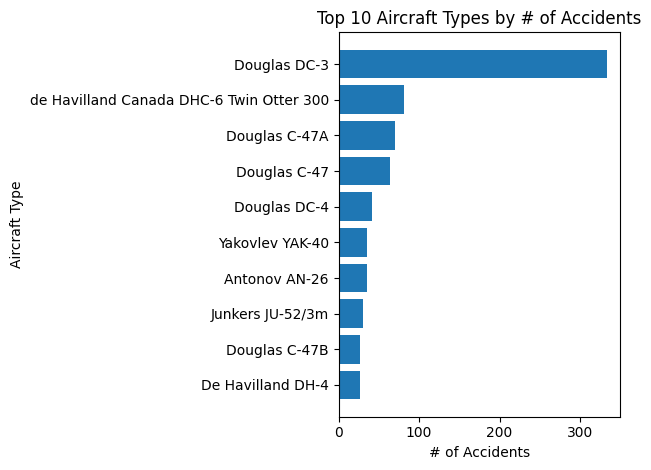

In [183]:
import matplotlib.pyplot as plt

# Create the counter
ac_type_counts = df_AA['ac_type'].value_counts().head(10)

# Sort the counts in descending order
ac_type_counts = ac_type_counts.sort_values(ascending=True)

# Create a vertical bar plot for the top 10 values
plt.barh(ac_type_counts.index, ac_type_counts.values)  # Use barh for horizontal bars

# Set labels and title
plt.xlabel('# of Accidents')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by # of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

We can see that the model that has more accidents is **Douglas DC-3** with more than 300 accidents. While the second in the top 10 have almost 100 accident. Also, we can see that most of the types in the top 10 are from Douglas. This is making an analysis from all time, but we need to filter by dates in order to check the top 10 in different periods of time.   

Let's make vertical histogram to check the type categories that are more frequent.

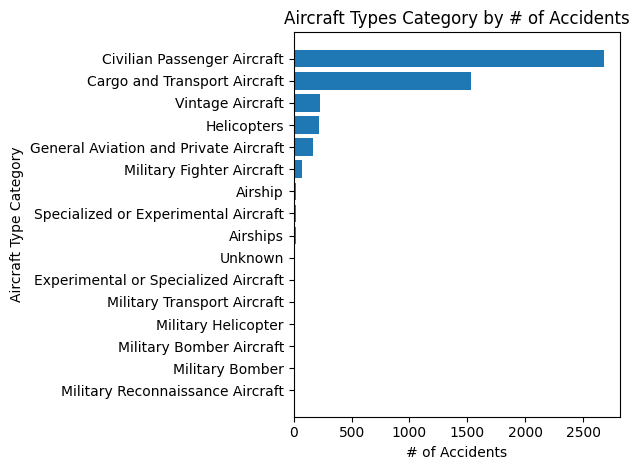

In [184]:
import matplotlib.pyplot as plt

# Create the counter
ac_type_counts = df_AA['ac_category'].value_counts()

# Sort the counts in descending order
ac_type_counts = ac_type_counts.sort_values(ascending=True)

# Create a vertical bar plot for the top 10 values
plt.barh(ac_type_counts.index, ac_type_counts.values)  # Use barh for horizontal bars

# Set labels and title
plt.xlabel('# of Accidents')
plt.ylabel('Aircraft Type Category')
plt.title('Aircraft Types Category by # of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

We can see that there are some categories that need to be fixed. Let's do that.

In [185]:
# Replacement
replacement_mapping = {
    'Military Bomber Aircraft': 'Military Fighter Aircraft',
    'Military Reconnaissance Aircraft': 'Military Fighter Aircraft',
    'Military Bomber': 'Military Fighter Aircraft',
    'Airship': 'Airships',
    'Specialized or Experimental Aircraft': 'Experimental or Specialized Aircraft',
    'Military Helicopter':'Helicopters',
    'Military Transport Aircraft': 'Cargo and Transport Aircraft'
}
df_AA['ac_category'] = df_AA['ac_category'].replace(replacement_mapping)

Let's make the histogram again:

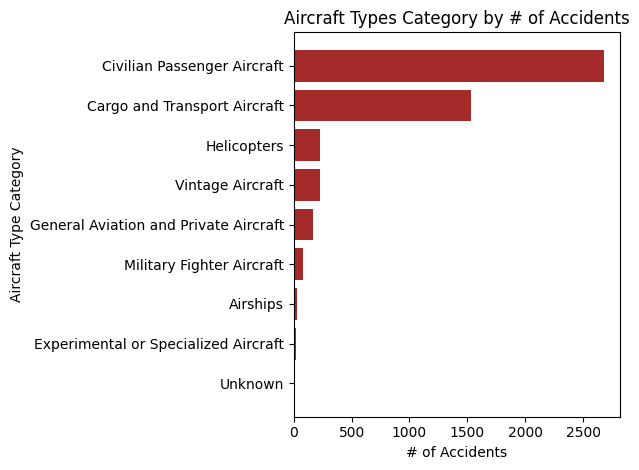

In [188]:
import matplotlib.pyplot as plt

# Create the counter
ac_type_counts = df_AA['ac_category'].value_counts()

# Sort the counts in descending order
ac_type_counts = ac_type_counts.sort_values(ascending=True)

# Create a vertical bar plot for the top 10 values
plt.barh(ac_type_counts.index, ac_type_counts.values, color='brown')  # Use barh for horizontal bars

# Set labels and title
plt.xlabel('# of Accidents')
plt.ylabel('Aircraft Type Category')
plt.title('Aircraft Types Category by # of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

We can see that most of the accidents occur in civilian aircrafts or in cargo or transport aircraft. However, in the Business Intelligence Tool, we may need to find the correclation between fatalities and number of accidents to know which aircraft has more severe impact. 

#### 2.7. Columns `operator`, `flight_no`, `route`, `registration`, `cn_ln`:

For now, we are not going to use these columns for further analysis since they have very detailed data that is not easy to generalize. However, we are going to convert the values "?" into None to have a more clean data.

In [189]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [190]:
df_AA[['operator','flight_no','route','registration','cn_ln']] = df_AA[['operator','flight_no','route','registration','cn_ln']].replace("?", None)
df_AA

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,None,Demonstration,Wright Flyer III,Wright Flyer III,Civilian Passenger Aircraft,None,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,None,None,Air show,Wright Byplane,Wright Byplane,Civilian Passenger Aircraft,SC1,None,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,None,Test flight,Dirigible,Dirigible,Airships,None,None,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,None,None,Curtiss seaplane,Curtiss seaplane,Airships,None,None,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
4,4,"September 09, 1913",18:30,Over the North Sea,Not Applicable,Military - German Navy,None,None,Zeppelin L-1 (airship),Zeppelin L-1 (airship),Airships,None,None,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,None,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,Eurocopter AS350B3 Ecureuil,Helicopters,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,None,None,Beechcraft B300 King Air 350i,Beechcraft B300 King Air,Civilian Passenger Aircraft,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",True,False,False,False,False
5005,5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Myanmar,Military - Myanmar Air Force,None,Naypyidaw - Anisakan,Beechcraft 1900D,Beechcraft 1900D,Civilian Passenger Aircraft,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,True,False,False,False,False
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Philippines,Military - Philippine Air Force,None,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,Lockheed C-130H,Cargo and Transport Aircraft,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ...",False,False,False,False,True


#### 2.8. Column `all_aboard`:

This column must be only numeric, so let's take a look at its values:

In [191]:
columns_to_convert = ['all_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground_fatalities']

# Loop through the columns and convert them to integers
for col in columns_to_convert:
    df_AA[col] = pd.to_numeric(df_AA[col], errors='coerce')

In [192]:
df_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                5008 non-null   int64  
 1   date                  5008 non-null   object 
 2   hour_declared_conv    3502 non-null   object 
 3   dep_arr_city          5008 non-null   object 
 4   country               5008 non-null   object 
 5   operator              4998 non-null   object 
 6   flight_no             1326 non-null   object 
 7   route                 4245 non-null   object 
 8   ac_type               5008 non-null   object 
 9   ac_type_cleaned       5008 non-null   object 
 10  ac_category           4988 non-null   object 
 11  registration          4736 non-null   object 
 12  cn_ln                 4341 non-null   object 
 13  all_aboard            4991 non-null   float64
 14  passengers_aboard     4787 non-null   float64
 15  crew_aboard          

In [193]:
# Check if there are any NaN values in the resulting Series
if df_AA['all_aboard'].isnull().any():
    print("The 'all_aboard' column contains non-numeric values.")
else:
    print("All values in the 'all_aboard' column are numeric.")

The 'all_aboard' column contains non-numeric values.


In [194]:
print(df_AA['all_aboard'].unique())

[  2.   1.   5.  20.  28.  41.  19.  22.  23.  21.  24.  16.  18.  nan
  14.   0.   8.   3.  49.  45.   6.   7.  17.   4.  11.  52.  43.  15.
  12.   9.  13.  54.  10.  76.  83.  50.  25.  97.  29.  36.  34.  37.
  35.  26.  39.  31.  27.  30.  59.  44.  38.  32.  42.  53.  48.  40.
  69.  33.  81.  58.  55.  46.  65.  51.  56.  63.  47.  70.  57. 115.
 129.  66.  67.  74.  64. 128.  80.  62. 101. 159.  68.  79.  61.  73.
  99.  60.  94.  72. 106.  78.  85. 122.  77.  88. 119.  95. 111. 107.
 132. 112.  84. 105.  86. 118.  87. 103. 127. 153.  91. 117. 133. 124.
  98.  82.  90. 130. 102. 155.  89. 120. 109. 100.  75. 229.  93. 126.
 164. 218. 121.  92. 104. 156. 108. 174. 176. 202. 113. 182. 145. 134.
 149. 177. 298. 346.  96. 157. 191. 330. 188. 131. 258. 154. 644. 165.
 213. 200. 137. 262. 189. 271. 178. 257. 135. 146. 166. 168. 301. 226.
 291. 110. 167. 180. 212. 285. 394. 172. 269. 192. 116. 179.  71. 274.
 148. 329. 163. 524. 256. 150. 384. 183. 143. 136. 290. 259. 144. 356.
 187. 

We can see that there are values as 'nan', let's check where is found and w can solve it summing the values of the column passengers_aboard	and crew_aboard.

In [195]:
mask = df_AA['all_aboard'].isna()
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
26,26,"July 21, 1919",16:55,"Chicago, Illinois",United States,Wingfoot Air Express Goodyear Tire,None,Shuttle,FD Type Dirigible,Dirigible FD Type,Airships,None,None,NaN,NaN,NaN,3.0,2.0,1.0,10.0,"The dirigible, cruising at 1,200 ft. caught fi...",False,False,False,False,True
103,103,"September 07, 1925",None,"Toul, France",France,CIDNA,None,None,Spad 33,Spad 33,Civilian Passenger Aircraft,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
347,347,"August 10, 1934",None,"Ningbo, China",China,China National Aviation Corporation,None,None,Sikorsky S-38B,Sikorsky S-38B,Vintage Aircraft,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
384,384,"August 13, 1935",None,"Hangow, China",China,China National Aviation Corporation,None,None,Sikorsky S-38B,Sikorsky S-38B,Vintage Aircraft,NV40V,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.,True,False,False,False,False
451,451,"December 26, 1936",None,"Nanking, China",China,China National Aviation Corporation,None,None,Douglas DC-2,Douglas DC-2,Civilian Passenger Aircraft,NC14269,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
652,652,"October 01, 1942",None,"Kunming, China",China,China National Aviation Corporation,None,None,Douglas C-47,Douglas C-47,Cargo and Transport Aircraft,69,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...,False,True,False,False,False
754,754,"November 09, 1944",None,"Seljord, Norway",Norway,Military - U.S. Army Air Corps,None,None,Unknown,Unknown,Unknown,42-52196,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
854,854,"March 18, 1946",None,"Between Chungking and Shanghai, China",China,China National Aviation Corporation,None,Chunking - Shanghai,Unknown,Unknown,Unknown,139,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.,False,False,False,False,True
1231,1231,"January 20, 1951",None,"Huilyo, Peru",Peru,Military - TAM,None,None,Douglas DC-3,Douglas DC-3,Civilian Passenger Aircraft,None,None,NaN,NaN,NaN,16.0,NaN,NaN,NaN,?,False,False,False,False,True
1362,1362,"December 22, 1952",None,"Damascus, Syria",Syria,Syrian Air,None,None,Douglas DC-3,Douglas DC-3,Civilian Passenger Aircraft,None,None,NaN,NaN,NaN,9.0,NaN,NaN,NaN,?,False,False,False,False,True


Ww can see that there are 17 records, were we can't canculate the total_aboard because there is no information for passengers_aboard and crew_aboard.

#### 2.8.1 Histogram `all_aboard`:

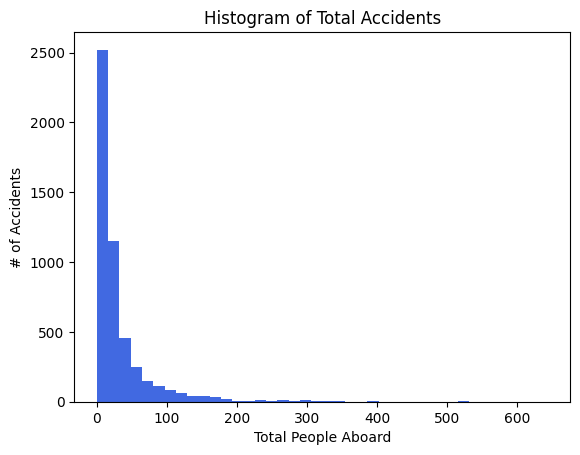

In [196]:
import matplotlib.pyplot as plt

plt.hist(df_AA['all_aboard'], bins=40, color='royalblue')
plt.xlabel('Total People Aboard')
plt.ylabel('# of Accidents')
plt.title('Histogram of Total Accidents')
plt.show()

We can see less accidents with less people aboard. This can tell us than most of the accidents were in aircrafts with reduced occupants capacity, like small aiplanes, business jets, military jets, experimental aircrafts, helicopters, gliders and amphibious aircrafts. Let's check that out:

In [197]:
mask = df_AA['all_aboard'] < 20
filtered_df = df_AA[mask]
filtered_df

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
0,0,"September 17, 1908",17:18,"Fort Myer, Virginia",United States,Military - U.S. Army,None,Demonstration,Wright Flyer III,Wright Flyer III,Civilian Passenger Aircraft,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",False,True,False,False,False
1,1,"September 07, 1909",None,"Juvisy-sur-Orge, France",France,None,None,Air show,Wright Byplane,Wright Byplane,Civilian Passenger Aircraft,SC1,None,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,False,True,False,False,False
2,2,"July 12, 1912",06:30,"Atlantic City, New Jersey",United States,Military - U.S. Navy,None,Test flight,Dirigible,Dirigible,Airships,None,None,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,False,False,False,False,True
3,3,"August 06, 1913",None,"Victoria, British Columbia, Canada",Canada,Private,None,None,Curtiss seaplane,Curtiss seaplane,Airships,None,None,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,True,False,False,False,False
7,7,"September 03, 1915",15:20,"Off Cuxhaven, Germany",Germany,Military - German Navy,None,None,Zeppelin L-10 (airship),Zeppelin L-10 (airship),Airships,None,None,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when...",True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,4999,"August 22, 2020",08:40,"Juba, South Sudan",South Sudan,South West Aviaiton,None,Juba - Wau,Antonov 26B,Antonov 26B,Cargo and Transport Aircraft,EX-126,11508,8.0,5.0,3.0,7.0,4.0,3.0,0.0,The cargo plane lost height shortly after depa...,False,False,False,False,True
5002,5002,"March 02, 2021",17:05,"Pieri, Sudan",Sudan,South Sudan Supreme Airlines,None,Pieri - Yuai,Let L-410UVP-E,Let L-410UVP-E,Cargo and Transport Aircraft,HK-4274,902525,10.0,8.0,2.0,10.0,8.0,2.0,0.0,One of the engines on the aircraft failed 10 m...,False,True,False,False,False
5003,5003,"March 28, 2021",18:35,"Near Butte, Alaska",United States,Soloy Helicopters,None,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,Eurocopter AS350B3 Ecureuil,Helicopters,N351SH,4598,6.0,5.0,1.0,5.0,4.0,1.0,0.0,The sightseeing helicopter crashed after missi...,True,False,False,False,False
5004,5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Nigeria,Military - Nigerian Air Force,None,None,Beechcraft B300 King Air 350i,Beechcraft B300 King Air,Civilian Passenger Aircraft,NAF203,FL-891,11.0,7.0,4.0,11.0,7.0,4.0,0.0,"While on final approach, in poor weather condi...",True,False,False,False,False


We can seethat aircrafts with less than 20 people represents 2822 accidents of the datasets that has 5008 records. Which represents the 56% of the dataset. Let's check the top 10 aircraft types involved. 

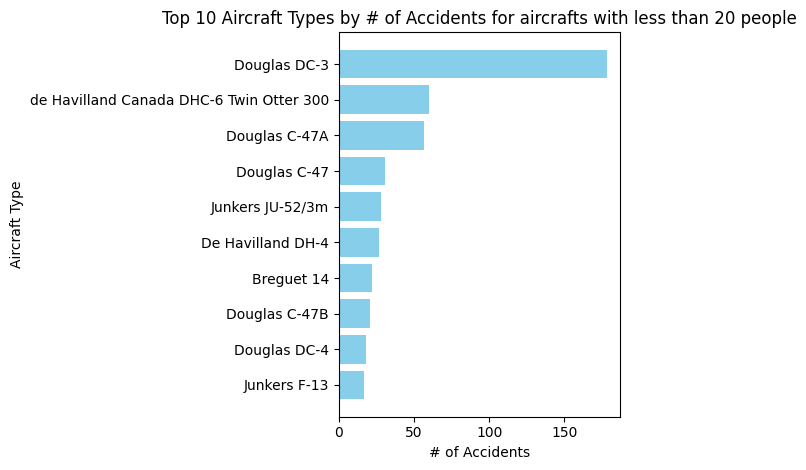

In [200]:
# Create the counter
ac_type_counts = filtered_df['ac_type'].value_counts().head(10)

# Sort the counts in descending order
ac_type_counts = ac_type_counts.sort_values(ascending=True)

# Create a vertical bar plot for the top 10 values with the color set to "skyblue"
plt.barh(ac_type_counts.index, ac_type_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('# of Accidents')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by # of Accidents for aircrafts with less than 20 people')

# Show the plot
plt.tight_layout()
plt.show()

We can see almost the same behaviour as the all time analysis. Also, we can see that all these aircrafts are very small for less than 21 to 30 passengers. Let's check by category:

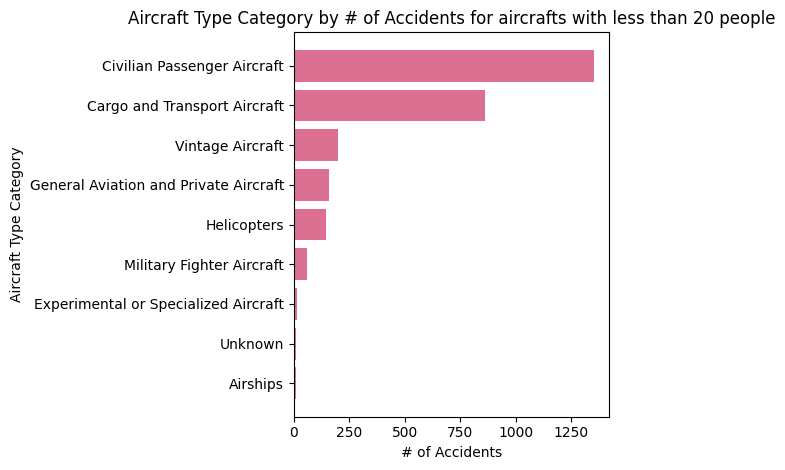

In [199]:
# Create the counter
ac_type_counts = filtered_df['ac_category'].value_counts()

# Sort the counts in descending order
ac_type_counts = ac_type_counts.sort_values(ascending=True)

# Create a vertical bar plot for the top 10 values with the color set to "skyblue"
plt.barh(ac_type_counts.index, ac_type_counts.values, color='palevioletred')

# Set labels and title
plt.xlabel('# of Accidents')
plt.ylabel('Aircraft Type Category')
plt.title('Aircraft Type Category by # of Accidents for aircrafts with less than 20 people')

# Show the plot
plt.tight_layout()
plt.show()

We can see that it follows the same pattern at the top three category for the whole dataset. We will explore more about this in the Business Intelligence Tool.

#### 2.8.2 Box plot `all_aboard`:

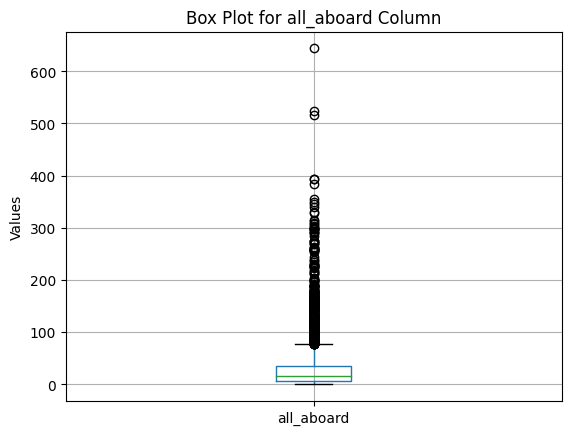

In [201]:
df_AA.boxplot(column='all_aboard')
plt.title('Box Plot for all_aboard Column')
plt.ylabel('Values')
plt.show()

We can see that there are some data with values higher than 500 people aboard. Let's check those registers.

In [202]:
mask = df_AA['all_aboard'] > 500
filtered_df = df_AA[mask]
filtered_df

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2902,2902,"March 27, 1977",17:07,"Tenerife, Canary Islands",Spain,Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,Boeing B-747-121 / Boeing B-747-206B,Civilian Passenger Aircraft,N736PA/PH-BUF,19643/11 / 20400/157,644.0,614.0,30.0,583.0,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...,True,False,False,True,False
3341,3341,"August 12, 1985",18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan,Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,Boeing 747-SR46,Civilian Passenger Aircraft,JA8119,20783/230,524.0,509.0,15.0,520.0,505.0,15.0,0.0,The aircraft suffered an aft pressure bulkhead...,False,True,True,False,False
4219,4219,"July 23, 1999",11:25,"Tokyo, Japan",Japan,All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,Boeing 747,Civilian Passenger Aircraft,JA8966,27442/1066,517.0,503.0,14.0,1.0,0.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,False,False,False,True,False


We can see that those values are real and possible since those types of Boing have this capacity. There are not outliers in this column.

#### 2.9. Column `passengers_aboard` and `crew_aboard`:

#### 2.9.1 Histograms for `passengers_aboard` and `crew_aboard`:

Let's see their distribution on an histogram:

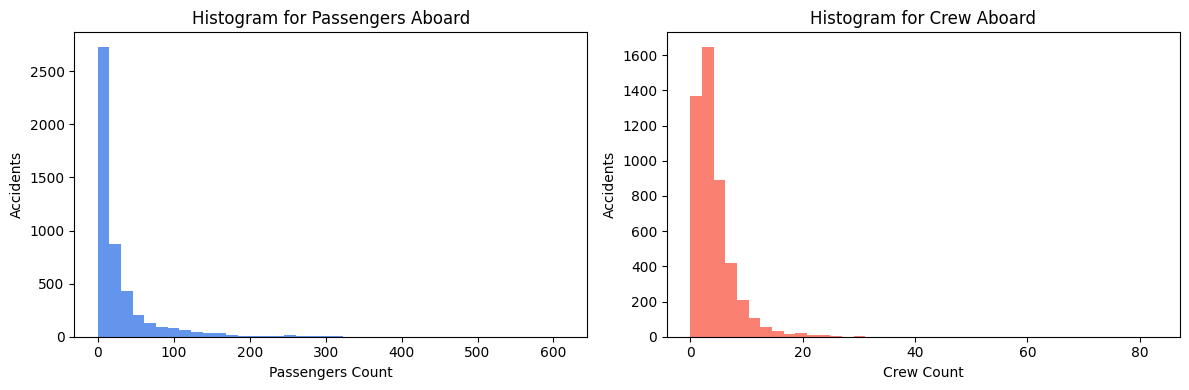

In [203]:
# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histogram for 'passengers_aboard'
axes[0].hist(df_AA['passengers_aboard'], bins=40, color='cornflowerblue')
axes[0].set_title('Histogram for Passengers Aboard')
axes[0].set_xlabel('Passengers Count')
axes[0].set_ylabel('Accidents')

# Plot the histogram for 'crew_aboard'
axes[1].hist(df_AA['crew_aboard'], bins=40, color='salmon')
axes[1].set_title('Histogram for Crew Aboard')
axes[1].set_xlabel('Crew Count')
axes[1].set_ylabel('Accidents')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

Here we can see a behaviour that tells us that there is a peak of accidents when the crew has between 2 to 4 people. This confirms that tha majoritiy of the accidents occurred with small airplanes that require few people in the crew team. However, we can see more accidents in this type of aircrafts than the ones flown by one single pilot. 

#### 2.9.2 Box plots for `passengers_aboard` and `crew_aboard`:

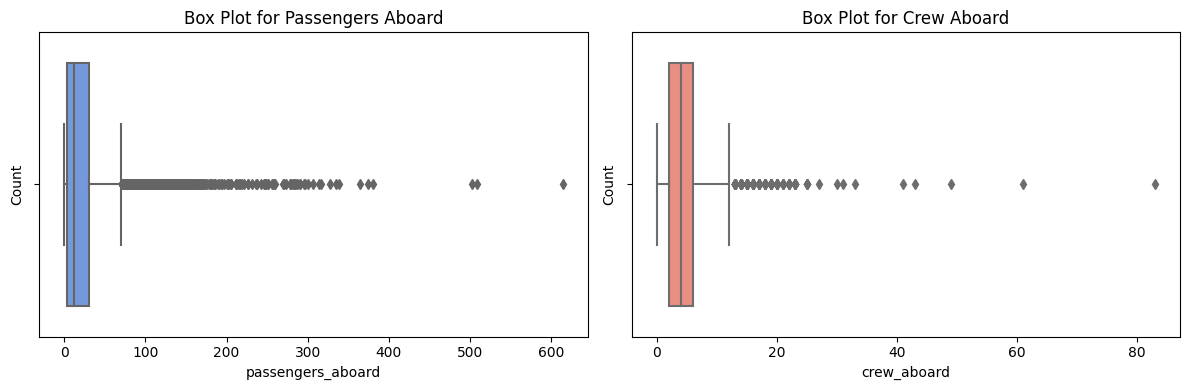

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the box plot for 'passengers_aboard'
sns.boxplot(data=df_AA, x='passengers_aboard', ax=axes[0], color='cornflowerblue')
axes[0].set_title('Box Plot for Passengers Aboard')
axes[0].set_ylabel('Count')

# Plot the box plot for 'crew_aboard'
sns.boxplot(data=df_AA, x='crew_aboard', ax=axes[1], color='salmon')
axes[1].set_title('Box Plot for Crew Aboard')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

We can see in the passengers the same behaviour as the total_aboard column but we can see records where the crew are more than 30 people. Let's check those values.

In [205]:
mask = df_AA['crew_aboard'] > 30
filtered_df = df_AA[mask]
filtered_df

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
6,6,"March 05, 1915",01:00,"Tienen, Belgium",Belgium,Military - German Navy,None,None,Zeppelin L-8 (airship),Zeppelin L-8 (airship),Airships,None,None,41.0,0.0,41.0,17.0,0.0,17.0,0.0,Crashed into trees while attempting to land af...,False,False,False,True,False
60,60,"August 24, 1921",17:40,"River Humber, England",England,Military - Royal Airship Works,None,None,Royal Airship Works ZR-2 (airship),Royal Airship Works ZR-2 (airship),Airships,R-38,R-38,49.0,0.0,49.0,43.0,0.0,43.0,1.0,Crashed due to structural failure followed by ...,False,True,True,False,False
102,102,"September 03, 1925",05:30,"Caldwell, Ohio",United States,Military - U.S. Navy,None,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),Dirigible ZR-1 Shenandoah (airship),Airships,ZR-1,None,43.0,0.0,43.0,14.0,0.0,14.0,0.0,The Shenandoah was flying over Southern Ohio w...,True,True,True,False,False
364,364,"February 12, 1935",None,"Off Point Sur, Californiia",United States,Military - US Navy,None,None,Goodyear-Zeppelin U.S.S. Macon (airship),Goodyear U.S.S. Macon (airship),Airships,ZRS-4,None,83.0,0.0,83.0,2.0,0.0,2.0,0.0,The airship suffered structural failure in a s...,True,True,False,False,False
462,462,"May 06, 1937",19:25,"Lakehurst, New Jersey",United States,Deutsche Zeppelin Reederei,LZ 129,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,Zeppelin LZ-129,Airships,D-LZ-129,D-LZ129,97.0,36.0,61.0,35.0,13.0,22.0,1.0,The airship Hindenburg caught fire and burned ...,False,True,False,False,False
2471,2471,"March 16, 1970",11:30,"Near Da Nang, South Vietnam",Vietnam,Military - U.S. Navy,None,Taiwan - Da Nang,Lockheed EC-121P,Lockheed EC-121P,Cargo and Transport Aircraft,145927,5508,31.0,0.0,31.0,23.0,0.0,23.0,0.0,The pilot tried to stretch the approach to avo...,False,False,True,False,False
4057,4057,"November 12, 1996",18:40,"Near Charkhi Dadri, India",India,Saudi Arabian Airlines / Kazakhstan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,Boeing 747-168B,Civilian Passenger Aircraft,HZ-AIH/UN-76435,22748/555/1023413428,349.0,316.0,33.0,349.0,316.0,33.0,0.0,Midair collision 17 km W of New Delhi. The Sa...,False,False,True,False,False


We can see that most of them are military an not commercial and it is normal to have all crew members on flight, without any passengers. There are not outliers for both of these columns.

#### 2.10. Column `total_fatalities`:

Let's check all the unique values from this column.

In [206]:
print(df_AA['total_fatalities'].unique())

[  1.   5.  14.  28.  17.  19.  20.  22.  27.  23.  21.  24.  18.   3.
   0.   2.   4.  43.  34.   7.   6.  52.   8.  nan   9.  16.  10.  48.
  15.  73.  12.  11.  50.  13.  35.  25.  29.  26.  36.  40.  31.  30.
  59.  45.  44.  39.  32.  53.  41.  37.  33.  55.  38.  80.  46.  58.
  56.  70.  87. 129.  42.  47.  66.  67.  74. 128.  62.  79.  61.  49.
  65.  99.  64.  51.  60.  68.  54.  63.  72.  78.  83.  77.  76.  95.
 111. 107. 130. 112.  81.  84.  94.  86.  97. 101. 118.  85.  57. 121.
 117. 133. 124.  98.  82. 126.  88. 102. 123. 155. 100. 120.  90.  92.
 109.  75.  93. 163.  69.  91. 104. 115. 122. 156. 108. 174. 103. 176.
  89. 106. 346. 191. 113. 188. 154. 583. 131. 213. 137. 183. 271. 178.
 257. 146. 166. 301. 110. 180. 132. 145. 119. 269. 181. 148. 329. 200.
 134. 520. 256. 167. 159. 143. 290. 259. 144. 171. 127. 223. 261. 158.
 141. 157. 116. 264. 160. 189. 230. 349. 228. 234. 196. 229. 217. 169.
 114. 260. 225.  71. 275. 140. 125. 170.  96. 187. 152. 168. 153. 239.
 298. 

We can see that there is also nan values. Let's check those values out.

In [207]:
mask = df_AA['total_fatalities'].isna()
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
103,103,"September 07, 1925",None,"Toul, France",France,CIDNA,None,None,Spad 33,Spad 33,Civilian Passenger Aircraft,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
347,347,"August 10, 1934",None,"Ningbo, China",China,China National Aviation Corporation,None,None,Sikorsky S-38B,Sikorsky S-38B,Vintage Aircraft,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
384,384,"August 13, 1935",None,"Hangow, China",China,China National Aviation Corporation,None,None,Sikorsky S-38B,Sikorsky S-38B,Vintage Aircraft,NV40V,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.,True,False,False,False,False
451,451,"December 26, 1936",None,"Nanking, China",China,China National Aviation Corporation,None,None,Douglas DC-2,Douglas DC-2,Civilian Passenger Aircraft,NC14269,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
652,652,"October 01, 1942",None,"Kunming, China",China,China National Aviation Corporation,None,None,Douglas C-47,Douglas C-47,Cargo and Transport Aircraft,69,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...,False,True,False,False,False
754,754,"November 09, 1944",None,"Seljord, Norway",Norway,Military - U.S. Army Air Corps,None,None,Unknown,Unknown,Unknown,42-52196,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,False,False,False,False,True
854,854,"March 18, 1946",None,"Between Chungking and Shanghai, China",China,China National Aviation Corporation,None,Chunking - Shanghai,Unknown,Unknown,Unknown,139,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.,False,False,False,False,True
1451,1451,"March 13, 1954",None,"Dien Bien Phu, South Vietnam",Vietnam,Aigle Azur,None,None,C-46,C-46,Cargo and Transport Aircraft,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shot down.,False,False,False,True,False


All of these observations fall within the scope of what we have previously observed for the variable 'all_aboard.' Nevertheless, even in the absence of census data or a comprehensive accident summary, there is valuable information embedded in the other variables that we must not disregard. Thus, we should continue our analysis while considering these NaN values.

#### 2.10.1 Histogram `total_fatalities`:

Let's check all the unique values from this column.

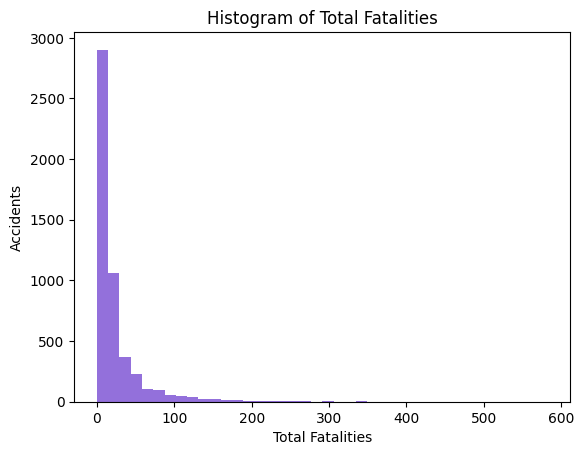

In [208]:
import matplotlib.pyplot as plt

plt.hist(df_AA['total_fatalities'], bins=40, color='mediumpurple')
plt.xlabel('Total Fatalities')
plt.ylabel('Accidents')
plt.title('Histogram of Total Fatalities')
plt.show()

We can see that fortunately most of the accidents involve less than 20 fatalities. This observation underscores the notion that most accidents involve small aircraft, which may not adhere to the same rigorous safety standards as larger airplanes. Nevertheless, it's crucial to emphasize that every life is valuable, and our collective efforts must be dedicated to the goal of achieving zero aerial accidents in the future.

#### 2.10.2 Box plot `total_fatalities`:

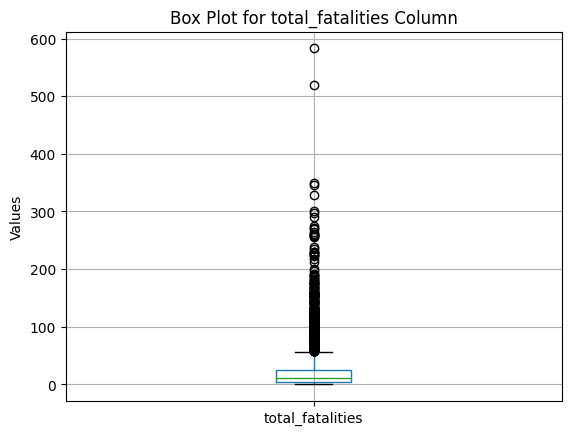

In [209]:
df_AA.boxplot(column='total_fatalities')
plt.title('Box Plot for total_fatalities Column')
plt.ylabel('Values')
plt.show()

We can see the same high values that we reviewed for the column total_aboard. There are not outliers for this column.

#### 2.11. Column `passenger_fatalities` and `crew_fatalities`:

#### 2.11.1 Histograms for `passenger_fatalities` and `crew_fatalities`:

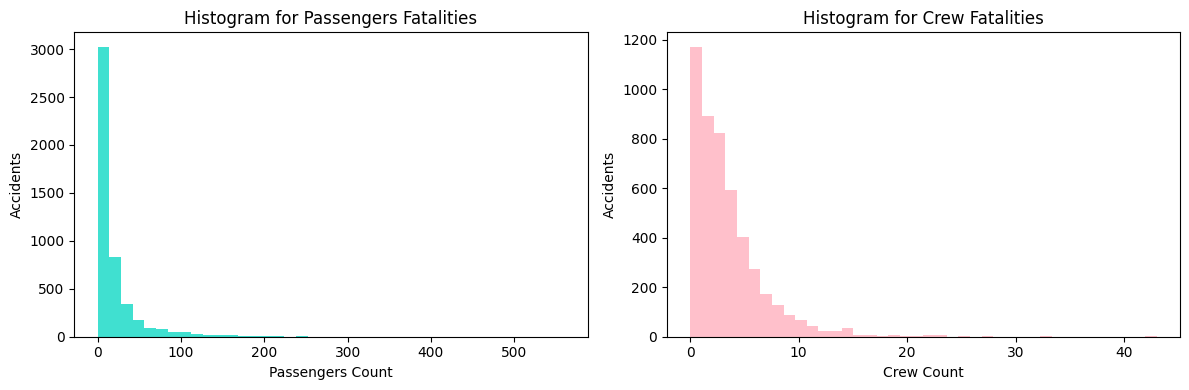

In [210]:
# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histogram for 'passengers_aboard'
axes[0].hist(df_AA['passenger_fatalities'], bins=40, color='turquoise')
axes[0].set_title('Histogram for Passengers Fatalities')
axes[0].set_xlabel('Passengers Count')
axes[0].set_ylabel('Accidents')

# Plot the histogram for 'crew_aboard'
axes[1].hist(df_AA['crew_fatalities'], bins=40, color='pink')
axes[1].set_title('Histogram for Crew Fatalities')
axes[1].set_xlabel('Crew Count')
axes[1].set_ylabel('Accidents')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In these histograms we can observe that most of the accidents occur when there ae few passengers. Most of them happpens with more crew-passengers proportion: small aircrafts. 

#### 2.11.2 Boxplots for `passenger_fatalities` and `crew_fatalities`:

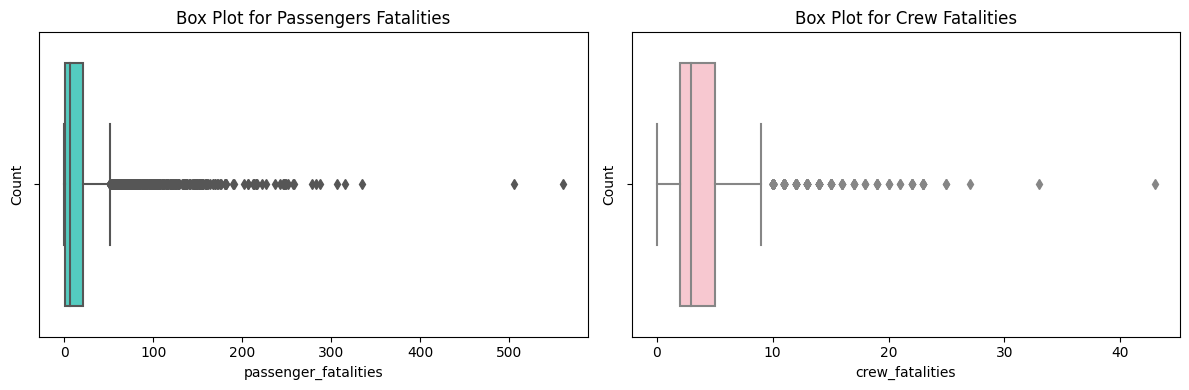

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the box plot for 'passengers_aboard'
sns.boxplot(data=df_AA, x='passenger_fatalities', ax=axes[0], color='turquoise')
axes[0].set_title('Box Plot for Passengers Fatalities')
axes[0].set_ylabel('Count')

# Plot the box plot for 'crew_aboard'
sns.boxplot(data=df_AA, x='crew_fatalities', ax=axes[1], color='pink')
axes[1].set_title('Box Plot for Crew Fatalities')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

We can see the same behavior as the 'aboard' variables. There are no outliers here.

#### 2.12. Column `ground_fatalities`:

Let's check all the unique values from this column.

In [212]:
numbers = df_AA['ground_fatalities'].unique()
# Convert to integers and format as strings
formatted_numbers = [f'{int(x):,}' if not np.isnan(x) else 'NaN' for x in numbers]

# Join the formatted numbers into a string
formatted_string = ' '.join(formatted_numbers)

print(formatted_string)

0 10 1 5 NaN 11 15 2 53 22 20 63 37 19 58 36 16 3 14 4 7 29 8 6 13 17 31 87 23 33 125 71 24 25 113 12 32 40 9 49 35 44 18 45 50 39 225 30 2,750 78 85 47


We can see that there is a value of 2750, other with 225 and other with 125. Let's check those out:

In [213]:
mask = df_AA['ground_fatalities'] >= 125
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2259,2259,"December 24, 1966",19:15,"Binh Tahi, Da Nang, Vietnam",Vietnam,Flying Tiger Line,None,None,Canadair CL-44D4-1,Canadair CL-44D4-1,Cargo and Transport Aircraft,N228SW,31,4.0,0.0,4.0,4.0,0.0,4.0,125.0,The cargo plane undershot runway by 1 mile whi...,True,False,False,True,False
4004,4004,"January 08, 1996",12:43,"Kinshasa, Zaire",Democratic Republic Congo,African Air,None,Kinshasa - Kahemba,Antonov AN-32B,Antonov AN-32B,Cargo and Transport Aircraft,RA-26222,2301,6.0,0.0,6.0,2.0,0.0,2.0,225.0,The aircraft failed to gain altitude after tak...,False,False,True,False,False
4345,4345,"September 11, 2001",09:45,"Arlington, Virginia.",United States,American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,Boeing 757-223,Civilian Passenger Aircraft,N644AA,24602/365,64.0,58.0,6.0,64.0,58.0,6.0,125.0,The aircraft was hijacked after taking off fro...,False,False,False,True,False
4346,4346,"September 11, 2001",08:47,"New York City, New York",United States,American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,Boeing 767-223ER,Civilian Passenger Aircraft,N334AA,22332/169,92.0,81.0,11.0,92.0,81.0,11.0,2750.0,The aircraft was hijacked shortly after it lef...,False,True,False,True,False
4347,4347,"September 11, 2001",09:03,"New York City, New York",United States,United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,Boeing 767-222,Civilian Passenger Aircraft,N612UA,21873/41,65.0,56.0,9.0,65.0,56.0,9.0,2750.0,The aircraft was hijacked shortly after it lef...,False,True,False,True,False


We can see the accidents with ground fatalities of 2750 are the 11-S terrorist attack on the twin towers in New York. Also, it appears the attack to the pentagon in Washington D.C. Those are abnormal values but have a meaning that we need to consider in our anakysis.

#### 2.12.1 Histogram for `ground_fatalities`:

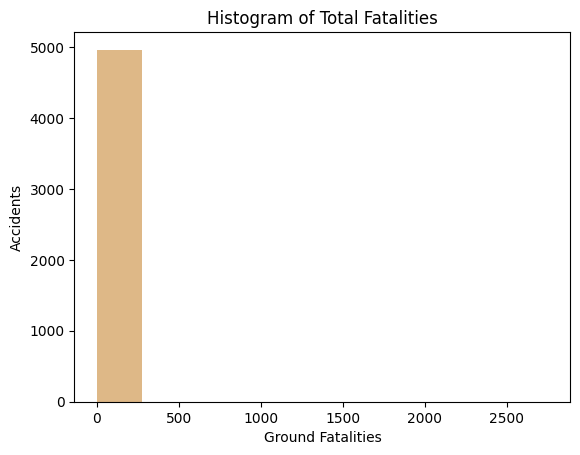

In [214]:
import matplotlib.pyplot as plt

plt.hist(df_AA['ground_fatalities'], bins=10, color='burlywood')
plt.xlabel('Ground Fatalities')
plt.ylabel('Accidents')
plt.title('Histogram of Total Fatalities')
plt.show()

In this histogram we can see that in almost all the accidents, ground fatalitites are less than 200 fatalities. However, we can see that the ground fatalities label goes to 3000, which represents the abnormal value of 2750. 

#### 2.12.2 Boxplot for `ground_fatalities`:

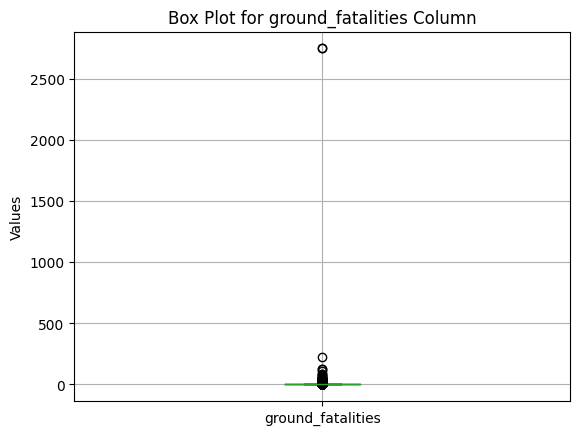

In [215]:
df_AA.boxplot(column='ground_fatalities')
plt.title('Box Plot for ground_fatalities Column')
plt.ylabel('Values')
plt.show()

As expected we have the abnormal values at 2750.

### 3. Relationships between variables:

Until here, we have analyzed each variable as one. However, we can invesigate about the relationship between variables and what valuable insights we may obtain from that.

#### 3.1. Pair plot for `passenger_fatalities`, `passengers_aboard`, `crew_fatalities`, `passenger_aboard`:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


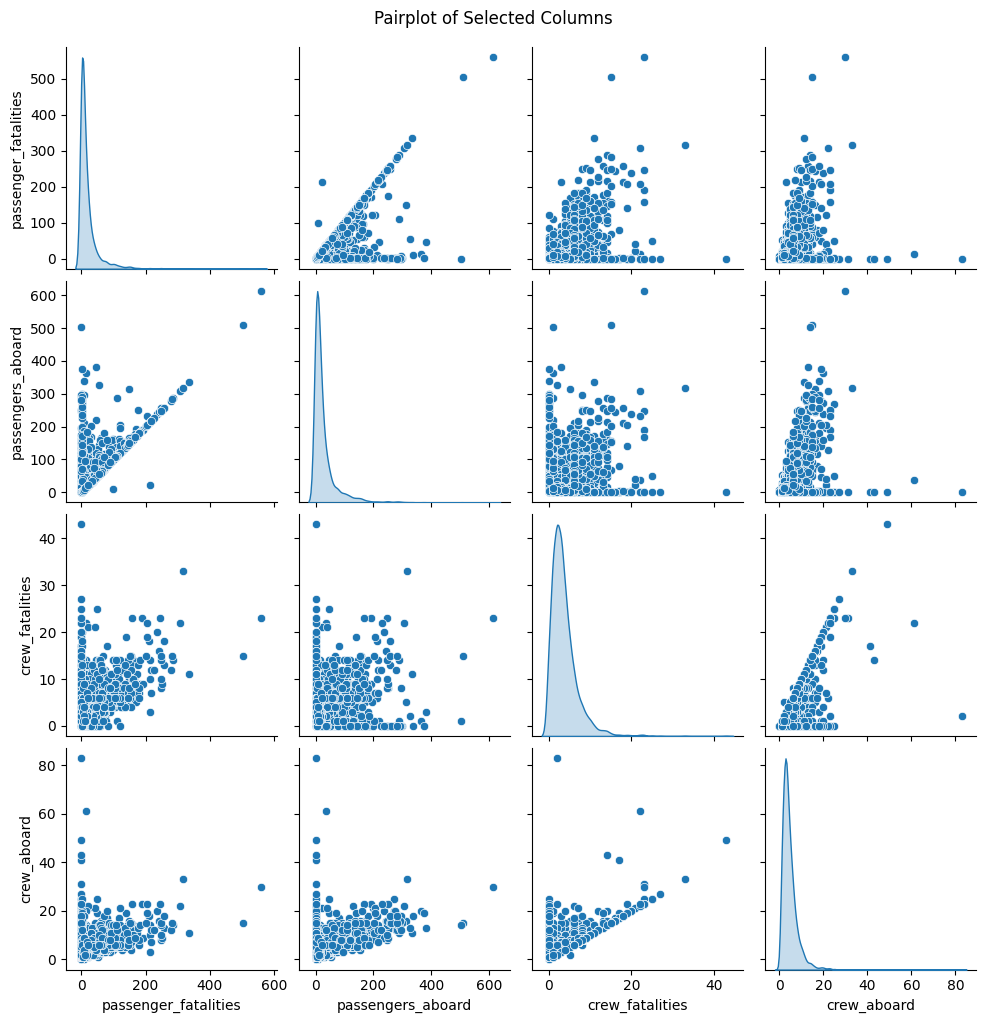

In [216]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns you want for the pairplot
columns = ['passenger_fatalities', 'passengers_aboard', 'crew_fatalities', 'crew_aboard']

# Create a pairplot
sns.pairplot(df_AA[columns], diag_kind='kde')  # diag_kind='kde' for kernel density estimation on diagonals
plt.suptitle('Pairplot of Selected Columns', y=1.02)  # Set the title position
plt.show()

Through this pairplot we can find the folowing:

1. There are two accidents where the passengers fatalities are higher than the passengers aboard, which is imposible. It can't be more fatalities than people in the aircraft. 
2. Also, there are two cases where the crew fatalities are higher than the crew aboard, which is imposible.
3. We can see that an imaginary line is formed in the scatter plot of passengers_aboard vs. crew_aboard, indicating a minimum rate of #passengers/#crew. This indicates, as expected, that per number of passengers, there must be a minimum number of crew members to support those passengers. 
4. In the other plots, there isn't a relationship between those pair of variables.

In [217]:
mask = df_AA['passenger_fatalities'] > df_AA['passengers_aboard'] 
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2781,2781,"December 29, 1974",None,"Tikal, Guatemala",Guatemala,Edwin Ortiz,None,Tikal - Guatemala City,Lockheed 18 LodeStar,Lockheed 18 Lodestar,Vintage Aircraft,TG-HTM,582,24.0,21.0,3.0,24.0,213.0,3.0,0.0,"Few minutes after takeoff from Tikal Airport, ...",False,True,False,False,False
3227,3227,"April 30, 1983",12:09,"Jacksonville, Florida",United States,Military - United States Navy,None,"Jacksonville NAS - Guantanamo Bay, Cuba",Convair CV-340,Convair CV-340,Civilian Passenger Aircraft,141010,293,15.0,9.0,6.0,15.0,98.0,6.0,0.0,Crashed into St. John's River just shy of the ...,False,True,False,False,False
3230,3230,"May 06, 1983",None,"Klyuchi, Russia",Russia,Military - Soviet Air Force,None,Petropavlovsk-Kamchatsky - Klyuchi,Antonov An-26,Antonov AN-26,Cargo and Transport Aircraft,None,None,37.0,31.0,6.0,33.0,37.0,6.0,0.0,The flight tried to land at Klyuchi Air Base i...,True,False,False,False,False


We can see that there are three accidents with a calculation mistake in the passenger_fatalities column. In the first two cases, it should be 'total_fatalities' - 'crew_fatalities'. In the third one, we will suppose that the person who was writing wrote 37 on passenger_fatalities when it should be on total_fatalities. The summary of that accident doesn't show if there were survivors.

In [218]:
df_AA.iloc[2781,17] = df_AA.iloc[2781,16] - df_AA.iloc[2781,18]
df_AA.iloc[3227,17] = df_AA.iloc[3227,16] - df_AA.iloc[3227,18]
df_AA.iloc[3230,16] = 37
df_AA.iloc[3230,17] = df_AA.iloc[3230,16] - df_AA.iloc[3230,18]
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
2781,2781,"December 29, 1974",None,"Tikal, Guatemala",Guatemala,Edwin Ortiz,None,Tikal - Guatemala City,Lockheed 18 LodeStar,Lockheed 18 Lodestar,Vintage Aircraft,TG-HTM,582,24.0,21.0,3.0,24.0,21.0,3.0,0.0,"Few minutes after takeoff from Tikal Airport, ...",False,True,False,False,False
3227,3227,"April 30, 1983",12:09,"Jacksonville, Florida",United States,Military - United States Navy,None,"Jacksonville NAS - Guantanamo Bay, Cuba",Convair CV-340,Convair CV-340,Civilian Passenger Aircraft,141010,293,15.0,9.0,6.0,15.0,9.0,6.0,0.0,Crashed into St. John's River just shy of the ...,False,True,False,False,False
3230,3230,"May 06, 1983",None,"Klyuchi, Russia",Russia,Military - Soviet Air Force,None,Petropavlovsk-Kamchatsky - Klyuchi,Antonov An-26,Antonov AN-26,Cargo and Transport Aircraft,None,None,37.0,31.0,6.0,37.0,31.0,6.0,0.0,The flight tried to land at Klyuchi Air Base i...,True,False,False,False,False


In [219]:
mask = df_AA['crew_fatalities'] > df_AA['crew_aboard'] 
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
1672,1672,"December 31, 1957",12:57,"Buenos Aires, Argentina",Argentina,Aerolineas Argentinas,None,Buenos Aires - Rosario - Corrientes,Short Sunderland,Short Sunderland,Vintage Aircraft,LV-AAR,3,50.0,44.0,6.0,9.0,1.0,8.0,0.0,The flying boat sank in Buenos Aires harbor wh...,False,True,False,False,False
4914,4914,"September 05, 2015",19:08,"Off Dakar, Near Dioubel, Senegal",Senegal,Senegalair,71,Ouagadougou - Dakar,Hawker Siddeley HS-125,Hawker Siddeley HS-125,Civilian Passenger Aircraft,6V-AIM,257062,7.0,5.0,2.0,7.0,2.0,5.0,0.0,The air ambulance went missing while on a medi...,False,True,False,False,False


In the first case, crew fatalities should be the same of the crew aboard. In the second case, i need to intercalate the values between passenger_fatalities	and crew_fatalities.

In [220]:
df_AA.iloc[1672,18] = df_AA.iloc[1672,15]
df_AA.iloc[4914,18] = df_AA.iloc[4914,15]
df_AA.iloc[4914,17] = df_AA.iloc[4914,14]
df_AA[mask]

,acc_id,date,hour_declared_conv,dep_arr_city,country,operator,flight_no,route,ac_type,ac_type_cleaned,ac_category,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground_fatalities,summary,cause_category1,cause_category2,cause_category3,cause_category4,cause_category5
1672,1672,"December 31, 1957",12:57,"Buenos Aires, Argentina",Argentina,Aerolineas Argentinas,None,Buenos Aires - Rosario - Corrientes,Short Sunderland,Short Sunderland,Vintage Aircraft,LV-AAR,3,50.0,44.0,6.0,9.0,1.0,6.0,0.0,The flying boat sank in Buenos Aires harbor wh...,False,True,False,False,False
4914,4914,"September 05, 2015",19:08,"Off Dakar, Near Dioubel, Senegal",Senegal,Senegalair,71,Ouagadougou - Dakar,Hawker Siddeley HS-125,Hawker Siddeley HS-125,Civilian Passenger Aircraft,6V-AIM,257062,7.0,5.0,2.0,7.0,5.0,2.0,0.0,The air ambulance went missing while on a medi...,False,True,False,False,False


#### 3.2. Scatter plot `total_fatalities` vs. `cause_category`:

It may be interesting to search if there are more fatalities for one category than the other. We need to consider that we haeve more accidents for one category than the other, so we expect the same behavior.

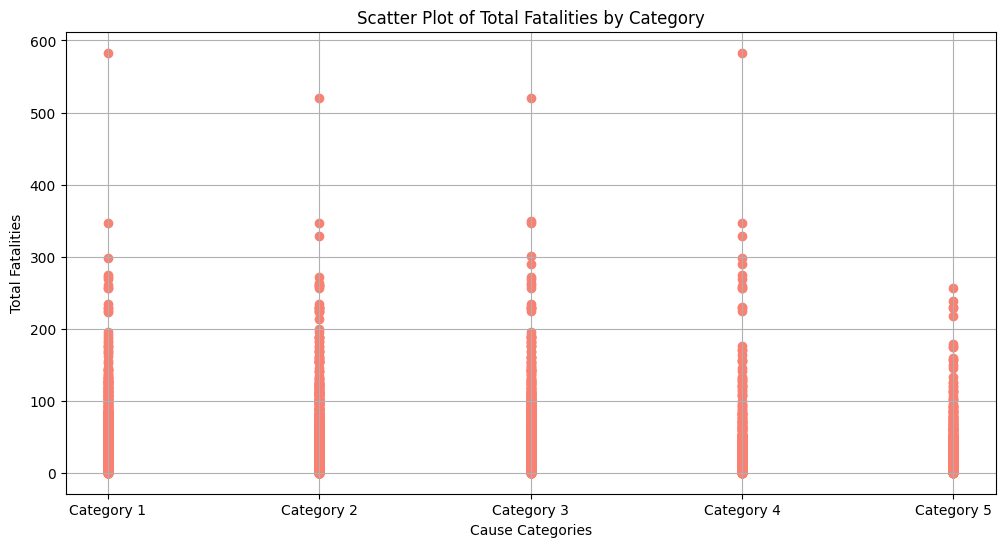

In [221]:
import matplotlib.pyplot as plt

# Create an empty list to store data points
scatter_data = []

# Iterate through each row of the DataFrame
for index, row in df_AA.iterrows():
    for i in range(1, 6):
        category_column = f'cause_category{i}'
        if row[category_column] == 1:
            # Add a data point with the category and total fatalities
            scatter_data.append((i, row['total_fatalities']))  # Use the category index as X

# Separate the data into X and Y values
categories, total_fatalities = zip(*scatter_data)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(categories, total_fatalities, color='salmon', marker='o')
plt.xlabel('Cause Categories')
plt.ylabel('Total Fatalities')
plt.title('Scatter Plot of Total Fatalities by Category')
plt.xticks(range(1, 6), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.grid(True)
plt.show()

We observe that each category contains an outlier represented by accidents that exhibit all categories as contributing causes. However, it's important to note that there are not four separate accidents; rather, there are two distinct incidents.

The first major accident, resulting in nearly 580 fatalities, is attributed to weather conditions (Category 1) and combat loss (Category 4) as the primary causes. In contrast, the second incident, involving nearly 520 fatalities, is primarily attributed to mechanical, electrical, or instrumental failure (Category 2) and human error (Category 3) as the main contributing factors.

Now that we have finished our EDA and ETL process, we can proceed with a deeper analysis in a Businesss Intelligence Tool. Let's save our cleaned and organized dataframe into a CSV file.

In [222]:
df_AA.to_csv('df_AA_final.csv')